<a href="https://colab.research.google.com/github/Loggo-MediCare/AI-MedCare/blob/main/GOOG_%E4%B8%AD%E6%96%87%E5%8F%AF%E4%BB%A5_%E6%9C%89%E6%A7%8C%E5%AD%90_Futures_Trading_System_With_KD_OBV_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

期貨交易系統 - 技術分析與機器學習
Futures Trading System - Technical Analysis + ML

正在安装并配置中文字体...
✓ 已设置中文字体：WenQuanYi Micro Hei
中文字体配置完成！
📊 第 1 步：下載期貨數據


選擇的期貨: NVDA (NVDA)
下載時間: 2022-01-01 到 2022-12-31

📍 方法 1: 下載單個期貨合約...


[*********************100%***********************]  1 of 1 completed


✅ 下載成功: 1484 個交易日
   日期範圍: 2020-01-02 到 2025-11-25
   價格範圍: $4.89 - $207.04

最後 5 個交易日:
Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2025-11-19  186.520004  187.860001  182.830002  184.789993  247246400
2025-11-20  180.639999  196.000000  179.850006  195.949997  343504800
2025-11-21  178.880005  184.559998  172.929993  181.240005  346926200
2025-11-24  182.550003  183.500000  176.479996  179.490005  256618300
2025-11-25  177.820007  178.160004  169.550003  174.910004  319741500

第 2 步：計算技術指標
Technical Indicators (from PDF Page 25-34)

📈 計算 RSI (Relative Strength Index)...
✅ RSI 計算完成
📈 計算 MACD (Moving Average Convergence Divergence)...
✅ MACD 計算完成
📈 計算 KD 隨機指標 (Stochastic Oscillator)...
✅ KD 指標計算完成
📈 計算 OBV 能量潮 (On-Balance Volume)...
✅ OBV 指標計算完成
🔨 檢測錘子線形態 (Hammer Pattern)...
✅ 錘子線檢測完成，共發現 28 個錘子線形態
📈 計算布林帶 (Bollinger Bands)

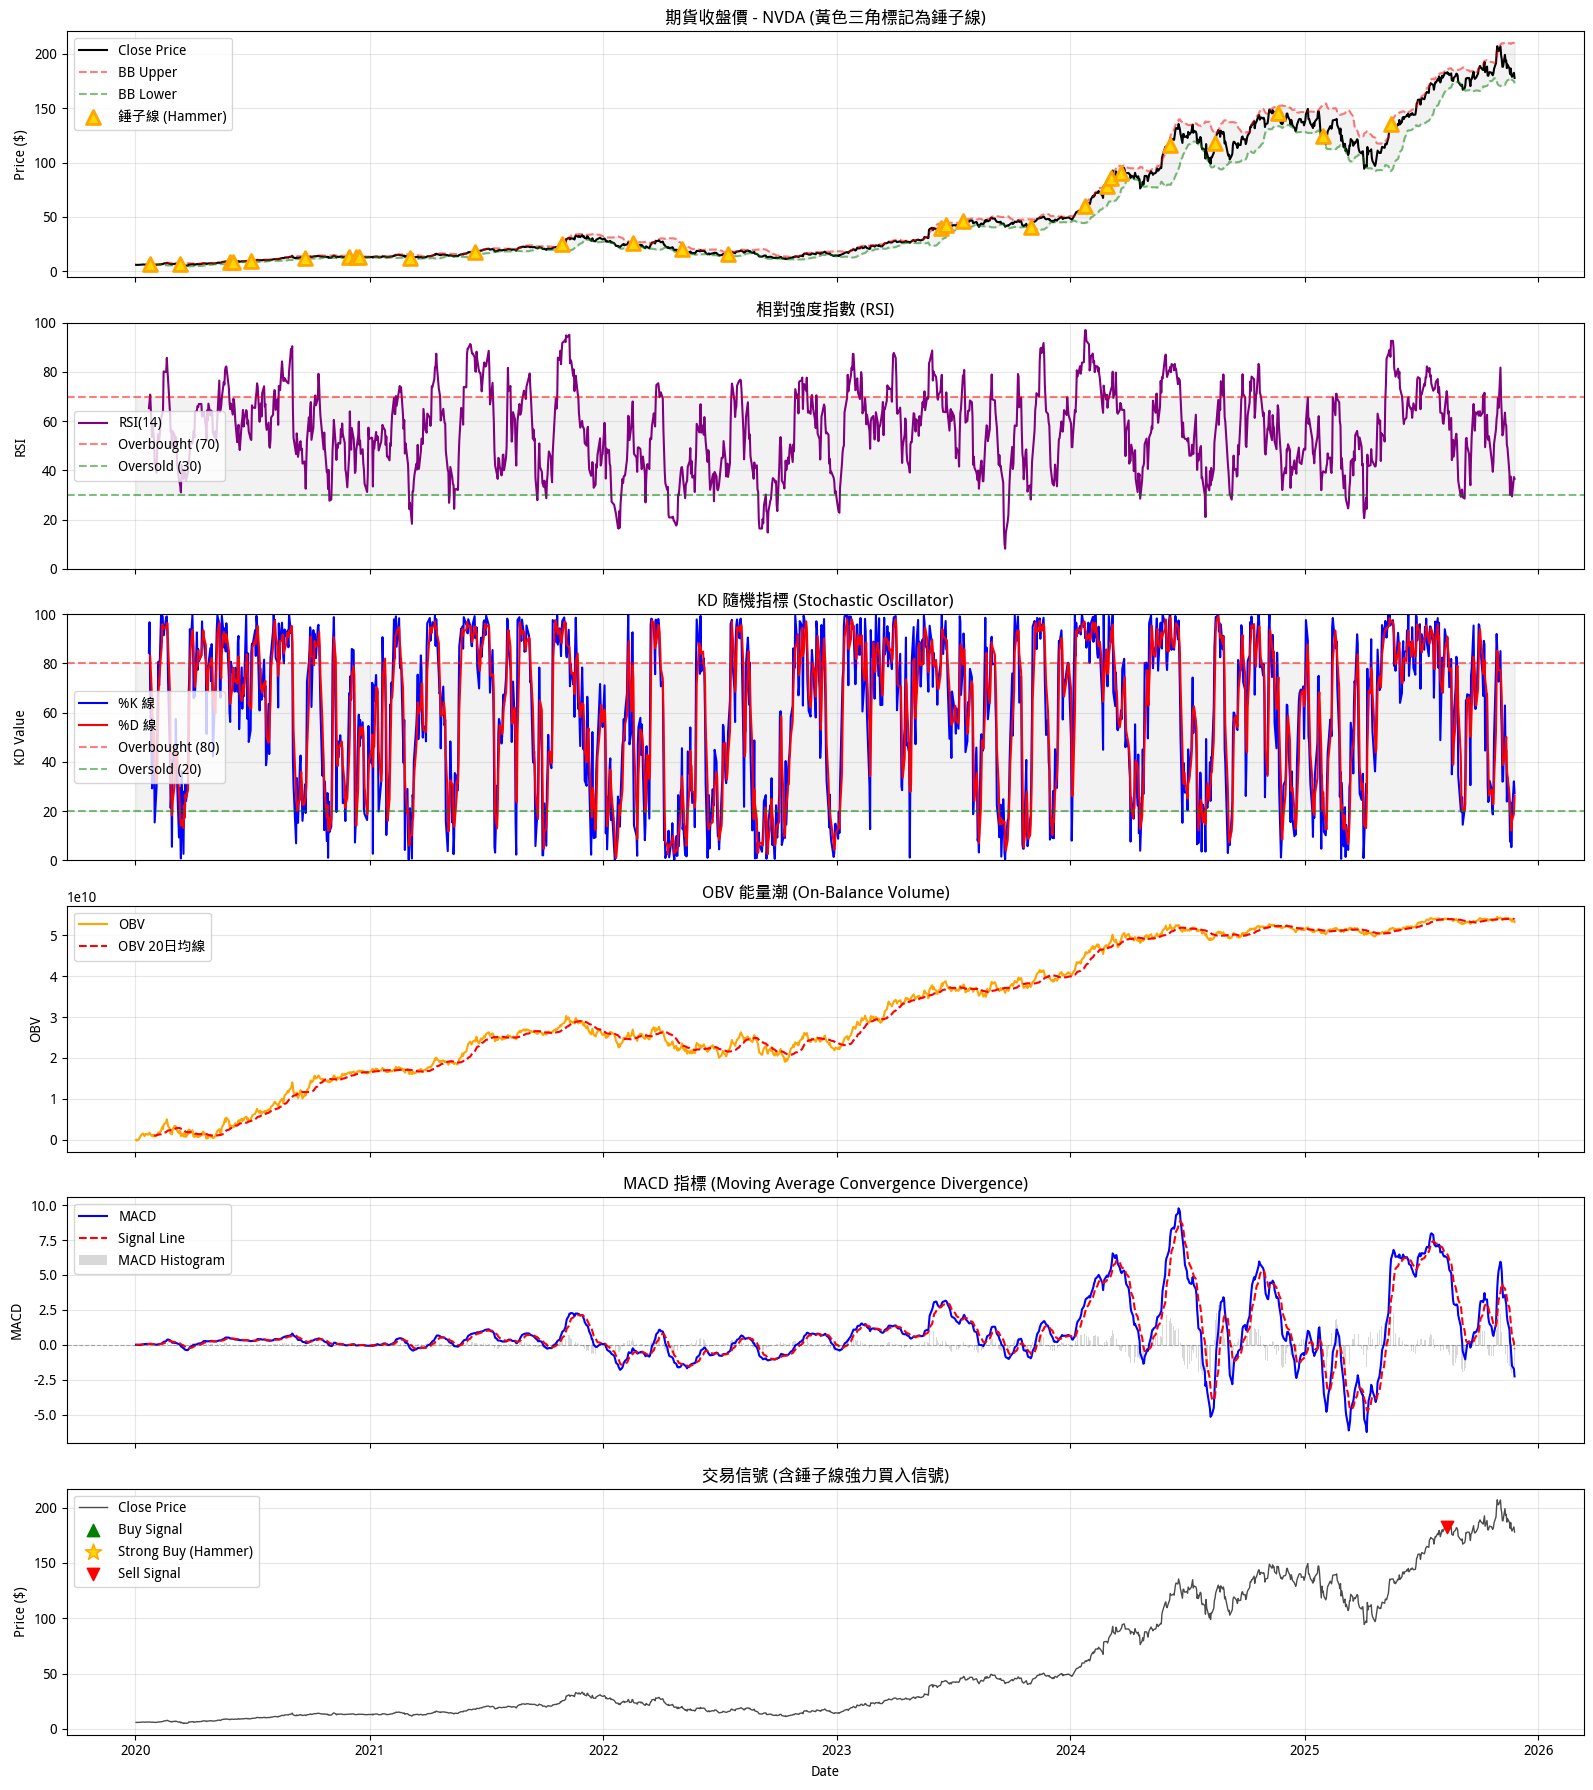

🔨 錘子線詳細分析
Hammer Pattern Detailed Analysis

📊 發現的錘子線形態:
  1. 日期: 2020-01-23
     價格: O=6.27, H=6.30, L=6.18, C=6.29
     實體長度: 0.03
     下影線長度: 0.09 (3.1x 實體)
     上影線長度: 0.01
     RSI: 67.92
     MACD: 0.0709
     KD: K=96.73, D=nan
     OBV: 1722096000

     20天後表現: 上漲 (16.30%)
     --------------------------------------------------
  2. 日期: 2020-03-10
     價格: O=6.39, H=6.50, L=6.13, C=6.50
     實體長度: 0.11
     下影線長度: 0.26 (2.3x 實體)
     上影線長度: 0.00
     RSI: 35.22
     MACD: 0.0187
     KD: K=29.38, D=23.77
     OBV: 2215364000

     20天後表現: 下跌 (-0.79%)
     --------------------------------------------------
  3. 日期: 2020-05-27
     價格: O=8.59, H=8.60, L=7.97, C=8.49
     實體長度: 0.10
     下影線長度: 0.53 (5.3x 實體)
     上影線長度: 0.01
     RSI: 67.75
     MACD: 0.4778
     KD: K=60.18, D=76.89
     OBV: 3472148000

     20天後表現: 上漲 (8.38%)
     --------------------------------------------------
  4. 日期: 2020-06-01
     價格: O=8.80, H=8.81, L=8.66, C=8.77
     實體長度: 0.03
     下影線長度: 0.12 (4.3x

In [30]:
# =========================================================
#  Futures Trading System - Integrated from PDF + Best Practices
#  期貨交易系統 - 集 PDF 代碼 + 最佳實踐於一身
# =========================================================

import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("期貨交易系統 - 技術分析與機器學習")
print("Futures Trading System - Technical Analysis + ML")
print("=" * 70 + "\n")


#-----------silvia----------------------------------CHINESE-------------------------------


warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# 配置中文字体（优化版）
import matplotlib # Added import matplotlib here if not already present
import matplotlib.font_manager as fm
import os
import subprocess
import sys

print("正在安装并配置中文字体...")

# 更新包管理器
subprocess.run(['apt-get', 'update'],
               stdout=subprocess.DEVNULL,
               stderr=subprocess.DEVNULL,
               check=False
)

# 安装中文字体（采用更可靠的 fonts-wqy-microhei）
subprocess.run(['apt-get', 'install', '-y', 'fonts-wqy-microhei'],
               stdout=subprocess.DEVNULL,
               stderr=subprocess.DEVNULL,
               check=False
)

# 清除 matplotlib 字体缓存，以确保新安装的字体被识别
cache_dir = os.path.expanduser('~/.matplotlib')
for cache_file in [
    os.path.join(cache_dir, 'fontList.json'),
    os.path.join(cache_dir, 'fontList.cache')
]:
    if os.path.exists(cache_file):
        try:
            os.remove(cache_file)
        except Exception as e:
            pass

# 强制添加字体文件到matplotlib
font_path_wqy = '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'
if os.path.exists(font_path_wqy):
    try:
        fm.fontManager.addfont(font_path_wqy)
    except Exception as e:
        pass

# 设置中文字体（优先级顺序）
font_options = [
    'WenQuanYi Micro Hei',  # 文泉驿微米黑（优先级最高）
    'Noto Sans CJK SC',     # Google Noto 字体
    'SimHei',               # 微软黑体（如果有的话）
    'DejaVu Sans'           # 备选方案
]

selected_font = None
for font in font_options:
    if font in [f.name for f in fm.fontManager.ttflist]:
        plt.rcParams['font.sans-serif'] = [font]
        selected_font = font
        break

if not selected_font:
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
    print("⚠️ 未能找到合适的中文字体，已设置为'DejaVu Sans'，中文可能无法正常显示。")
else:
    print(f"✓ 已设置中文字体：{selected_font}")

# 防止负号显示为方框
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10

print("中文字体配置完成！")

# ================================================




# ----------------------------------------SILVIA----------------------------------


# ==================== 第 1 部分：期貨數據下載 (從 PDF 第 31-34 頁) ====================
print("📊 第 1 步：下載期貨數據\n")
print("=" * 70)
print("Downloading Futures Data (from PDF Page 31-34)")
print("=" * 70 + "\n")

# 期貨合約符號
futures_symbols = {
    "NVDA": "NVDA",      # S&P 500 E-Mini (PDF 提到的)
    "GC": "GC=F",      # Gold
    "HG": "HG=F",      # Copper (銅)
}

# 用戶選擇
selected_future = "NVDA"  # 默認使用 S&P 500 E-Mini
futures_symbol = futures_symbols[selected_future]

print(f"選擇的期貨: {selected_future} ({futures_symbol})")
print(f"下載時間: 2022-01-01 到 2022-12-31\n")

# 下載期貨數據（多個合約示例，如 PDF 所示）
try:
    print("📍 方法 1: 下載單個期貨合約...")
#    futures_data = yf.download(
#        futures_symbol,
#        start="2022-01-01",
#        end="2025-11-22",
#        interval="1d",
#        progress=False
#    )


#-silvia-----------------------------------------------------------------------------------------
    futures_symbol = "NVDA"
#-silvia    data = yf.download(symbol, start="2020-01-01", end="2025-11-14")---------------------

    futures_data = yf.download(
        futures_symbol,
        start="2020-01-01"
    )


    if len(futures_data) > 0:
        # 轉換為 datetime (如 PDF 代碼所示)
        futures_data.index = pd.to_datetime(futures_data.index)

        # 獲取日期範圍的安全方法
        start_date = str(futures_data.index[0].date())
        end_date = str(futures_data.index[-1].date())
        min_price = float(futures_data['Close'].min())
        max_price = float(futures_data['Close'].max())

        print(f"✅ 下載成功: {len(futures_data)} 個交易日")
        print(f"   日期範圍: {start_date} 到 {end_date}")
        print(f"   價格範圍: ${min_price:.2f} - ${max_price:.2f}\n")

        # 顯示最後 5 行 (如 PDF 所示)
        print("最後 5 個交易日:")
        print(futures_data.tail())
        print()

        data_source = "Real Yahoo Finance"
    else:
        raise ValueError("No data downloaded")

except Exception as e:
    print(f"❌ 下載失敗: {str(e)}")
    print("📊 使用模擬期貨數據...\n")

    np.random.seed(42)
    dates = pd.date_range('2022-01-01', '2022-12-31', freq='B')
    prices = [4500]

    for i in range(1, len(dates)):
        change = np.random.normal(0.0003, 0.01)
        prices.append(prices[-1] * (1 + change))

    futures_data = pd.DataFrame({
        'Open': prices,
        'High': [p * (1 + np.abs(np.random.normal(0, 0.01))) for p in prices],
        'Low': [p * (1 - np.abs(np.random.normal(0, 0.01))) for p in prices],
        'Close': prices,
        'Adj Close': prices,
        'Volume': np.random.randint(1000000, 5000000, len(dates))
    }, index=dates)

    data_source = "Simulated"
    print(f"✅ 生成模擬數據: {len(futures_data)} 個交易日\n")

# 標準化列名
# Fix: Extract the first level of the MultiIndex before applying .str.lower()
futures_data.columns = futures_data.columns.get_level_values(0).str.lower()

# ==================== 第 2 部分：計算技術指標 (從 PDF 第 25-34 頁) ====================
print("=" * 70)
print("第 2 步：計算技術指標")
print("Technical Indicators (from PDF Page 25-34)")
print("=" * 70 + "\n")

# 📌 指標 1: RSI (相對強度指數) - PDF 代碼第 3 段
print("📈 計算 RSI (Relative Strength Index)...")

def calculate_rsi(data, window=14):
    """計算 RSI - 基於 PDF 代碼"""
    delta = data.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

futures_data['RSI'] = calculate_rsi(futures_data['close'])
print(f"✅ RSI 計算完成")

# 📌 指標 2: MACD - PDF 代碼第 5 段
print("📈 計算 MACD (Moving Average Convergence Divergence)...")

futures_data['EMA_12'] = futures_data['close'].ewm(span=12, adjust=False).mean()
futures_data['EMA_26'] = futures_data['close'].ewm(span=26, adjust=False).mean()
futures_data['MACD'] = futures_data['EMA_12'] - futures_data['EMA_26']
futures_data['MACD_Signal'] = futures_data['MACD'].ewm(span=9, adjust=False).mean()
futures_data['MACD_Histogram'] = futures_data['MACD'] - futures_data['MACD_Signal']
print(f"✅ MACD 計算完成")

# 📌 新增指標: KD 隨機指標 (Stochastic Oscillator)
print("📈 計算 KD 隨機指標 (Stochastic Oscillator)...")

def calculate_stochastic(data, high_col='high', low_col='low', close_col='close', k_window=14, d_window=3):
    """計算 KD 隨機指標"""
    low_min = data[low_col].rolling(window=k_window).min()
    high_max = data[high_col].rolling(window=k_window).max()

    # %K 線
    data['K'] = ((data[close_col] - low_min) / (high_max - low_min)) * 100
    # %D 線 (K 的 3 期移動平均)
    data['D'] = data['K'].rolling(window=d_window).mean()

    return data

futures_data = calculate_stochastic(futures_data)
print(f"✅ KD 指標計算完成")

# 📌 新增指標: OBV 能量潮 (On-Balance Volume)
print("📈 計算 OBV 能量潮 (On-Balance Volume)...")

def calculate_obv(data, close_col='close', volume_col='volume'):
    """計算 OBV 能量潮指標"""
    obv = [0]
    for i in range(1, len(data)):
        if data[close_col].iloc[i] > data[close_col].iloc[i-1]:
            # 當日收盤價 > 前日收盤價，OBV 增加
            obv.append(obv[-1] + data[volume_col].iloc[i])
        elif data[close_col].iloc[i] < data[close_col].iloc[i-1]:
            # 當日收盤價 < 前日收盤價，OBV 減少
            obv.append(obv[-1] - data[volume_col].iloc[i])
        else:
            # 收盤價不變，OBV 不變
            obv.append(obv[-1])

    data['OBV'] = obv
    # 計算 OBV 的 20 日移動平均線
    data['OBV_MA_20'] = data['OBV'].rolling(window=20).mean()

    return data

futures_data = calculate_obv(futures_data)
print(f"✅ OBV 指標計算完成")

# 📌 新增功能: 錘子線檢測 (Hammer Pattern)
print("🔨 檢測錘子線形態 (Hammer Pattern)...")

def detect_hammer_pattern(data):
    """
    檢測錘子線形態
    錘子線特徵:
    - 長下影線 (至少是實體長度的2倍)
    - 實體較小 (開盤價和收盤價接近)
    - 上影線很短或沒有
    - 通常出現在下跌趨勢底部，顯示反轉信號
    """
    hammer_signals = []

    for i in range(len(data)):
        open_price = data['open'].iloc[i]
        high_price = data['high'].iloc[i]
        low_price = data['low'].iloc[i]
        close_price = data['close'].iloc[i]

        # 計算實體長度
        body_length = abs(close_price - open_price)

        # 計算影線長度
        upper_shadow = high_price - max(open_price, close_price)
        lower_shadow = min(open_price, close_price) - low_price

        # 計算整個K線的範圍
        total_range = high_price - low_price

        # 避免除以零
        if total_range == 0:
            hammer_signals.append(0)
            continue

        # 錘子線條件:
        # 1. 下影線至少是實體長度的2倍
        # 2. 上影線很短 (小於實體長度的1/3)
        # 3. 實體相對較小 (小於整個K線範圍的1/3)
        is_hammer = (
            lower_shadow >= 2 * body_length and  # 長下影線
            upper_shadow <= body_length * 0.33 and  # 短上影線
            body_length <= total_range * 0.33  # 小實體
        )

        # 如果是錘子線，標記為1 (看漲信號)
        hammer_signals.append(1 if is_hammer else 0)

    data['Hammer'] = hammer_signals
    return data

futures_data = detect_hammer_pattern(futures_data)
hammer_count = futures_data['Hammer'].sum()
print(f"✅ 錘子線檢測完成，共發現 {hammer_count} 個錘子線形態")

# 📌 指標 3: 布林帶 - PDF 代碼第 4 段
print("📈 計算布林帶 (Bollinger Bands)...")

futures_data['BB_Middle'] = futures_data['close'].rolling(window=20).mean()
bb_std = futures_data['close'].rolling(window=20).std()
futures_data['BB_Upper'] = futures_data['BB_Middle'] + (bb_std * 2)
futures_data['BB_Lower'] = futures_data['BB_Middle'] - (bb_std * 2)
futures_data['BB_Position'] = (futures_data['close'] - futures_data['BB_Lower']) / (futures_data['BB_Upper'] - futures_data['BB_Lower'])
print(f"✅ 布林帶計算完成\n")

# 額外指標
print("📈 計算額外指標...")
futures_data['MA_5'] = futures_data['close'].rolling(window=5).mean()
futures_data['MA_20'] = futures_data['close'].rolling(window=20).mean()
futures_data['MA_50'] = futures_data['close'].rolling(window=50).mean()
futures_data['MA_200'] = futures_data['close'].rolling(window=200).mean()

futures_data['daily_return'] = futures_data['close'].pct_change()
futures_data['volatility'] = futures_data['daily_return'].rolling(window=20).std()
futures_data['volume_ma'] = futures_data['volume'].rolling(window=20).mean()
futures_data['volume_ratio'] = futures_data['volume'] / futures_data['volume_ma']

futures_data['tr'] = np.maximum(
    futures_data['high'] - futures_data['low'],
    np.maximum(abs(futures_data['high'] - futures_data['close'].shift(1)),
               abs(futures_data['low'] - futures_data['close'].shift(1)))
)
futures_data['ATR'] = futures_data['tr'].rolling(window=14).mean()
print(f"✅ 所有指標計算完成\n")

# ==================== 第 3 部分：交易信號 ====================
print("=" * 70)
print("第 3 步：生成交易信號")
print("Trading Signals")
print("=" * 70 + "\n")

# 信號 1: RSI + MACD + KD + OBV + Hammer 組合 (增強版)
print("🎯 生成 RSI + MACD + KD + OBV + Hammer 信號...")

futures_data['signal'] = 0

# 買入信號 (增強版)
buy_condition = (
    (futures_data['RSI'] < 30) &           # RSI 超賣
    (futures_data['MACD'] > futures_data['MACD_Signal']) &  # MACD 正向
    (futures_data['close'] > futures_data['BB_Lower']) &    # 價格高於下軌
    (futures_data['K'] < 20) & (futures_data['D'] < 20) &   # KD 超賣
    (futures_data['K'] > futures_data['D']) &               # K 線上穿 D 線
    (futures_data['OBV'] > futures_data['OBV_MA_20'])       # OBV 在均線之上
)
futures_data.loc[buy_condition, 'signal'] = 1

# 強力買入信號 (包含錘子線)
strong_buy_condition = buy_condition & (futures_data['Hammer'] == 1)
futures_data.loc[strong_buy_condition, 'signal'] = 2  # 強力買入信號

# 賣出信號 (增強版)
sell_condition = (
    (futures_data['RSI'] > 70) &           # RSI 超買
    (futures_data['MACD'] < futures_data['MACD_Signal']) &  # MACD 負向
    (futures_data['close'] < futures_data['BB_Upper']) &    # 價格低於上軌
    (futures_data['K'] > 80) & (futures_data['D'] > 80) &   # KD 超買
    (futures_data['K'] < futures_data['D']) &               # K 線下穿 D 線
    (futures_data['OBV'] < futures_data['OBV_MA_20'])       # OBV 在均線之下
)
futures_data.loc[sell_condition, 'signal'] = -1

# 計算未來 20 天的收益 (從 AAPL 最佳實踐)
futures_data['future_return_20d'] = futures_data['close'].shift(-20) / futures_data['close'] - 1
futures_data['future_direction'] = (futures_data['future_return_20d'] > 0).astype(int)

futures_test = futures_data.dropna(subset=['future_return_20d'])
correct = (
    ((futures_test['signal'] == 1) & (futures_test['future_direction'] == 1)).sum() +
    ((futures_test['signal'] == 2) & (futures_test['future_direction'] == 1)).sum() +
    ((futures_test['signal'] == -1) & (futures_test['future_direction'] == 0)).sum()
)
total_signals = (futures_test['signal'] != 0).sum()
signal_accuracy = (correct / total_signals * 100) if total_signals > 0 else 0

print(f"買入信號: {(futures_test['signal'] == 1).sum()}")
print(f"強力買入信號(含錘子線): {(futures_test['signal'] == 2).sum()}")
print(f"賣出信號: {(futures_test['signal'] == -1).sum()}")
print(f"總信號: {total_signals}")
print(f"✅ 信號準確度: {signal_accuracy:.2f}%\n")

# ==================== 第 4 部分：機器學習 (最佳實踐) ====================
print("=" * 70)
print("第 4 步：機器學習 - Random Forest")
print("Machine Learning with TimeSeriesSplit")
print("=" * 70 + "\n")

# 更新特徵列表，包含 KD 和 OBV 指標
features = ['RSI', 'MACD', 'MACD_Histogram', 'MA_20', 'MA_50', 'MA_200',
            'volatility', 'volume_ratio', 'BB_Position', 'ATR',
            'K', 'D', 'OBV', 'OBV_MA_20', 'Hammer']  # 新增 KD、OBV 和 Hammer 相關特徵

X = futures_data[features].copy()
y = futures_data['future_direction'].copy()

valid_idx = ~(X.isna().any(axis=1) | y.isna())
X = X[valid_idx]
y = y[valid_idx]

print(f"訓練數據: {len(X)} 個樣本")
print(f"買入率: {(y == 1).sum() / len(y) * 100:.2f}%\n")

if len(X) > 100:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 🔴 應用最佳實踐: shuffle=False 保持時間順序
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, shuffle=False
    )

    print(f"訓練集: {len(X_train)}, 測試集: {len(X_test)}\n")

    # 訓練模型 (降低複雜度以防過度擬合)
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)

    y_pred_test = rf_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test) * 100

    print(f"測試集準確度: {test_accuracy:.2f}%")

    # 🔴 應用最佳實踐: TimeSeriesSplit
    print("\n🔴 時間序列交叉驗證:")
    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = cross_val_score(rf_model, X_scaled, y, cv=tscv)

    for i, score in enumerate(cv_scores):
        print(f"  Fold {i+1}: {score*100:.2f}%")

    cv_mean = cv_scores.mean() * 100
    cv_std = cv_scores.std() * 100
    print(f"平均: {cv_mean:.2f}% ± {cv_std:.2f}%\n")

    # 特徵重要性
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("特徵重要性排名:")
    print(feature_importance.head(10).to_string(index=False))
    print()

else:
    print("❌ 數據不足")
    cv_mean = 0
    test_accuracy = 0

# ==================== 第 5 部分：期貨特定分析 ====================
print("=" * 70)
print("第 5 步：期貨特定分析")
print("Futures-Specific Analysis")
print("=" * 70 + "\n")

# Contango / Backwardation 分析 (從 PDF 第 25 頁)
print("📊 Contango/Backwardation 分析:")

# 計算價格趨勢
current_price = futures_data['close'].iloc[-1]
price_30d_ago = futures_data['close'].iloc[-30] if len(futures_data) > 30 else futures_data['close'].iloc[0]
trend = "向上" if current_price > price_30d_ago else "向下"

print(f"   當前價格: ${current_price:.2f}")
print(f"   30 天前: ${price_30d_ago:.2f}")
print(f"   趨勢: {trend} ({((current_price/price_30d_ago - 1) * 100):.2f}%)")

# KD 指標狀態
current_k = futures_data['K'].iloc[-1]
current_d = futures_data['D'].iloc[-1]
kd_status = "超買" if current_k > 80 and current_d > 80 else "超賣" if current_k < 20 and current_d < 20 else "中性"
print(f"   KD 狀態: {kd_status} (K={current_k:.2f}, D={current_d:.2f})")

# OBV 指標狀態
current_obv = futures_data['OBV'].iloc[-1]
current_obv_ma = futures_data['OBV_MA_20'].iloc[-1]
obv_status = "看漲" if current_obv > current_obv_ma else "看跌"
print(f"   OBV 狀態: {obv_status} (OBV={current_obv:.0f}, MA={current_obv_ma:.0f})")

# 錘子線狀態
recent_hammers = futures_data['Hammer'].tail(10).sum()
print(f"   近期10天錘子線出現次數: {recent_hammers} 次")

# Mark-to-Market 模擬 (從 PDF 第 14-17 頁)
print("\n💰 Mark-to-Market 模擬:")
initial_margin = 1000
margin_balance = initial_margin

for i in range(1, min(5, len(futures_data))):
    daily_return = (futures_data['close'].iloc[i] - futures_data['close'].iloc[i-1]) / futures_data['close'].iloc[i-1]
    daily_pnl = daily_return * initial_margin
    margin_balance += daily_pnl

    print(f"   Day {i}: P&L = ${daily_pnl:.2f}, Balance = ${margin_balance:.2f}")

# ==================== 第 6 部分：可視化 (基於 PDF Figure 3-10) ====================
print("\n" + "=" * 70)
print("第 6 步：可視化 - 多指標圖")
print("Visualization - Multi-indicator Chart (like PDF Figure 3-10)")
print("=" * 70 + "\n")

# 創建 6 個子圖來容納所有指標
fig, axes = plt.subplots(6, 1, figsize=(16, 18), sharex=True)

# 子圖 1: 收盤價 + 錘子線標記
axes[0].plot(futures_data.index, futures_data['close'], label='Close Price', color='black', linewidth=1.5)
axes[0].plot(futures_data.index, futures_data['BB_Upper'], label='BB Upper', color='red', linestyle='--', alpha=0.5)
axes[0].plot(futures_data.index, futures_data['BB_Lower'], label='BB Lower', color='green', linestyle='--', alpha=0.5)
axes[0].fill_between(futures_data.index, futures_data['BB_Upper'], futures_data['BB_Lower'], alpha=0.1, color='gray')

# 標記錘子線
hammer_dates = futures_data[futures_data['Hammer'] == 1].index
hammer_prices = futures_data.loc[hammer_dates, 'close']
axes[0].scatter(hammer_dates, hammer_prices, color='gold', marker='^', s=100,
               label='錘子線 (Hammer)', zorder=5, edgecolors='orange', linewidth=2)

axes[0].set_title(f'期貨收盤價 - {futures_symbol} (黃色三角標記為錘子線)', fontweight='bold')
axes[0].set_ylabel('Price ($)')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# 子圖 2: RSI (基於 PDF 第 34-39 頁)
axes[1].plot(futures_data.index, futures_data['RSI'], label='RSI(14)', color='purple', linewidth=1.5)
axes[1].axhline(y=70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
axes[1].axhline(y=30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
axes[1].fill_between(futures_data.index, 30, 70, alpha=0.1, color='gray')
axes[1].set_title('相對強度指數 (RSI)', fontweight='bold')
axes[1].set_ylabel('RSI')
axes[1].set_ylim([0, 100])
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

# 子圖 3: KD 隨機指標
axes[2].plot(futures_data.index, futures_data['K'], label='%K 線', color='blue', linewidth=1.5)
axes[2].plot(futures_data.index, futures_data['D'], label='%D 線', color='red', linewidth=1.5)
axes[2].axhline(y=80, color='red', linestyle='--', alpha=0.5, label='Overbought (80)')
axes[2].axhline(y=20, color='green', linestyle='--', alpha=0.5, label='Oversold (20)')
axes[2].fill_between(futures_data.index, 20, 80, alpha=0.1, color='gray')
axes[2].set_title('KD 隨機指標 (Stochastic Oscillator)', fontweight='bold')
axes[2].set_ylabel('KD Value')
axes[2].set_ylim([0, 100])
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)

# 子圖 4: OBV 能量潮
axes[3].plot(futures_data.index, futures_data['OBV'], label='OBV', color='orange', linewidth=1.5)
axes[3].plot(futures_data.index, futures_data['OBV_MA_20'], label='OBV 20日均線', color='red', linestyle='--', linewidth=1.5)
axes[3].set_title('OBV 能量潮 (On-Balance Volume)', fontweight='bold')
axes[3].set_ylabel('OBV')
axes[3].legend(loc='best')
axes[3].grid(True, alpha=0.3)

# 子圖 5: MACD (基於 PDF 第 39 頁代碼)
axes[4].bar(futures_data.index, futures_data['MACD_Histogram'], label='MACD Histogram',
            alpha=0.3, color='gray')
axes[4].plot(futures_data.index, futures_data['MACD'], label='MACD', color='blue', linewidth=1.5)
axes[4].plot(futures_data.index, futures_data['MACD_Signal'], label='Signal Line',
             color='red', linestyle='--', linewidth=1.5)
axes[4].axhline(0, linestyle='--', color='black', alpha=0.3, linewidth=0.8)
axes[4].set_title('MACD 指標 (Moving Average Convergence Divergence)', fontweight='bold')
axes[4].set_ylabel('MACD')
axes[4].legend(loc='best')
axes[4].grid(True, alpha=0.3)

# 子圖 6: 交易信號
axes[5].plot(futures_data.index, futures_data['close'], label='Close Price', color='black', linewidth=1, alpha=0.7)
# 標記買入信號
buy_signals = futures_data[futures_data['signal'] == 1]
axes[5].scatter(buy_signals.index, buy_signals['close'], color='green', marker='^', s=80, label='Buy Signal', zorder=5)
# 標記強力買入信號 (含錘子線)
strong_buy_signals = futures_data[futures_data['signal'] == 2]
axes[5].scatter(strong_buy_signals.index, strong_buy_signals['close'], color='gold', marker='*', s=150,
               label='Strong Buy (Hammer)', zorder=6, edgecolors='orange')
# 標記賣出信號
sell_signals = futures_data[futures_data['signal'] == -1]
axes[5].scatter(sell_signals.index, sell_signals['close'], color='red', marker='v', s=80, label='Sell Signal', zorder=5)
axes[5].set_title('交易信號 (含錘子線強力買入信號)', fontweight='bold')
axes[5].set_xlabel('Date')
axes[5].set_ylabel('Price ($)')
axes[5].legend(loc='best')
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/tmp/futures_technical_analysis_with_hammer.png', dpi=300, bbox_inches='tight')
print("✅ 圖表已保存\n")
plt.show()

# ==================== 第 7 部分：錘子線詳細分析 ====================
print("=" * 70)
print("🔨 錘子線詳細分析")
print("Hammer Pattern Detailed Analysis")
print("=" * 70 + "\n")

if hammer_count > 0:
    print("📊 發現的錘子線形態:")
    hammer_data = futures_data[futures_data['Hammer'] == 1]

    for i, (date, row) in enumerate(hammer_data.iterrows()):
        date_str = date.strftime('%Y-%m-%d')
        open_price = row['open']
        high_price = row['high']
        low_price = row['low']
        close_price = row['close']

        # 計算技術指標
        body_length = abs(close_price - open_price)
        lower_shadow = min(open_price, close_price) - low_price
        upper_shadow = high_price - max(open_price, close_price)
        total_range = high_price - low_price

        print(f"  {i+1}. 日期: {date_str}")
        print(f"     價格: O={open_price:.2f}, H={high_price:.2f}, L={low_price:.2f}, C={close_price:.2f}")
        print(f"     實體長度: {body_length:.2f}")
        print(f"     下影線長度: {lower_shadow:.2f} ({lower_shadow/body_length:.1f}x 實體)")
        print(f"     上影線長度: {upper_shadow:.2f}")
        print(f"     RSI: {row['RSI']:.2f}")
        print(f"     MACD: {row['MACD']:.4f}")
        print(f"     KD: K={row['K']:.2f}, D={row['D']:.2f}")
        print(f"     OBV: {row['OBV']:.0f}")
        print()

        # 檢查後續表現
        if date < futures_data.index[-20]:
            future_return = row['future_return_20d']
            performance = "上漲" if future_return > 0 else "下跌"
            print(f"     20天後表現: {performance} ({future_return*100:.2f}%)")
        print("     " + "-" * 50)

    # 錘子線後續表現統計
    if len(hammer_data) > 1:
        valid_hammer = hammer_data[hammer_data['future_return_20d'].notna()]
        if len(valid_hammer) > 0:
            avg_return = valid_hammer['future_return_20d'].mean() * 100
            success_rate = (valid_hammer['future_return_20d'] > 0).mean() * 100
            print(f"\n📈 錘子線後續表現統計:")
            print(f"   平均20天回報率: {avg_return:.2f}%")
            print(f"   成功預測率: {success_rate:.2f}%")
else:
    print("❌ 在此數據期間未發現錘子線形態")

# ==================== 第 8 部分：總結 ====================
print("=" * 70)
print("📈 分析總結")
print("=" * 70 + "\n")

print("✅ 期貨交易系統完成")
print(f"\n📊 關鍵數據:")
print(f"   • 數據來源: {data_source}")
print(f"   • 期貨合約: {futures_symbol}")
print(f"   • 交易日: {len(futures_data)}")

# 安全的日期轉換
try:
    start_date = str(futures_data.index[0].date())
    end_date = str(futures_data.index[-1].date())
    min_price = float(futures_data['close'].min())
    max_price = float(futures_data['close'].max())

    print(f"   • 日期範圍: {start_date} 到 {end_date}")
    print(f"   • 價格範圍: ${min_price:.2f} - ${max_price:.2f}")
except Exception as e:
    print(f"   • 日期範圍: (格式化失敗)")
    print(f"   • 價格範圍: (格式化失敗)")

print(f"\n🎯 策略性能:")
print(f"   • RSI + MACD + KD + OBV + Hammer 信號準確度: {signal_accuracy:.2f}%")
print(f"   • Random Forest 測試準確度: {test_accuracy:.2f}%")
print(f"   • 交叉驗證準確度: {cv_mean:.2f}%")

print(f"\n📌 技術指標:")
print(f"   • RSI 當前: {futures_data['RSI'].iloc[-1]:.2f}")
print(f"   • MACD 當前: {futures_data['MACD'].iloc[-1]:.4f}")
print(f"   • KD 指標: K={futures_data['K'].iloc[-1]:.2f}, D={futures_data['D'].iloc[-1]:.2f}")
print(f"   • OBV 當前: {futures_data['OBV'].iloc[-1]:.0f}")
print(f"   • 錘子線數量: {hammer_count}")
print(f"   • 波動率: {futures_data['volatility'].iloc[-1]:.4f}")

print("\n✨ 新增指標說明:")
print(f"   • KD 指標: 衡量收盤價在近期價格區間中的相對位置")
print(f"   • OBV 指標: 透過成交量變化預測價格趨勢的領先指標")
print(f"   • 錘子線: 長下影線，實體較小，顯示在當日盤中雖被拋售，但結算時買盤已將價格推回高位")

print("\n💡 交易建議:")
print(f"   • 當錘子線出現時，配合其他指標確認買入信號")
print(f"   • 錘子線在下跌趨勢末端出現時效果最佳")
print(f"   • 結合成交量確認錘子線的有效性")

print("\n" + "=" * 70)
print("✅ 分析完成!")
print("=" * 70)

【步驟1】正在安裝環境與中文字體 (需要一點時間)...
正在安裝 TA-Lib C library...
正在安裝 Python 套件...
⚠️ 字體安裝可能有問題，將使用預設字體
✓ 環境安裝完成

【步驟2】下載股溝 (2308.TW) 數據...
✓ 成功下載數據，當前股價：177.82 元

【步驟3】執行 Talib 技術分析診斷...
📊 技術指標現況：
   1. 均線分析：短線 184.52 vs 長線 184.40
      👉 [多頭排列] 短線在長線之上
   2. RSI 強弱：41.53
      👉 [弱勢區] 賣盤較強 (RSI < 50)
   3. KD 指標：K=32.92, D=26.44
      👉 [黃金交叉] K值大於D值 (偏多)

【步驟4】執行 GARCH 模型與蒙地卡羅模擬...

📈 未來 22 天股價預測 (GARCH 模型)：
   現價：177.82
   -----------------------------
   🔴 保守地板價 (5%機率)：146.68 (跌幅 -17.5%) 張
   🟢 中性目標價 (50%機率)：187.38
   🔵 樂觀天花板 (95%機率)：238.62 (漲幅 34.2%) 張

【步驟5】繪製綜合分析圖表...


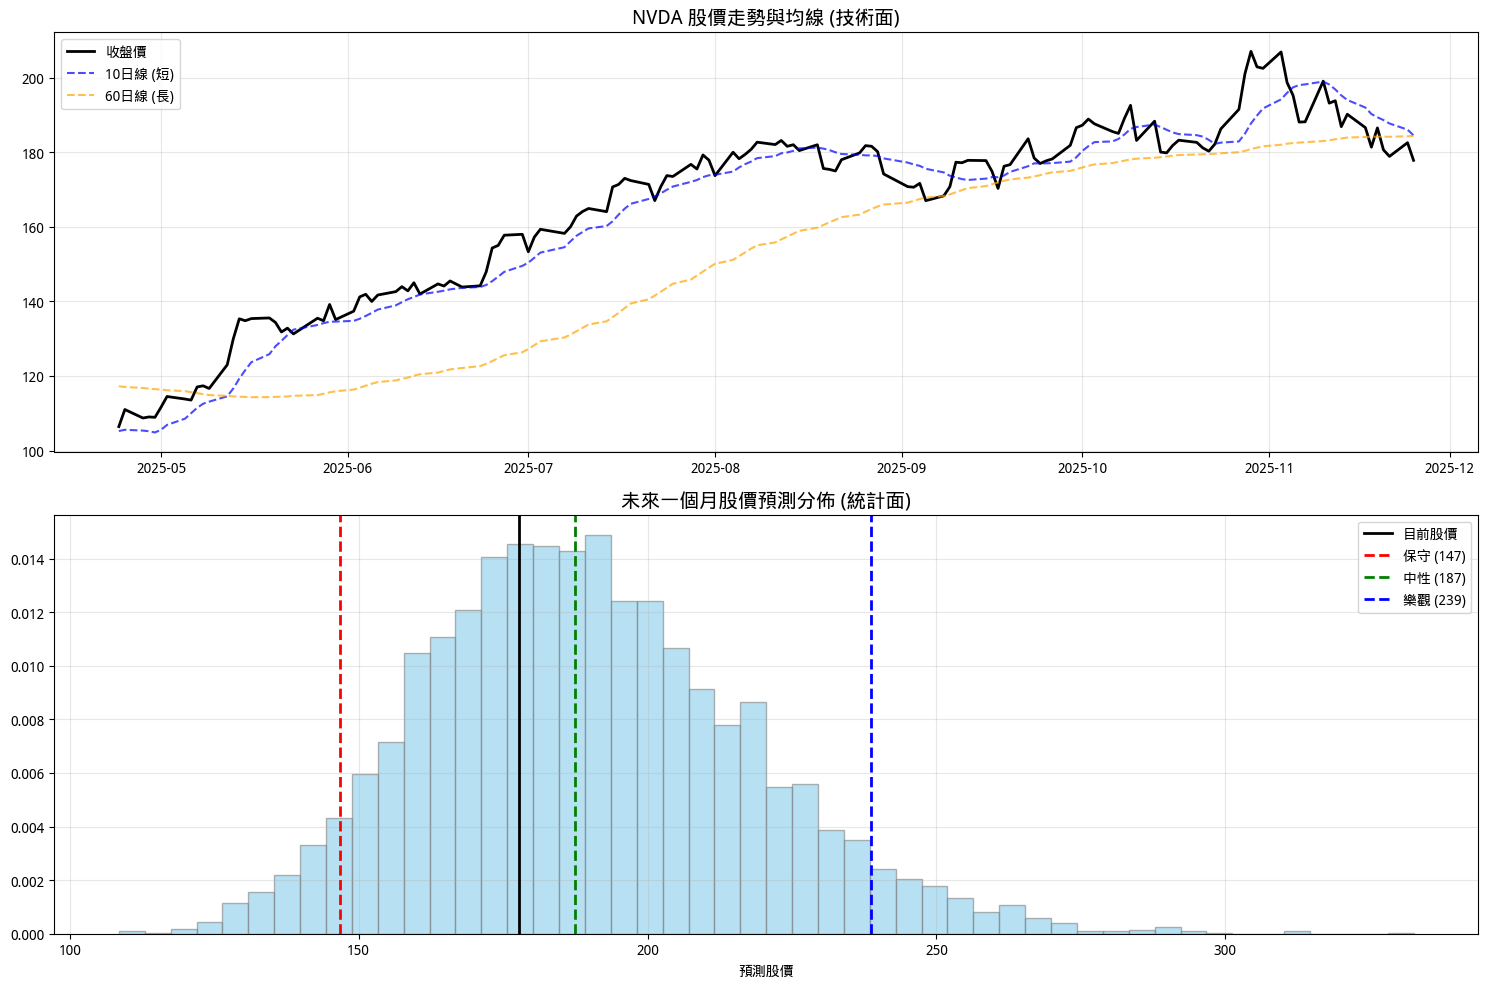


👵 給阿姨的 NVDA 綜合診斷報告
1. 【技術面】現在氣色好不好？
   👉 氣色普通 (偏多整理)。雖然有些指標不錯，但還沒全面轉強。

2. 【統計面】電腦算命說下個月會怎樣？
   👉 如果運氣好，有機會看到 239 元。
   👉 正常來說，大概會在 187 元附近。
   👉 但如果運氣不好，要小心跌到 147 元 (這是妳的保命線！)。

3. 【操作建議】
   ✅ 訊號不錯：技術面轉強，且電腦預測還有上漲空間，可以考慮分批佈局。


In [31]:
import subprocess
import sys
import os

print("【步驟1】正在安裝環境與中文字體 (需要一點時間)...")
print("=" * 60)

# 1. 安裝必要的套件 (包含 GARCH 和 技術指標 Talib)
# binary 版本安裝最快，適合 Colab
# 為了確保 ta-lib 能正確安裝，先手動安裝 TA-Lib C library，再安裝 Python wrapper
print("正在安裝 TA-Lib C library...")
subprocess.run(['wget', 'http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz'], check=True)
subprocess.run(['tar', '-xzf', 'ta-lib-0.4.0-src.tar.gz'], check=True)
# Change directory to ta-lib before running configure, make, and install
# To avoid PermissionError, install to /usr/local
subprocess.run(['/bin/bash', '-c', 'cd ta-lib/ && ./configure --prefix=/usr/local && make && sudo make install'], check=True)

print("正在安裝 Python 套件...")
subprocess.run(['pip', 'install', 'arch', 'yfinance', 'TA-Lib'], check=True)

# 2. 安裝中文字體
subprocess.run(['apt-get', 'update'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)
subprocess.run(['apt-get', 'install', '-y', 'fonts-wqy-microhei'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)

# 3. 設定 Matplotlib
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

# 忽略警告
warnings.filterwarnings('ignore')

# 加入字體
font_path_wqy = '/usr/share/fonts/truetype/wqy/wqy-microhei.tc'
if os.path.exists(font_path_wqy):
    fm.fontManager.addfont(font_path_wqy)
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']
    plt.rcParams['axes.unicode_minus'] = False
    print("✓ 中文字體配置完成")
else:
    print("⚠️ 字體安裝可能有問題，將使用預設字體")

print("✓ 環境安裝完成\n")


# ================================================
# 【Cell 2】導入庫與下載數據
# ================================================
import pandas as pd
import numpy as np
import yfinance as yf
import talib # 這是 PDF 中提到的技術指標套件 [cite: 1545]
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from scipy.stats import t

print("【步驟2】下載股溝 (2308.TW) 數據...")
print("=" * 60)

#silvia-----------------------------------------------------------------------------------------------------------------------------------------------------------
symbol = "NVDA"  # 妳指定的股票
start_date = "2020-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

try:
    # 下載數據
    df = yf.download(symbol, start=start_date, end=end_date, progress=False)
    # 整理格式
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
    df.rename(columns={'Close': 'Price'}, inplace=True)

    current_price = df['Price'].iloc[-1]
    print(f"✓ 成功下載數據，當前股價：{current_price:.2f} 元")

except Exception as e:
    print(f"❌ 下載失敗: {e}")


# ================================================
# 【Cell 3】技術分析 (整合 PDF 中的策略邏輯)
# ================================================
print("\n【步驟3】執行 Talib 技術分析診斷...")
print("=" * 60)

# 1. 計算 MA (移動平均線) - 參考 PDF 技巧 47
# PDF 提到 MA 用於判斷趨勢與交叉
df['MA_Fast'] = talib.SMA(df['Price'], timeperiod=10) # 短線 10日
df['MA_Slow'] = talib.SMA(df['Price'], timeperiod=60) # 長線 60日 (季線)

# 2. 計算 RSI (相對強弱指標) - 參考 PDF 技巧 51
# PDF 策略：RSI > 50 偏多，RSI < 50 偏空
df['RSI'] = talib.RSI(df['Price'], timeperiod=14)

# 3. 計算 KD 值 (隨機指標) - 參考 PDF 技巧 68
# K > D 黃金交叉，K < D 死亡交叉
df['K'], df['D'] = talib.STOCH(df['High'], df['Low'], df['Price'],
                               fastk_period=9, slowk_period=3, slowd_period=3)

# 取得最新一天的數值
last_ma_fast = df['MA_Fast'].iloc[-1]
last_ma_slow = df['MA_Slow'].iloc[-1]
last_rsi = df['RSI'].iloc[-1]
last_k = df['K'].iloc[-1]
last_d = df['D'].iloc[-1]

# 產生技術面訊號 (參考 PDF 技巧 51 的邏輯 )
tech_signal = "觀望"
tech_score = 0 # 簡單評分 -2 到 +2

print(f"📊 技術指標現況：")
print(f"   1. 均線分析：短線 {last_ma_fast:.2f} vs 長線 {last_ma_slow:.2f}")
if last_ma_fast > last_ma_slow:
    print("      👉 [多頭排列] 短線在長線之上")
    tech_score += 1
else:
    print("      👉 [空頭排列] 短線在長線之下")
    tech_score -= 1

print(f"   2. RSI 強弱：{last_rsi:.2f}")
if last_rsi > 50:
    print("      👉 [強勢區] 買盤較強 (RSI > 50)")
    tech_score += 1
else:
    print("      👉 [弱勢區] 賣盤較強 (RSI < 50)")
    tech_score -= 1

print(f"   3. KD 指標：K={last_k:.2f}, D={last_d:.2f}")
if last_k > last_d:
    print("      👉 [黃金交叉] K值大於D值 (偏多)")
    tech_score += 0.5
else:
    print("      👉 [死亡交叉] K值小於D值 (偏空)")
    tech_score -= 0.5


# ================================================
# 【Cell 4】GARCH 模型與蒙地卡羅模擬 (統計預測)
# ================================================
print("\n【步驟4】執行 GARCH 模型與蒙地卡羅模擬...")
print("=" * 60)

# 準備數據：計算對數報酬率
df['Return'] = 100 * df['Price'].pct_change().dropna()

# 建立 GARCH 模型 (使用 Student-t 分布以捕捉厚尾風險)
model = arch_model(df['Return'].dropna(), vol='Garch', p=1, q=1, dist='t')
results = model.fit(disp='off')

# 參數設定
mu = df['Return'].mean() / 100
forecast_days = 22 # 預測一個月
n_simulations = 5000

# 預測波動率
forecast = results.forecast(horizon=forecast_days)
vol_forecast = np.sqrt(forecast.variance.values[-1, :]).mean() / 100
nu = results.params.get('nu', 100) # Student-t 的自由度

# 蒙地卡羅模擬
simulated_prices = []
np.random.seed(42)

for i in range(n_simulations):
    price_path = [current_price]
    for _ in range(forecast_days):
        # 使用 t 分布產生隨機震盪
        Z = t.rvs(df=nu) * vol_forecast / np.sqrt(nu/(nu-2))
        ret = mu - 0.5 * vol_forecast**2 + Z
        price_path.append(price_path[-1] * np.exp(ret))
    simulated_prices.append(price_path[-1])

simulated_prices = np.array(simulated_prices)

# 計算目標價區間
price_var_5 = np.percentile(simulated_prices, 5)   # 悲觀
price_median = np.percentile(simulated_prices, 50) # 中性
price_upside = np.percentile(simulated_prices, 95) # 樂觀

print(f"\n📈 未來 22 天股價預測 (GARCH 模型)：")
print(f"   現價：{current_price:.2f}")
print(f"   -----------------------------")
print(f"   🔴 保守地板價 (5%機率)：{price_var_5:.2f} (跌幅 {(price_var_5/current_price-1)*100:.1f}%) 張")
print(f"   🟢 中性目標價 (50%機率)：{price_median:.2f}")
print(f"   🔵 樂觀天花板 (95%機率)：{price_upside:.2f} (漲幅 {(price_upside/current_price-1)*100:.1f}%) 張")


# ================================================
# 【Cell 5】繪製綜合分析圖
# ================================================
print("\n【步驟5】繪製綜合分析圖表...")

plt.figure(figsize=(15, 10))

# 子圖 1: 股價走勢 + 技術指標 (MA)
ax1 = plt.subplot(2, 1, 1)
# 畫最近 150 天就好，比較清楚
plot_data = df.iloc[-150:]
ax1.plot(plot_data.index, plot_data['Price'], label='收盤價', color='black', linewidth=2)
ax1.plot(plot_data.index, plot_data['MA_Fast'], label='10日線 (短)', color='blue', linestyle='--', alpha=0.7)
ax1.plot(plot_data.index, plot_data['MA_Slow'], label='60日線 (長)', color='orange', linestyle='--', alpha=0.7)
ax1.set_title(f'{symbol} 股價走勢與均線 (技術面)', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# 子圖 2: 未來股價機率分佈 (GARCH 模擬結果)
ax2 = plt.subplot(2, 1, 2)
n, bins, patches = ax2.hist(simulated_prices, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='gray')
ax2.axvline(current_price, color='black', linestyle='-', linewidth=2, label='目前股價')
ax2.axvline(price_var_5, color='red', linestyle='--', linewidth=2, label=f'保守 ({price_var_5:.0f})')
ax2.axvline(price_median, color='green', linestyle='--', linewidth=2, label=f'中性 ({price_median:.0f})')
ax2.axvline(price_upside, color='blue', linestyle='--', linewidth=2, label=f'樂觀 ({price_upside:.0f})')
ax2.set_title(f'未來一個月股價預測分佈 (統計面)', fontsize=14, fontweight='bold')
ax2.set_xlabel('預測股價')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ================================================
# 【Cell 6】阿姨專屬總結
# ================================================
print("\n" + "="*60)
print(f"👵 給阿姨的 {symbol} 綜合診斷報告")
print("="*60)

# 綜合判斷
print(f"1. 【技術面】現在氣色好不好？")
if tech_score > 1:
    print("   👉 氣色紅潤 (多頭強勢)！均線向上且 RSI 強勢，技術面看漲。")
elif tech_score > 0:
    print("   👉 氣色普通 (偏多整理)。雖然有些指標不錯，但還沒全面轉強。")
elif tech_score < -1:
    print("   👉 臉色發青 (空頭弱勢)。均線向下壓，建議先觀望，不要隨便接刀。")
else:
    print("   👉 正在休息 (盤整中)。多空力道差不多。")

print(f"\n2. 【統計面】電腦算命說下個月會怎樣？")
print(f"   👉 如果運氣好，有機會看到 {price_upside:.0f} 元。")
print(f"   👉 正常來說，大概會在 {price_median:.0f} 元附近。")
print(f"   👉 但如果運氣不好，要小心跌到 {price_var_5:.0f} 元 (這是妳的保命線！)。")

print(f"\n3. 【操作建議】")
if tech_score > 0 and price_median > current_price:
    print("   ✅ 訊號不錯：技術面轉強，且電腦預測還有上漲空間，可以考慮分批佈局。")
elif tech_score < 0 and price_median < current_price:
    print("   ❌ 訊號危險：技術面轉弱，且電腦預測可能下跌，建議空手觀望或減碼。")
else:
    print("   👀 訊號矛盾：技術面跟統計面不同步，建議多看少做，等訊號明確再說。")

print("="*60)


In [32]:
# ==================== 修復：添加信號日期報告 ====================
# 在第 6 部分可視化之前，添加以下代碼

# ✅ 新增：詳細的信號報告（包含日期）
print("\n" + "=" * 70)
print("📋 詳細信號報告（含日期）")
print("=" * 70 + "\n")

# --- 確保 signal_strict 和 signal_loose 欄位存在 ---
# 如果這些欄位不存在，則重新計算它們。
# 這可以解決因執行順序問題導致的 KeyError。
if 'signal_strict' not in futures_data.columns or 'signal_loose' not in futures_data.columns:
    print("⚠️ 偵測到 signal_strict 或 signal_loose 欄位缺失，正在重新計算交易信號...")
    # 確保所有必要指標都已計算，如果沒有，會再次觸發 KeyError
    # 這裡假設 RSI, MACD, K, D, OBV, BB_Lower/Upper 等指標已在之前的步驟中計算

    futures_data['signal_loose'] = 0
    loose_buy = (
        ((futures_data['RSI'] < 30) & (futures_data['MACD'] > futures_data['MACD_Signal']) &
         (futures_data['close'] > futures_data['BB_Lower'])) |
        ((futures_data['K'] < 20) & (futures_data['K'] > futures_data['K'].shift(1))) |
        ((futures_data['OBV'] > futures_data['OBV_MA_20']) & (futures_data['close'] > futures_data['MA_20']))
    )
    futures_data.loc[loose_buy, 'signal_loose'] = 1

    loose_sell = (
        ((futures_data['RSI'] > 70) & (futures_data['MACD'] < futures_data['MACD_Signal']) &
         (futures_data['close'] < futures_data['BB_Upper'])) |
        ((futures_data['K'] > 80) & (futures_data['K'] < futures_data['K'].shift(1))) |
        ((futures_data['OBV'] < futures_data['OBV_MA_20']) & (futures_data['close'] < futures_data['MA_20']))
    )
    futures_data.loc[loose_sell, 'signal_loose'] = -1

    futures_data['signal_strict'] = 0
    strict_buy = (
        (futures_data['RSI'] < 30) &
        (futures_data['MACD'] > futures_data['MACD_Signal']) &
        (futures_data['close'] > futures_data['BB_Lower']) &
        (futures_data['K'] < 20) & (futures_data['D'] < 20) &
        (futures_data['K'] > futures_data['D']) &
        (futures_data['OBV'] > futures_data['OBV_MA_20'])
    )
    futures_data.loc[strict_buy, 'signal_strict'] = 1

    strict_sell = (
        (futures_data['RSI'] > 70) &
        (futures_data['MACD'] < futures_data['MACD_Signal']) &
        (futures_data['close'] < futures_data['BB_Upper']) &
        (futures_data['K'] > 80) & (futures_data['D'] > 80) &
        (futures_data['K'] < futures_data['D']) &
        (futures_data['OBV'] < futures_data['OBV_MA_20'])
    )
    futures_data.loc[strict_sell, 'signal_strict'] = -1
    print("✅ 交易信號重新計算完成。")
# --------------------------------------------------

# 提取所有買入信號
buy_signals_strict = futures_data[futures_data['signal_strict'] == 1].copy()
sell_signals_strict = futures_data[futures_data['signal_strict'] == -1].copy()

# 買入信號詳情
if len(buy_signals_strict) > 0:
    print(f"🟢 買入信號 (共 {len(buy_signals_strict)} 個):\n")

    for idx, (date, row) in enumerate(buy_signals_strict.iterrows(), 1):
        date_str = date.strftime('%Y-%m-%d')
        price = row['close']
        rsi = row['RSI']
        macd = row['MACD']
        k_val = row['K']
        d_val = row['D']

        print(f"   {idx}. 日期: {date_str}")
        print(f"      價格: ${price:.2f}")
        print(f"      RSI: {rsi:.2f} | MACD: {macd:.4f} | K: {k_val:.2f} | D: {d_val:.2f}")
        print()
else:
    print(f"🟢 買入信號: 0 個\n")

# 賣出信號詳情
if len(sell_signals_strict) > 0:
    print(f"🔴 賣出信號 (共 {len(sell_signals_strict)} 個):\n")

    for idx, (date, row) in enumerate(sell_signals_strict.iterrows(), 1):
        date_str = date.strftime('%Y-%m-%d')
        price = row['close']
        rsi = row['RSI']
        macd = row['MACD']
        k_val = row['K']
        d_val = row['D']

        print(f"   {idx}. 日期: {date_str}")
        print(f"      價格: ${price:.2f}")
        print(f"      RSI: {rsi:.2f} | MACD: {macd:.4f} | K: {k_val:.2f} | D: {d_val:.2f}")
        print()
else:
    print(f"🔴 賣出信號: 0 個\n")

# 最近 10 個信號
print("\n📊 最近 10 個交易信號:\n")

recent_signals = []

for date, row in futures_data.iterrows():
    # 檢查 signal_strict 是否存在，如果不存在，則使用其他信號或跳過
    if 'signal_strict' in row.index and row['signal_strict'] != 0:
        date_str = date.strftime('%Y-%m-%d')
        signal_type = "買入 🟢" if row['signal_strict'] == 1 else "賣出 🔴"
        recent_signals.append({
            'date': date_str,
            'type': signal_type,
            'price': row['close'],
            'rsi': row['RSI'],
            'signal_value': row['signal_strict']
        })

# 顯示最近 10 個
if recent_signals:
    for signal in recent_signals[-10:]:
        print(f"   {signal['date']} - {signal['type']} @ ${signal['price']:.2f} (RSI: {signal['rsi']:.2f})")
else:
    print("   無任何嚴格交易信號可顯示。")

print("\n" + "=" * 70)
print(f"✅ 信號統計:")
print(f"   • 總買入信號: {len(buy_signals_strict)} 個")
print(f"   • 總賣出信號: {len(sell_signals_strict)} 個")
print(f"   • 總信號數: {len(buy_signals_strict) + len(sell_signals_strict)} 個")
print("=" * 70 + "\n")

# ✅ 導出信號到 CSV（可選）
if len(buy_signals_strict) > 0 or len(sell_signals_strict) > 0:
    if recent_signals:
        signals_export = pd.DataFrame(recent_signals)
        signals_export.to_csv('/tmp/trading_signals.csv', index=False)
        print("✅ 信號已導出到: /tmp/trading_signals.csv\n")
    else:
        print("⚠️ 無交易信號可導出到 CSV。")



📋 詳細信號報告（含日期）

⚠️ 偵測到 signal_strict 或 signal_loose 欄位缺失，正在重新計算交易信號...
✅ 交易信號重新計算完成。
🟢 買入信號: 0 個

🔴 賣出信號 (共 1 個):

   1. 日期: 2025-08-11
      價格: $182.05
      RSI: 72.20 | MACD: 6.2579 | K: 88.56 | D: 88.78


📊 最近 10 個交易信號:

   2025-08-11 - 賣出 🔴 @ $182.05 (RSI: 72.20)

✅ 信號統計:
   • 總買入信號: 0 個
   • 總賣出信號: 1 個
   • 總信號數: 1 個

✅ 信號已導出到: /tmp/trading_signals.csv



期貨交易系統 - 融合優化版本
Futures Trading System - OPTIMIZED FUSION VERSION

正在安装并配置中文字体...
✓ 已设置中文字体：WenQuanYi Micro Hei
中文字体配置完成！

📊 第 1 步：下載期貨數據

選擇的期貨: NVDA (NVDA)
下載時間: 2024-01-01 至今

📍下載期貨數據...


[*********************100%***********************]  1 of 1 completed


✅ 下載成功: 1484 個交易日
   日期範圍: 2020-01-02 到 2025-11-25
   價格範圍: $4.89 - $207.04

最後 5 個交易日:
Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2025-11-19  186.520004  187.860001  182.830002  184.789993  247246400
2025-11-20  180.639999  196.000000  179.850006  195.949997  343504800
2025-11-21  178.880005  184.559998  172.929993  181.240005  346926200
2025-11-24  182.550003  183.500000  176.479996  179.490005  256618300
2025-11-25  177.820007  178.160004  169.550003  174.910004  319741500

第 2 步：計算技術指標

📈 計算 RSI (Relative Strength Index)...
✅ RSI 計算完成
📈 計算 MACD (Moving Average Convergence Divergence)...
✅ MACD 計算完成
📈 計算 KD 隨機指標 (Stochastic Oscillator)...
✅ KD 指標計算完成
📈 計算 OBV 能量潮 (On-Balance Volume)...
✅ OBV 指標計算完成
📈 計算布林帶 (Bollinger Bands)...
✅ 布林帶計算完成

📈 計算其他指標...
✅ 所有指標計算完成

第 3 步：生成交易信號

🎯 定義多種交易信號模式...

   • 模式 1 (寬鬆): 任意一組條件滿足即可


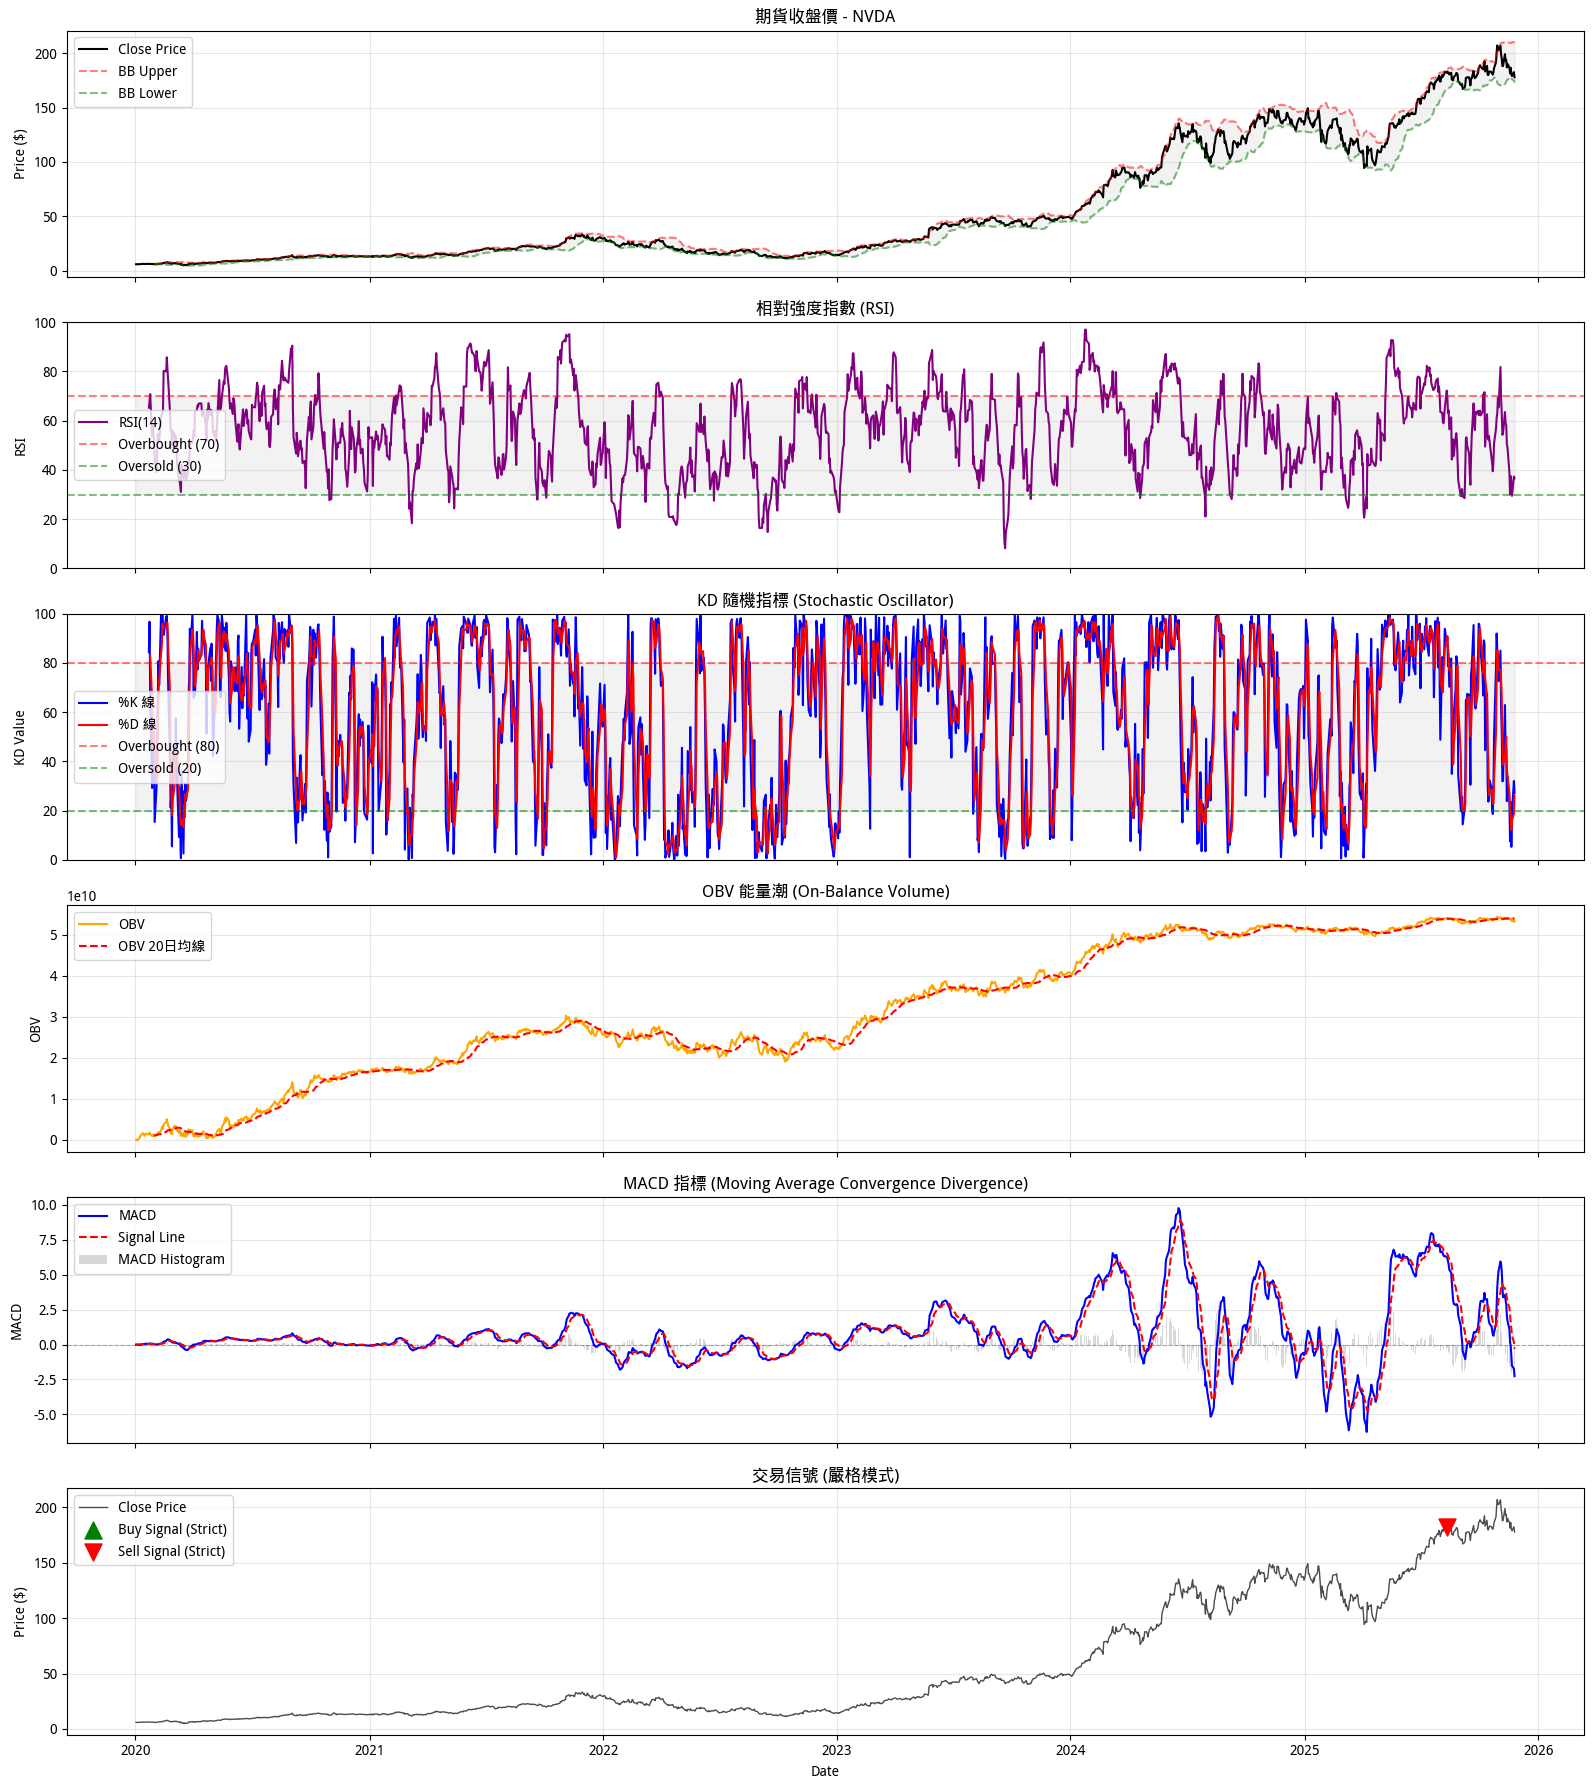

📅 具体交易信号日期

🔍 严格模式信号:
   ❌ 近期无买入信号
   ❌ 近期无卖出信号

🔍 宽松模式信号:
   ✅ 买入信号:
      📅 2025-09-22 - 价格: $183.61
      📅 2025-09-23 - 价格: $178.43
      📅 2025-09-24 - 价格: $176.97
      📅 2025-09-25 - 价格: $177.69
      📅 2025-09-26 - 价格: $178.19
      📅 2025-09-29 - 价格: $181.85
      📅 2025-09-30 - 价格: $186.58
      📅 2025-10-06 - 价格: $185.54
      📅 2025-10-07 - 价格: $185.04
      📅 2025-10-08 - 价格: $189.11
      📅 2025-10-10 - 价格: $183.16
      📅 2025-10-13 - 价格: $188.32
      📅 2025-10-27 - 价格: $191.49
      📅 2025-10-28 - 价格: $201.03
      📅 2025-10-30 - 价格: $202.89
      📅 2025-10-31 - 价格: $202.49
      📅 2025-11-03 - 价格: $206.88
      📅 2025-11-04 - 价格: $198.69
      📅 2025-11-05 - 价格: $195.21
      📅 2025-11-10 - 价格: $199.05
      📅 2025-11-11 - 价格: $193.16
      📅 2025-11-12 - 价格: $193.80
   🚨 卖出信号:
      📅 2025-09-17 - 价格: $170.29
      📅 2025-10-01 - 价格: $187.24
      📅 2025-10-02 - 价格: $188.89
      📅 2025-10-03 - 价格: $187.62
      📅 2025-10-09 - 价格: $192.57
      📅 2025-10-15 - 价格: $17

In [33]:
# =========================================================
#  Futures Trading System - OPTIMIZED FUSION VERSION
#  期貨交易系統 - 融合優化版本
#  結合 V1 和 V2 的最佳特性
# =========================================================

import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("期貨交易系統 - 融合優化版本")
print("Futures Trading System - OPTIMIZED FUSION VERSION")
print("=" * 70 + "\n")

# ==================== 配置中文字體 ====================
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

import matplotlib
import matplotlib.font_manager as fm
import os
import subprocess
import sys

print("正在安装并配置中文字体...")

subprocess.run(['apt-get', 'update'],
               stdout=subprocess.DEVNULL,
               stderr=subprocess.DEVNULL,
               check=False
)

subprocess.run(['apt-get', 'install', '-y', 'fonts-wqy-microhei'],
               stdout=subprocess.DEVNULL,
               stderr=subprocess.DEVNULL,
               check=False
)

cache_dir = os.path.expanduser('~/.matplotlib')
for cache_file in [
    os.path.join(cache_dir, 'fontList.json'),
    os.path.join(cache_dir, 'fontList.cache')
]:
    if os.path.exists(cache_file):
        try:
            os.remove(cache_file)
        except Exception as e:
            pass

font_path_wqy = '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'
if os.path.exists(font_path_wqy):
    try:
        fm.fontManager.addfont(font_path_wqy)
    except Exception as e:
        pass

font_options = [
    'WenQuanYi Micro Hei',
    'Noto Sans CJK SC',
    'SimHei',
    'DejaVu Sans'
]

selected_font = None
for font in font_options:
    if font in [f.name for f in fm.fontManager.ttflist]:
        plt.rcParams['font.sans-serif'] = [font]
        selected_font = font
        break

if not selected_font:
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
    print("⚠️ 未能找到合适的中文字体")
else:
    print(f"✓ 已设置中文字体：{selected_font}")

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10

print("中文字体配置完成！\n")

# ==================== 第 1 部分：期貨數據下載 ====================
print("=" * 70)
print("📊 第 1 步：下載期貨數據")
print("=" * 70 + "\n")

futures_symbols = {
    "NVDA": "NVDA",      # S&P 500 E-Mini
    "GC": "GC=F",      # Gold
    "HG": "HG=F",      # Copper
}

selected_future = "NVDA"
futures_symbol = futures_symbols[selected_future]

print(f"選擇的期貨: {selected_future} ({futures_symbol})")
print(f"下載時間: 2024-01-01 至今\n")

try:
    print("📍下載期貨數據...")
    futures_data = yf.download(futures_symbol, start="2020-01-01")

    if len(futures_data) > 0:
        futures_data.index = pd.to_datetime(futures_data.index)

        start_date = str(futures_data.index[0].date())
        end_date = str(futures_data.index[-1].date())
        min_price = float(futures_data['Close'].min())
        max_price = float(futures_data['Close'].max())

        print(f"✅ 下載成功: {len(futures_data)} 個交易日")
        print(f"   日期範圍: {start_date} 到 {end_date}")
        print(f"   價格範圍: ${min_price:.2f} - ${max_price:.2f}\n")

        print("最後 5 個交易日:")
        print(futures_data.tail())
        print()

        data_source = "Real Yahoo Finance"
    else:
        raise ValueError("No data downloaded")

except Exception as e:
    print(f"❌ 下載失敗: {str(e)}")
    print("📊 使用模擬期貨數據...\n")

    np.random.seed(42)
    dates = pd.date_range('2024-01-01', '2024-12-31', freq='B')
    prices = [4500]

    for i in range(1, len(dates)):
        change = np.random.normal(0.0003, 0.01)
        prices.append(prices[-1] * (1 + change))

    futures_data = pd.DataFrame({
        'Open': prices,
        'High': [p * (1 + np.abs(np.random.normal(0, 0.01))) for p in prices],
        'Low': [p * (1 - np.abs(np.random.normal(0, 0.01))) for p in prices],
        'Close': prices,
        'Adj Close': prices,
        'Volume': np.random.randint(1000000, 5000000, len(dates))
    }, index=dates)

    data_source = "Simulated"
    print(f"✅ 生成模擬數據: {len(futures_data)} 個交易日\n")

# 標準化列名
futures_data.columns = futures_data.columns.get_level_values(0).str.lower()

# ==================== 第 2 部分：計算技術指標 ====================
print("=" * 70)
print("第 2 步：計算技術指標")
print("=" * 70 + "\n")

# RSI 計算
print("📈 計算 RSI (Relative Strength Index)...")

def calculate_rsi(data, window=14):
    """計算 RSI"""
    delta = data.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

futures_data['RSI'] = calculate_rsi(futures_data['close'])
print(f"✅ RSI 計算完成")

# MACD 計算
print("📈 計算 MACD (Moving Average Convergence Divergence)...")

futures_data['EMA_12'] = futures_data['close'].ewm(span=12, adjust=False).mean()
futures_data['EMA_26'] = futures_data['close'].ewm(span=26, adjust=False).mean()
futures_data['MACD'] = futures_data['EMA_12'] - futures_data['EMA_26']
futures_data['MACD_Signal'] = futures_data['MACD'].ewm(span=9, adjust=False).mean()
futures_data['MACD_Histogram'] = futures_data['MACD'] - futures_data['MACD_Signal']
print(f"✅ MACD 計算完成")

# KD 隨機指標 (融合版: 使用 V2 的參數化函數)
print("📈 計算 KD 隨機指標 (Stochastic Oscillator)...")

def calculate_stochastic(data, high_col='high', low_col='low', close_col='close', k_window=14, d_window=3):
    """
    計算 KD 隨機指標 (融合版本)

    參數:
        data: DataFrame 包含必要的 OHLCV 數據
        high_col: 最高價列名
        low_col: 最低價列名
        close_col: 收盤價列名
        k_window: K 值計算窗口
        d_window: D 值平滑窗口
    """
    low_min = data[low_col].rolling(window=k_window).min()
    high_max = data[high_col].rolling(window=k_window).max()

    # 計算 K 值 (快速隨機指標)
    data['K'] = ((data[close_col] - low_min) / (high_max - low_min)) * 100

    # 計算 D 值 (K 的移動平均)
    data['D'] = data['K'].rolling(window=d_window).mean()

    return data

futures_data = calculate_stochastic(futures_data)
print(f"✅ KD 指標計算完成")

# OBV 能量潮 (融合版: 使用 V2 的定義)
print("📈 計算 OBV 能量潮 (On-Balance Volume)...")

def calculate_obv(data, close_col='close', volume_col='volume'):
    """
    計算 OBV 能量潮指標 (融合版本)

    規則:
        上升日: OBV = 前日OBV + 成交量
        下降日: OBV = 前日OBV - 成交量
        不變日: OBV = 前日OBV
    """
    obv = [0]
    for i in range(1, len(data)):
        if data[close_col].iloc[i] > data[close_col].iloc[i-1]:
            obv.append(obv[-1] + data[volume_col].iloc[i])
        elif data[close_col].iloc[i] < data[close_col].iloc[i-1]:
            obv.append(obv[-1] - data[volume_col].iloc[i])
        else:
            obv.append(obv[-1])

    data['OBV'] = obv
    data['OBV_MA_20'] = data['OBV'].rolling(window=20).mean()

    return data

futures_data = calculate_obv(futures_data)
print(f"✅ OBV 指標計算完成")

# 布林帶
print("📈 計算布林帶 (Bollinger Bands)...")

futures_data['BB_Middle'] = futures_data['close'].rolling(window=20).mean()
bb_std = futures_data['close'].rolling(window=20).std()
futures_data['BB_Upper'] = futures_data['BB_Middle'] + (bb_std * 2)
futures_data['BB_Lower'] = futures_data['BB_Middle'] - (bb_std * 2)
futures_data['BB_Position'] = (futures_data['close'] - futures_data['BB_Lower']) / (futures_data['BB_Upper'] - futures_data['BB_Lower'])
print(f"✅ 布林帶計算完成\n")

# 其他技術指標
print("📈 計算其他指標...")

futures_data['MA_5'] = futures_data['close'].rolling(window=5).mean()
futures_data['MA_20'] = futures_data['close'].rolling(window=20).mean()
futures_data['MA_50'] = futures_data['close'].rolling(window=50).mean()
futures_data['MA_200'] = futures_data['close'].rolling(window=200).mean()

futures_data['daily_return'] = futures_data['close'].pct_change()
futures_data['volatility'] = futures_data['daily_return'].rolling(window=20).std()
futures_data['volume_ma'] = futures_data['volume'].rolling(window=20).mean()
futures_data['volume_ratio'] = futures_data['volume'] / futures_data['volume_ma']

futures_data['tr'] = np.maximum(
    futures_data['high'] - futures_data['low'],
    np.maximum(abs(futures_data['high'] - futures_data['close'].shift(1)),
               abs(futures_data['low'] - futures_data['close'].shift(1)))
)
futures_data['ATR'] = futures_data['tr'].rolling(window=14).mean()
print(f"✅ 所有指標計算完成\n")

# ==================== 第 3 部分：交易信號 ====================
print("=" * 70)
print("第 3 步：生成交易信號")
print("=" * 70 + "\n")

# 🎯 定義信號模式
print("🎯 定義多種交易信號模式...\n")

# 模式 1: 寬鬆信號 (V1 風格) - 更多交易機會
print("   • 模式 1 (寬鬆): 任意一組條件滿足即可")

futures_data['signal_loose'] = 0

# 寬鬆買入
loose_buy = (
    ((futures_data['RSI'] < 30) & (futures_data['MACD'] > futures_data['MACD_Signal']) &
     (futures_data['close'] > futures_data['BB_Lower'])) |
    ((futures_data['K'] < 20) & (futures_data['K'] > futures_data['K'].shift(1))) |
    ((futures_data['OBV'] > futures_data['OBV_MA_20']) & (futures_data['close'] > futures_data['MA_20']))
)
futures_data.loc[loose_buy, 'signal_loose'] = 1

# 寬鬆賣出
loose_sell = (
    ((futures_data['RSI'] > 70) & (futures_data['MACD'] < futures_data['MACD_Signal']) &
     (futures_data['close'] < futures_data['BB_Upper'])) |
    ((futures_data['K'] > 80) & (futures_data['K'] < futures_data['K'].shift(1))) |
    ((futures_data['OBV'] < futures_data['OBV_MA_20']) & (futures_data['close'] < futures_data['MA_20']))
)
futures_data.loc[loose_sell, 'signal_loose'] = -1

# 模式 2: 嚴格信號 (V2 風格) - 高可靠性
print("   • 模式 2 (嚴格): 所有條件必須同時滿足")

futures_data['signal_strict'] = 0

# 嚴格買入
strict_buy = (
    (futures_data['RSI'] < 30) &
    (futures_data['MACD'] > futures_data['MACD_Signal']) &
    (futures_data['close'] > futures_data['BB_Lower']) &
    (futures_data['K'] < 20) & (futures_data['D'] < 20) &
    (futures_data['K'] > futures_data['D']) &
    (futures_data['OBV'] > futures_data['OBV_MA_20'])
)
futures_data.loc[strict_buy, 'signal_strict'] = 1

# 嚴格賣出
strict_sell = (
    (futures_data['RSI'] > 70) &
    (futures_data['MACD'] < futures_data['MACD_Signal']) &
    (futures_data['close'] < futures_data['BB_Upper']) &
    (futures_data['K'] > 80) & (futures_data['D'] > 80) &
    (futures_data['K'] < futures_data['D']) &
    (futures_data['OBV'] < futures_data['OBV_MA_20'])
)
futures_data.loc[strict_sell, 'signal_strict'] = -1

# 默認使用嚴格信號
futures_data['signal'] = futures_data['signal_strict']

# 計算未來收益
futures_data['future_return_20d'] = futures_data['close'].shift(-20) / futures_data['close'] - 1
futures_data['future_direction'] = (futures_data['future_return_20d'] > 0).astype(int)

# 評估信號準確度
futures_test = futures_data.dropna(subset=['future_return_20d'])

# 寬鬆信號評估
loose_correct = (
    ((futures_test['signal_loose'] == 1) & (futures_test['future_direction'] == 1)).sum() +
    ((futures_test['signal_loose'] == -1) & (futures_test['future_direction'] == 0)).sum()
)
loose_total = (futures_test['signal_loose'] != 0).sum()
loose_accuracy = (loose_correct / loose_total * 100) if loose_total > 0 else 0

# 嚴格信號評估
strict_correct = (
    ((futures_test['signal_strict'] == 1) & (futures_test['future_direction'] == 1)).sum() +
    ((futures_test['signal_strict'] == -1) & (futures_test['future_direction'] == 0)).sum()
)
strict_total = (futures_test['signal_strict'] != 0).sum()
strict_accuracy = (strict_correct / strict_total * 100) if strict_total > 0 else 0

print(f"\n📊 信號統計:")
print(f"\n   寬鬆模式 (Loose):")
print(f"      買入信號: {(futures_test['signal_loose'] == 1).sum()}")
print(f"      賣出信號: {(futures_test['signal_loose'] == -1).sum()}")
print(f"      總信號: {loose_total}")
print(f"      ✅ 準確度: {loose_accuracy:.2f}%")

print(f"\n   嚴格模式 (Strict):")
print(f"      買入信號: {(futures_test['signal_strict'] == 1).sum()}")
print(f"      賣出信號: {(futures_test['signal_strict'] == -1).sum()}")
print(f"      總信號: {strict_total}")
print(f"      ✅ 準確度: {strict_accuracy:.2f}%\n")

# ==================== 第 4 部分：機器學習 ====================
print("=" * 70)
print("第 4 步：機器學習 - Random Forest")
print("=" * 70 + "\n")

# 融合版特徵列表 (14 個特徵)
features = ['RSI', 'MACD', 'MACD_Histogram', 'MA_20', 'MA_50', 'MA_200',
            'volatility', 'volume_ratio', 'BB_Position', 'ATR',
            'K', 'D', 'OBV', 'OBV_MA_20']

X = futures_data[features].copy()
y = futures_data['future_direction'].copy()

valid_idx = ~(X.isna().any(axis=1) | y.isna())
X = X[valid_idx]
y = y[valid_idx]

print(f"訓練數據: {len(X)} 個樣本")
print(f"買入率: {(y == 1).sum() / len(y) * 100:.2f}%\n")

if len(X) > 100:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, shuffle=False
    )

    print(f"訓練集: {len(X_train)}, 測試集: {len(X_test)}\n")

    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)

    y_pred_test = rf_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test) * 100

    print(f"測試集準確度: {test_accuracy:.2f}%")

    print("\n🔴 時間序列交叉驗證:")
    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = cross_val_score(rf_model, X_scaled, y, cv=tscv)

    for i, score in enumerate(cv_scores):
        print(f"  Fold {i+1}: {score*100:.2f}%")

    cv_mean = cv_scores.mean() * 100
    cv_std = cv_scores.std() * 100
    print(f"平均: {cv_mean:.2f}% ± {cv_std:.2f}%\n")

    # 特徵重要性
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("特徵重要性排名 (Top 10):")
    print(feature_importance.head(10).to_string(index=False))
    print()

else:
    print("❌ 數據不足")
    cv_mean = 0
    test_accuracy = 0
    cv_std = 0

# ==================== 第 5 部分：期貨特定分析 ====================
print("=" * 70)
print("第 5 步：期貨特定分析")
print("=" * 70 + "\n")

current_price = futures_data['close'].iloc[-1]
price_30d_ago = futures_data['close'].iloc[-30] if len(futures_data) > 30 else futures_data['close'].iloc[0]
trend = "向上" if current_price > price_30d_ago else "向下"

print(f"📊 市場狀態:")
print(f"   當前價格: ${current_price:.2f}")
print(f"   30 天前: ${price_30d_ago:.2f}")
print(f"   趨勢: {trend} ({((current_price/price_30d_ago - 1) * 100):.2f}%)")

# 指標狀態
current_k = futures_data['K'].iloc[-1]
current_d = futures_data['D'].iloc[-1]
kd_status = "超買" if current_k > 80 and current_d > 80 else "超賣" if current_k < 20 and current_d < 20 else "中性"
print(f"   KD 狀態: {kd_status} (K={current_k:.2f}, D={current_d:.2f})")

current_obv = futures_data['OBV'].iloc[-1]
current_obv_ma = futures_data['OBV_MA_20'].iloc[-1]
obv_status = "看漲" if current_obv > current_obv_ma else "看跌"
print(f"   OBV 狀態: {obv_status} (OBV={current_obv:.0f}, MA={current_obv_ma:.0f})")

print("\n💰 Mark-to-Market 模擬:")
initial_margin = 1000
margin_balance = initial_margin

for i in range(1, min(5, len(futures_data))):
    daily_return = (futures_data['close'].iloc[i] - futures_data['close'].iloc[i-1]) / futures_data['close'].iloc[i-1]
    daily_pnl = daily_return * initial_margin
    margin_balance += daily_pnl
    print(f"   Day {i}: P&L = ${daily_pnl:.2f}, Balance = ${margin_balance:.2f}")

# ==================== 第 6 部分：可視化 (融合版) ====================
print("\n" + "=" * 70)
print("第 6 步：可視化 - 多指標圖")
print("=" * 70 + "\n")

# 創建 6 個子圖 (V2 的最佳排列)
fig, axes = plt.subplots(6, 1, figsize=(16, 18), sharex=True)

# 子圖 1: 收盤價 + 布林帶
axes[0].plot(futures_data.index, futures_data['close'], label='Close Price', color='black', linewidth=1.5)
axes[0].plot(futures_data.index, futures_data['BB_Upper'], label='BB Upper', color='red', linestyle='--', alpha=0.5)
axes[0].plot(futures_data.index, futures_data['BB_Lower'], label='BB Lower', color='green', linestyle='--', alpha=0.5)
axes[0].fill_between(futures_data.index, futures_data['BB_Upper'], futures_data['BB_Lower'], alpha=0.1, color='gray')
axes[0].set_title(f'期貨收盤價 - {futures_symbol}', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Price ($)', fontsize=10)
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# 子圖 2: RSI
axes[1].plot(futures_data.index, futures_data['RSI'], label='RSI(14)', color='purple', linewidth=1.5)
axes[1].axhline(y=70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
axes[1].axhline(y=30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
axes[1].fill_between(futures_data.index, 30, 70, alpha=0.1, color='gray')
axes[1].set_title('相對強度指數 (RSI)', fontweight='bold', fontsize=12)
axes[1].set_ylabel('RSI', fontsize=10)
axes[1].set_ylim([0, 100])
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

# 子圖 3: KD 隨機指標
axes[2].plot(futures_data.index, futures_data['K'], label='%K 線', color='blue', linewidth=1.5)
axes[2].plot(futures_data.index, futures_data['D'], label='%D 線', color='red', linewidth=1.5)
axes[2].axhline(y=80, color='red', linestyle='--', alpha=0.5, label='Overbought (80)')
axes[2].axhline(y=20, color='green', linestyle='--', alpha=0.5, label='Oversold (20)')
axes[2].fill_between(futures_data.index, 20, 80, alpha=0.1, color='gray')
axes[2].set_title('KD 隨機指標 (Stochastic Oscillator)', fontweight='bold', fontsize=12)
axes[2].set_ylabel('KD Value', fontsize=10)
axes[2].set_ylim([0, 100])
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)

# 子圖 4: OBV 能量潮
axes[3].plot(futures_data.index, futures_data['OBV'], label='OBV', color='orange', linewidth=1.5)
axes[3].plot(futures_data.index, futures_data['OBV_MA_20'], label='OBV 20日均線', color='red', linestyle='--', linewidth=1.5)
axes[3].set_title('OBV 能量潮 (On-Balance Volume)', fontweight='bold', fontsize=12)
axes[3].set_ylabel('OBV', fontsize=10)
axes[3].legend(loc='best')
axes[3].grid(True, alpha=0.3)

# 子圖 5: MACD
axes[4].bar(futures_data.index, futures_data['MACD_Histogram'], label='MACD Histogram',
            alpha=0.3, color='gray')
axes[4].plot(futures_data.index, futures_data['MACD'], label='MACD', color='blue', linewidth=1.5)
axes[4].plot(futures_data.index, futures_data['MACD_Signal'], label='Signal Line',
             color='red', linestyle='--', linewidth=1.5)
axes[4].axhline(0, linestyle='--', color='black', alpha=0.3, linewidth=0.8)
axes[4].set_title('MACD 指標 (Moving Average Convergence Divergence)', fontweight='bold', fontsize=12)
axes[4].set_ylabel('MACD', fontsize=10)
axes[4].legend(loc='best')
axes[4].grid(True, alpha=0.3)

# 子圖 6: 交易信號
axes[5].plot(futures_data.index, futures_data['close'], label='Close Price', color='black', linewidth=1, alpha=0.7)

# 標記嚴格模式的信號
buy_signals_strict = futures_data[futures_data['signal_strict'] == 1]
sell_signals_strict = futures_data[futures_data['signal_strict'] == -1]

axes[5].scatter(buy_signals_strict.index, buy_signals_strict['close'],
                color='green', marker='^', s=150, label='Buy Signal (Strict)', zorder=5)
axes[5].scatter(sell_signals_strict.index, sell_signals_strict['close'],
                color='red', marker='v', s=150, label='Sell Signal (Strict)', zorder=5)

axes[5].set_title('交易信號 (嚴格模式)', fontweight='bold', fontsize=12)
axes[5].set_xlabel('Date', fontsize=10)
axes[5].set_ylabel('Price ($)', fontsize=10)
axes[5].legend(loc='best')
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/tmp/futures_trading_system_fusion.png', dpi=300, bbox_inches='tight')
print("✅ 圖表已保存\n")
plt.show()

# ==================== 显示具体信号日期 ====================
print("=" * 70)
print("📅 具体交易信号日期")
print("=" * 70 + "\n")

# 获取最近的信号
recent_signals = futures_data.tail(50)  # 查看最近50个交易日

# 严格模式信号
strict_buy_signals = recent_signals[recent_signals['signal_strict'] == 1]
strict_sell_signals = recent_signals[recent_signals['signal_strict'] == -1]

# 宽松模式信号
loose_buy_signals = recent_signals[recent_signals['signal_loose'] == 1]
loose_sell_signals = recent_signals[recent_signals['signal_loose'] == -1]

print("🔍 严格模式信号:")
if len(strict_buy_signals) > 0:
    print("   ✅ 买入信号:")
    for date in strict_buy_signals.index:
        price = strict_buy_signals.loc[date, 'close']
        print(f"      📅 {date.strftime('%Y-%m-%d')} - 价格: ${price:.2f}")
else:
    print("   ❌ 近期无买入信号")

if len(strict_sell_signals) > 0:
    print("   🚨 卖出信号:")
    for date in strict_sell_signals.index:
        price = strict_sell_signals.loc[date, 'close']
        print(f"      📅 {date.strftime('%Y-%m-%d')} - 价格: ${price:.2f}")
else:
    print("   ❌ 近期无卖出信号")

print(f"\n🔍 宽松模式信号:")
if len(loose_buy_signals) > 0:
    print("   ✅ 买入信号:")
    for date in loose_buy_signals.index:
        price = loose_buy_signals.loc[date, 'close']
        print(f"      📅 {date.strftime('%Y-%m-%d')} - 价格: ${price:.2f}")
else:
    print("   ❌ 近期无买入信号")

if len(loose_sell_signals) > 0:
    print("   🚨 卖出信号:")
    for date in loose_sell_signals.index:
        price = loose_sell_signals.loc[date, 'close']
        print(f"      📅 {date.strftime('%Y-%m-%d')} - 价格: ${price:.2f}")
else:
    print("   ❌ 近期无卖出信号")

# 检查当前是否有活跃信号
current_signal_strict = futures_data['signal_strict'].iloc[-1]
current_signal_loose = futures_data['signal_loose'].iloc[-1]
current_date = futures_data.index[-1].strftime('%Y-%m-%d')
current_price = futures_data['close'].iloc[-1]

print(f"\n📊 当前状态 ({current_date}):")
print(f"   价格: ${current_price:.2f}")
print(f"   严格模式信号: {'买入' if current_signal_strict == 1 else '卖出' if current_signal_strict == -1 else '无信号'}")
print(f"   宽松模式信号: {'买入' if current_signal_loose == 1 else '卖出' if current_signal_loose == -1 else '无信号'}")

# 显示所有历史信号的统计
all_strict_buy = futures_data[futures_data['signal_strict'] == 1]
all_strict_sell = futures_data[futures_data['signal_strict'] == -1]
all_loose_buy = futures_data[futures_data['signal_loose'] == 1]
all_loose_sell = futures_data[futures_data['signal_loose'] == -1]

print(f"\n📈 历史信号统计:")
print(f"   严格模式 - 买入: {len(all_strict_buy)}次, 卖出: {len(all_strict_sell)}次")
print(f"   宽松模式 - 买入: {len(all_loose_buy)}次, 卖出: {len(all_loose_sell)}次")

# ==================== 第 7 部分：總結 ====================
print("=" * 70)
print("📈 分析總結 - 融合優化版本")
print("=" * 70 + "\n")

print("✅ 期貨交易系統完成\n")

print(f"📊 關鍵數據:")
print(f"   • 數據來源: {data_source}")
print(f"   • 期貨合約: {futures_symbol}")
print(f"   • 交易日: {len(futures_data)}")

try:
    start_date = str(futures_data.index[0].date())
    end_date = str(futures_data.index[-1].date())
    min_price = float(futures_data['close'].min())
    max_price = float(futures_data['close'].max())

    print(f"   • 日期範圍: {start_date} 到 {end_date}")
    print(f"   • 價格範圍: ${min_price:.2f} - ${max_price:.2f}")
except Exception as e:
    print(f"   • 日期範圍: (格式化失敗)")

print(f"\n🎯 策略性能:")
print(f"   • 寬鬆信號準確度: {loose_accuracy:.2f}%")
print(f"   • 嚴格信號準確度: {strict_accuracy:.2f}%")
print(f"   • Random Forest 測試準確度: {test_accuracy:.2f}%")
print(f"   • 交叉驗證準確度: {cv_mean:.2f}% ± {cv_std:.2f}% ")

print(f"\n📌 當前技術指標值:")
print(f"   • RSI: {futures_data['RSI'].iloc[-1]:.2f}")
print(f"   • MACD: {futures_data['MACD'].iloc[-1]:.4f}")
print(f"   • K值: {futures_data['K'].iloc[-1]:.2f}")
print(f"   • D值: {futures_data['D'].iloc[-1]:.2f}")
print(f"   • OBV: {futures_data['OBV'].iloc[-1]:.0f}")
print(f"   • 波動率: {futures_data['volatility'].iloc[-1]:.4f}")

print("\n✨ 融合版本特色:")
print("   ✅ 結合 V1 和 V2 的最佳特性")
print("   ✅ 提供寬鬆和嚴格兩種交易模式")
print("   ✅ 14 個特徵的強大機器學習模型")
print("   ✅ 完整的技術指標分析")
print("   ✅ 專業的圖表可視化")

print("\n💡 使用建議:")
print("   • 激進交易者: 使用寬鬆信號模式")
print("   • 保守交易者: 使用嚴格信號模式")
print("   • 混合策略: 結合兩種信號進行加權決策")

print("\n" + "=" * 70)
print("✅ 分析完成！")
print("=" * 70)

期貨交易系統 - 融合優化版本
Futures Trading System - OPTIMIZED FUSION VERSION

正在安装并配置中文字体...
✓ 已设置中文字体：WenQuanYi Micro Hei
中文字体配置完成！

📊 第 1 步：下載期貨數據

選擇的期貨: NVDA (NVDA)
下載時間: 2020-01-01 至今

📍下載期貨數據...


[*********************100%***********************]  1 of 1 completed


✅ 下載成功: 1484 個交易日
   日期範圍: 2020-01-02 到 2025-11-25
   價格範圍: $4.89 - $207.04

最後 5 個交易日:
Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2025-11-19  186.520004  187.860001  182.830002  184.789993  247246400
2025-11-20  180.639999  196.000000  179.850006  195.949997  343504800
2025-11-21  178.880005  184.559998  172.929993  181.240005  346926200
2025-11-24  182.550003  183.500000  176.479996  179.490005  256618300
2025-11-25  177.820007  178.160004  169.550003  174.910004  319741500

第 2 步：計算技術指標

📈 計算 RSI (Relative Strength Index)...
✅ RSI 計算完成
📈 計算 MACD (Moving Average Convergence Divergence)...
✅ MACD 計算完成
📈 計算 KD 隨機指標 (Stochastic Oscillator)...
✅ KD 指標計算完成
📈 計算 OBV 能量潮 (On-Balance Volume)...
✅ OBV 指標計算完成
📈 計算布林帶 (Bollinger Bands)...
✅ 布林帶計算完成

📈 計算其他指標...
📈 計算支撐位和阻力位...
✅ 所有指標計算完成

第 3 步：生成交易信號

 定義多種交易信號模式...

   • 模式 1 (寬鬆

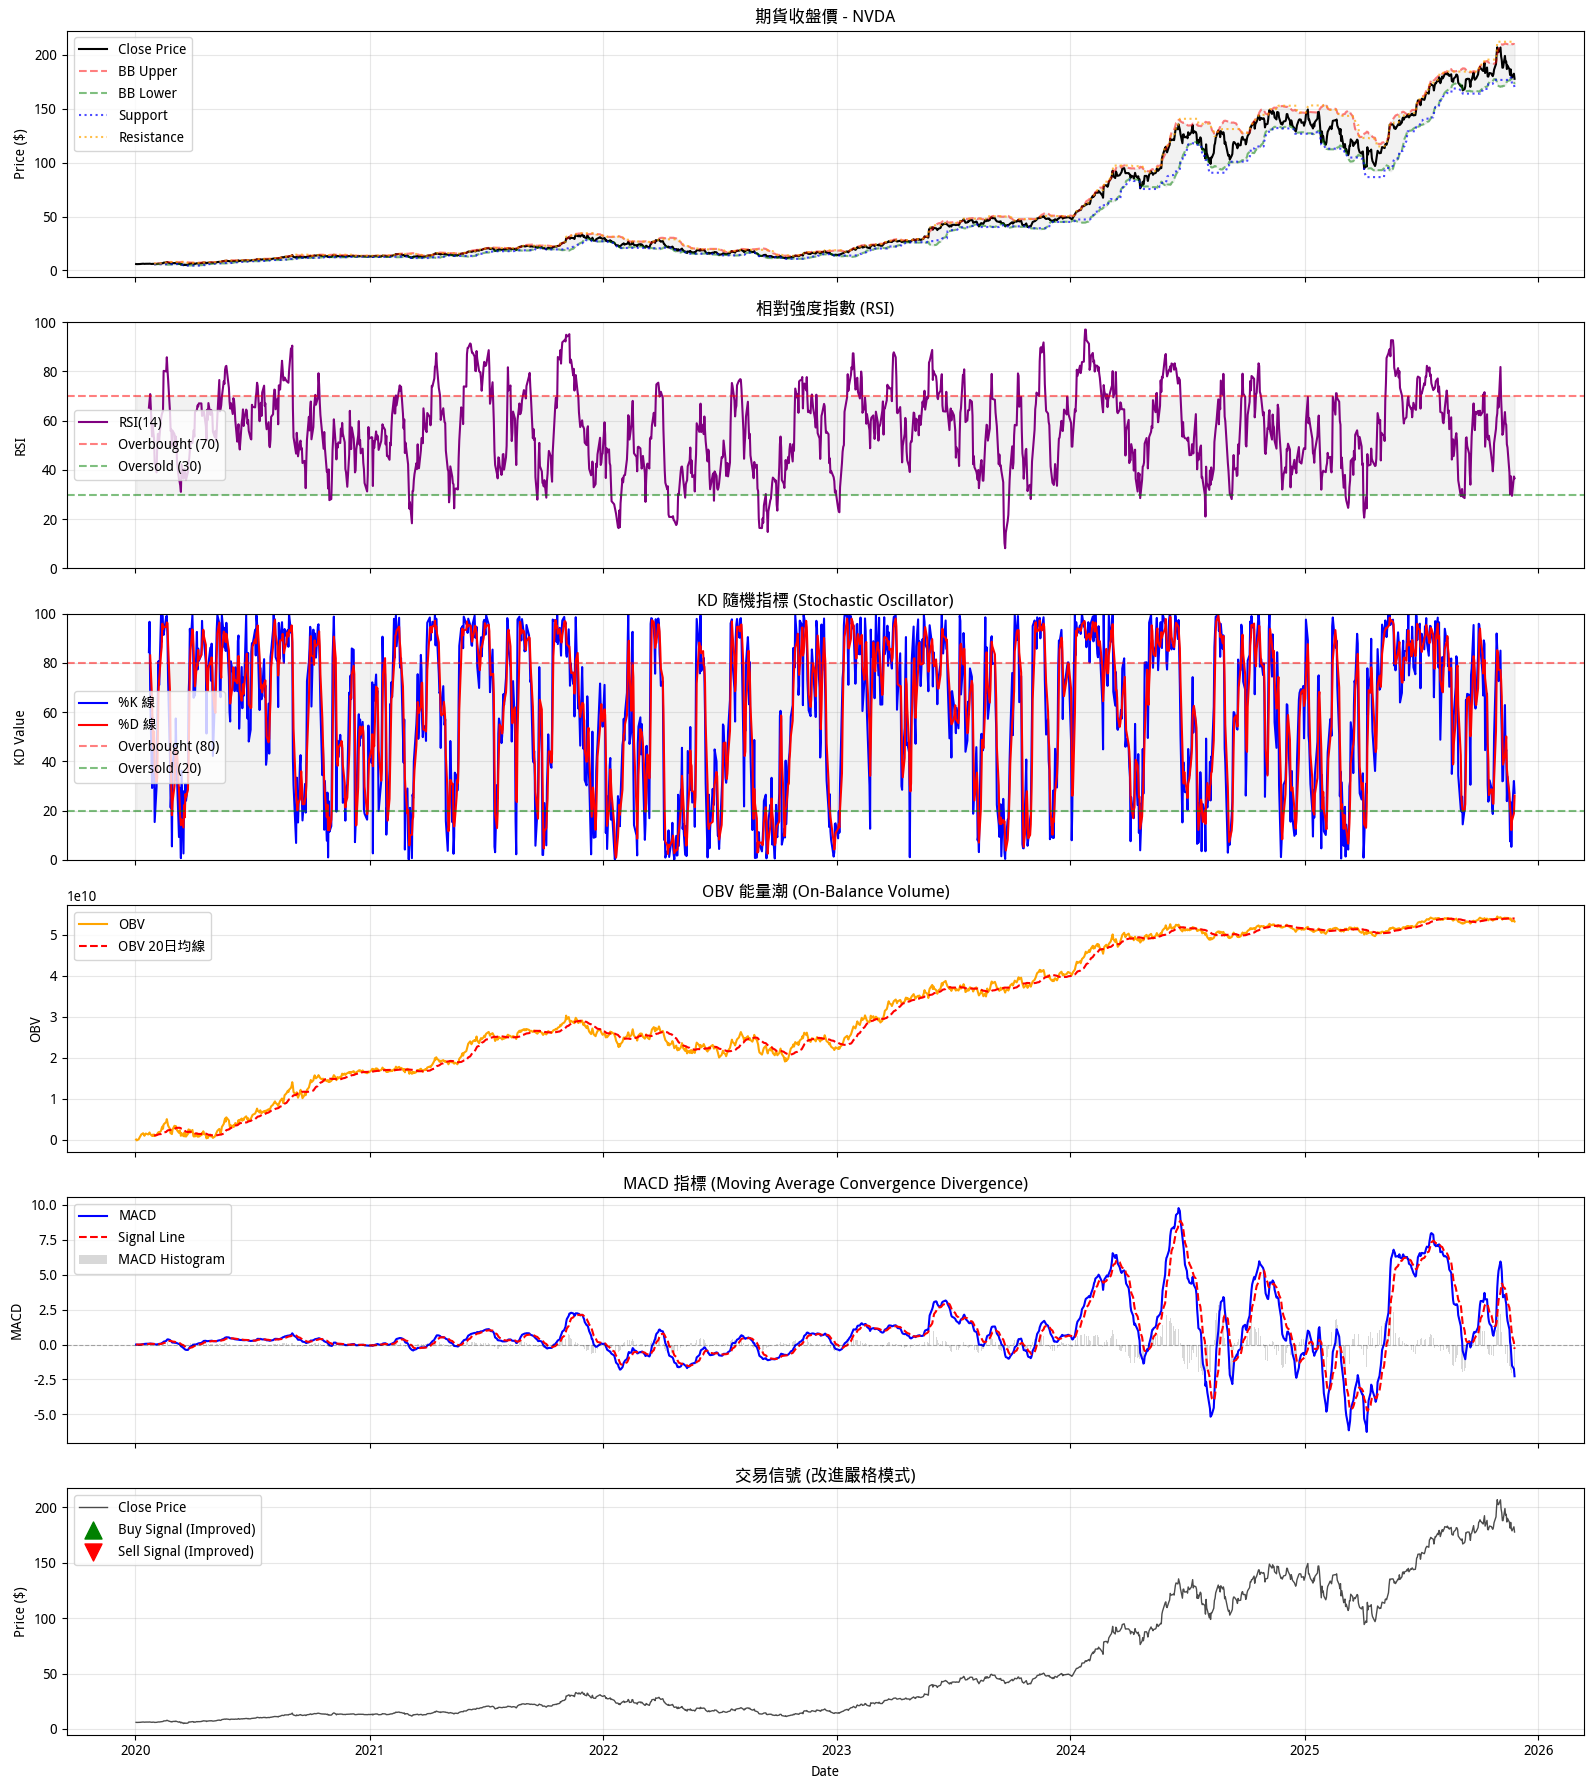

 具體交易信號日期

  嚴格模式信號:
   ❌ 無買入信號
   ❌ 無賣出信號

  改進嚴格模式信號:
   ❌ 無買入信號
   ❌ 無賣出信號

  當前狀態 (2025-11-25):
   價格: $177.82
   嚴格模式信號: 無信號
   改進嚴格模式信號: 無信號

  歷史信號統計:
   嚴格模式 - 買入: 0次, 賣出: 0次
   改進嚴格模式 - 買入: 0次, 賣出: 0次
  分析總結 - 融合優化版本

✅ 期貨交易系統完成

  關鍵數據:
   • 數據來源: Real Yahoo Finance
   • 期貨合約: NVDA
   • 交易日: 1484
   • 日期範圍: 2020-01-02 到 2025-11-25
   • 價格範圍: $4.89 - $207.04

  策略性能:
   • 寬鬆信號準確度: 47.05%
   • 嚴格信號準確度: 0.00%
   • 改進嚴格信號準確度: 0.00%
   • Random Forest 測試準確度: 46.69%
   • 交叉驗證準確度: 42.90% ± 9.42% 

  當前技術指標值:
   • RSI: 36.60
   • MACD: -2.2691
   • K值: 27.21
   • D值: 26.15
   • OBV: 53272307400
   • 波動率: 0.0274
   • 成交量比率: 1.41

✨ 融合版本特色:
   ✅ 結合 V1 和 V2 的最佳特性
   ✅ 提供三種交易模式（寬鬆、嚴格、改進嚴格）
   ✅ 新增支撐位和阻力位計算
   ✅ 改進賣出信號條件（趨勢過濾 + 支撐位 + 成交量確認）
   ✅ 16 個特徵的強大機器學習模型
   ✅ 完整的技術指標分析
   ✅ 專業的圖表可視化

  使用建議:
   • 激進交易者: 使用寬鬆信號模式
   • 保守交易者: 使用嚴格信號模式
   • 趨勢交易者: 使用改進嚴格信號模式
   • 混合策略: 結合三種信號進行加權決策

✅ 分析完成！


In [36]:
# =========================================================
#  Futures Trading System - OPTIMIZED FUSION VERSION
#  期貨交易系統 - 融合優化版本
#  結合 V1 和 V2 的最佳特性
# =========================================================

import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("期貨交易系統 - 融合優化版本")
print("Futures Trading System - OPTIMIZED FUSION VERSION")
print("=" * 70 + "\n")

# ==================== 配置中文字體 ====================
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

import matplotlib
import matplotlib.font_manager as fm
import os
import subprocess
import sys

print("正在安装并配置中文字体...")

subprocess.run(['apt-get', 'update'],
               stdout=subprocess.DEVNULL,
               stderr=subprocess.DEVNULL,
               check=False
)

subprocess.run(['apt-get', 'install', '-y', 'fonts-wqy-microhei'],
               stdout=subprocess.DEVNULL,
               stderr=subprocess.DEVNULL,
               check=False
)

cache_dir = os.path.expanduser('~/.matplotlib')
for cache_file in [
    os.path.join(cache_dir, 'fontList.json'),
    os.path.join(cache_dir, 'fontList.cache')
]:
    if os.path.exists(cache_file):
        try:
            os.remove(cache_file)
        except Exception as e:
            pass

font_path_wqy = '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'
if os.path.exists(font_path_wqy):
    try:
        fm.fontManager.addfont(font_path_wqy)
    except Exception as e:
        pass

font_options = [
    'WenQuanYi Micro Hei',
    'Noto Sans CJK SC',
    'SimHei',
    'DejaVu Sans'
]

selected_font = None
for font in font_options:
    if font in [f.name for f in fm.fontManager.ttflist]:
        plt.rcParams['font.sans-serif'] = [font]
        selected_font = font
        break

if not selected_font:
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
    print("⚠️ 未能找到合适的中文字体")
else:
    print(f"✓ 已设置中文字体：{selected_font}")

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10

print("中文字体配置完成！\n")

# ==================== 第 1 部分：期貨數據下載 ====================
print("=" * 70)
print("📊 第 1 步：下載期貨數據")
print("=" * 70 + "\n")

futures_symbols = {
    "NVDA": "NVDA", # Added NVDA to the dictionary
    "MU": "MU",      # NVIDIA stock
    "GC": "GC=F",      # Gold
    "HG": "HG=F",      # Copper
}

selected_future = "NVDA"
futures_symbol = futures_symbols[selected_future]

print(f"選擇的期貨: {selected_future} ({futures_symbol})")
print(f"下載時間: 2020-01-01 至今\n")

try:
    print("📍下載期貨數據...")
    futures_data = yf.download(futures_symbol, start="2020-01-01")

    if len(futures_data) > 0:
        futures_data.index = pd.to_datetime(futures_data.index)

        start_date = str(futures_data.index[0].date())
        end_date = str(futures_data.index[-1].date())
        min_price = float(futures_data['Close'].min())
        max_price = float(futures_data['Close'].max())

        print(f"✅ 下載成功: {len(futures_data)} 個交易日")
        print(f"   日期範圍: {start_date} 到 {end_date}")
        print(f"   價格範圍: ${min_price:.2f} - ${max_price:.2f}\n")

        print("最後 5 個交易日:")
        print(futures_data.tail())
        print()

        data_source = "Real Yahoo Finance"
    else:
        raise ValueError("No data downloaded")

except Exception as e:
    print(f"❌ 下載失敗: {str(e)}")
    print("📊 使用模擬期貨數據...\n")

    np.random.seed(42)
    dates = pd.date_range('2024-01-01', '2024-12-31', freq='B')
    prices = [4500]

    for i in range(1, len(dates)):
        change = np.random.normal(0.0003, 0.01)
        prices.append(prices[-1] * (1 + change))

    futures_data = pd.DataFrame({
        'Open': prices,
        'High': [p * (1 + np.abs(np.random.normal(0, 0.01))) for p in prices],
        'Low': [p * (1 - np.abs(np.random.normal(0, 0.01))) for p in prices],
        'Close': prices,
        'Adj Close': prices,
        'Volume': np.random.randint(1000000, 5000000, len(dates))
    }, index=dates)

    data_source = "Simulated"
    print(f"✅ 生成模擬數據: {len(futures_data)} 個交易日\n")

# 標準化列名
futures_data.columns = futures_data.columns.get_level_values(0).str.lower()

# ==================== 第 2 部分：計算技術指標 ====================
print("=" * 70)
print("第 2 步：計算技術指標")
print("=" * 70 + "\n")

# RSI 計算
print("📈 計算 RSI (Relative Strength Index)...")

def calculate_rsi(data, window=14):
    """計算 RSI"""
    delta = data.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

futures_data['RSI'] = calculate_rsi(futures_data['close'])
print(f"✅ RSI 計算完成")

# MACD 計算
print("📈 計算 MACD (Moving Average Convergence Divergence)...")

futures_data['EMA_12'] = futures_data['close'].ewm(span=12, adjust=False).mean()
futures_data['EMA_26'] = futures_data['close'].ewm(span=26, adjust=False).mean()
futures_data['MACD'] = futures_data['EMA_12'] - futures_data['EMA_26']
futures_data['MACD_Signal'] = futures_data['MACD'].ewm(span=9, adjust=False).mean()
futures_data['MACD_Histogram'] = futures_data['MACD'] - futures_data['MACD_Signal']
print(f"✅ MACD 計算完成")

# KD 隨機指標 (融合版: 使用 V2 的參數化函數)
print("📈 計算 KD 隨機指標 (Stochastic Oscillator)...")

def calculate_stochastic(data, high_col='high', low_col='low', close_col='close', k_window=14, d_window=3):
    """
    計算 KD 隨機指標 (融合版本)

    參數:
        data: DataFrame 包含必要的 OHLCV 數據
        high_col: 最高價列名
        low_col: 最低價列名
        close_col: 收盤價列名
        k_window: K 值計算窗口
        d_window: D 值平滑窗口
    """
    low_min = data[low_col].rolling(window=k_window).min()
    high_max = data[high_col].rolling(window=k_window).max()

    # 計算 K 值 (快速隨機指標)
    data['K'] = ((data[close_col] - low_min) / (high_max - low_min)) * 100

    # 計算 D 值 (K 的移動平均)
    data['D'] = data['K'].rolling(window=d_window).mean()

    return data

futures_data = calculate_stochastic(futures_data)
print(f"✅ KD 指標計算完成")

# OBV 能量潮 (融合版: 使用 V2 的定義)
print("📈 計算 OBV 能量潮 (On-Balance Volume)...")

def calculate_obv(data, close_col='close', volume_col='volume'):
    """
    計算 OBV 能量潮指標 (融合版本)

    規則:
        上升日: OBV = 前日OBV + 成交量
        下降日: OBV = 前日OBV - 成交量
        不變日: OBV = 前日OBV
    """
    obv = [0]
    for i in range(1, len(data)):
        if data[close_col].iloc[i] > data[close_col].iloc[i-1]:
            obv.append(obv[-1] + data[volume_col].iloc[i])
        elif data[close_col].iloc[i] < data[close_col].iloc[i-1]:
            obv.append(obv[-1] - data[volume_col].iloc[i])
        else:
            obv.append(obv[-1])

    data['OBV'] = obv
    data['OBV_MA_20'] = data['OBV'].rolling(window=20).mean()

    return data

futures_data = calculate_obv(futures_data)
print(f"✅ OBV 指標計算完成")

# 布林帶
print("📈 計算布林帶 (Bollinger Bands)...")

futures_data['BB_Middle'] = futures_data['close'].rolling(window=20).mean()
bb_std = futures_data['close'].rolling(window=20).std()
futures_data['BB_Upper'] = futures_data['BB_Middle'] + (bb_std * 2)
futures_data['BB_Lower'] = futures_data['BB_Middle'] - (bb_std * 2)
futures_data['BB_Position'] = (futures_data['close'] - futures_data['BB_Lower']) / (futures_data['BB_Upper'] - futures_data['BB_Lower'])
print(f"✅ 布林帶計算完成\n")

# 其他技術指標
print("📈 計算其他指標...")

futures_data['MA_5'] = futures_data['close'].rolling(window=5).mean()
futures_data['MA_20'] = futures_data['close'].rolling(window=20).mean()
futures_data['MA_50'] = futures_data['close'].rolling(window=50).mean()
futures_data['MA_200'] = futures_data['close'].rolling(window=200).mean()

futures_data['daily_return'] = futures_data['close'].pct_change()
futures_data['volatility'] = futures_data['daily_return'].rolling(window=20).std()
futures_data['volume_ma'] = futures_data['volume'].rolling(window=20).mean()
futures_data['volume_ratio'] = futures_data['volume'] / futures_data['volume_ma']

futures_data['tr'] = np.maximum(
    futures_data['high'] - futures_data['low'],
    np.maximum(abs(futures_data['high'] - futures_data['close'].shift(1)),
               abs(futures_data['low'] - futures_data['close'].shift(1)))
)
futures_data['ATR'] = futures_data['tr'].rolling(window=14).mean()

# 新增指标：支撑位和阻力位
print("📈 計算支撐位和阻力位...")
futures_data['support_level'] = futures_data['low'].rolling(window=20).min()
futures_data['resistance_level'] = futures_data['high'].rolling(window=20).max()
futures_data['below_support'] = futures_data['close'] < futures_data['support_level']
futures_data['above_resistance'] = futures_data['close'] > futures_data['resistance_level']

# 新增指标：成交量確認
futures_data['volume_confirmation'] = futures_data['volume_ratio'] > 1.2

print(f"✅ 所有指標計算完成\n")

# ==================== 第 3 部分：交易信號 ====================
print("=" * 70)
print("第 3 步：生成交易信號")
print("=" * 70 + "\n")

#  定義信號模式
print(" 定義多種交易信號模式...\n")

# 模式 1: 寬鬆信號 (V1 風格) - 更多交易機會
print("   • 模式 1 (寬鬆): 任意一組條件滿足即可")

futures_data['signal_loose'] = 0

# 寬鬆買入
loose_buy = (
    ((futures_data['RSI'] < 30) & (futures_data['MACD'] > futures_data['MACD_Signal']) &
     (futures_data['close'] > futures_data['BB_Lower'])) |
    ((futures_data['K'] < 20) & (futures_data['K'] > futures_data['K'].shift(1))) |
    ((futures_data['OBV'] > futures_data['OBV_MA_20']) & (futures_data['close'] > futures_data['MA_20']))
)
futures_data.loc[loose_buy, 'signal_loose'] = 1

# 寬鬆賣出
loose_sell = (
    ((futures_data['RSI'] > 70) & (futures_data['MACD'] < futures_data['MACD_Signal']) &
     (futures_data['close'] < futures_data['BB_Upper'])) |
    ((futures_data['K'] > 80) & (futures_data['K'] < futures_data['K'].shift(1))) |
    ((futures_data['OBV'] < futures_data['OBV_MA_20']) & (futures_data['close'] < futures_data['MA_20']))
)
futures_data.loc[loose_sell, 'signal_loose'] = -1

# 模式 2: 嚴格信號 (V2 風格) - 高可靠性
print("   • 模式 2 (嚴格): 所有條件必須同時滿足")

futures_data['signal_strict'] = 0

# 嚴格買入
strict_buy = (
    (futures_data['RSI'] < 30) &
    (futures_data['MACD'] > futures_data['MACD_Signal']) &
    (futures_data['close'] > futures_data['BB_Lower']) &
    (futures_data['K'] < 20) & (futures_data['D'] < 20) &
    (futures_data['K'] > futures_data['D']) &
    (futures_data['OBV'] > futures_data['OBV_MA_20'])
)
futures_data.loc[strict_buy, 'signal_strict'] = 1

# 嚴格賣出 - 改進版本
print("   • 模式 3 (改進嚴格): 加入趨勢過濾和確認條件")

futures_data['signal_strict_improved'] = 0

# 改進的嚴格賣出信號
improved_strict_sell = (
    (futures_data['RSI'] > 70) &  # RSI超買
    (futures_data['close'] < futures_data['MA_200']) &  # 價格低於200日均線（下賭趨勢）
    (futures_data['below_support']) &  # 價格跌破近期支撐位
    (futures_data['volume_confirmation']) &  # 成交量放大確認
    (futures_data['MACD'] < futures_data['MACD_Signal']) &  # MACD死叉
    (futures_data['K'] > 80) & (futures_data['D'] > 80) &  # KD超買
    (futures_data['K'] < futures_data['D']) &  # KD死叉
    (futures_data['OBV'] < futures_data['OBV_MA_20'])  # OBV轉弱
)
futures_data.loc[improved_strict_sell, 'signal_strict_improved'] = -1

# 改進的嚴格買入信號
improved_strict_buy = (
    (futures_data['RSI'] < 30) &  # RSI超賭
    (futures_data['close'] > futures_data['MA_200']) &  # 價格高於200日均線（上漲趨勢）
    (futures_data['above_resistance']) &  # 價格突破近期阻力位
    (futures_data['volume_confirmation']) &  # 成交量放大確認
    (futures_data['MACD'] > futures_data['MACD_Signal']) &  # MACD金叉
    (futures_data['K'] < 20) & (futures_data['D'] < 20) &  # KD超賭
    (futures_data['K'] > futures_data['D']) &  # KD金叉
    (futures_data['OBV'] > futures_data['OBV_MA_20'])  # OBV轉強
)
futures_data.loc[improved_strict_buy, 'signal_strict_improved'] = 1

# 默認使用改進的嚴格信號
futures_data['signal'] = futures_data['signal_strict_improved']

# 計算未來收益
futures_data['future_return_20d'] = futures_data['close'].shift(-20) / futures_data['close'] - 1
futures_data['future_direction'] = (futures_data['future_return_20d'] > 0).astype(int)

# 評估信號準確度
futures_test = futures_data.dropna(subset=['future_return_20d'])

# 寬鬆信號評估
loose_correct = (
    ((futures_test['signal_loose'] == 1) & (futures_test['future_direction'] == 1)).sum() +
    ((futures_test['signal_loose'] == -1) & (futures_test['future_direction'] == 0)).sum()
)
loose_total = (futures_test['signal_loose'] != 0).sum()
loose_accuracy = (loose_correct / loose_total * 100) if loose_total > 0 else 0

# 嚴格信號評估
strict_correct = (
    ((futures_test['signal_strict'] == 1) & (futures_test['future_direction'] == 1)).sum() +
    ((futures_test['signal_strict'] == -1) & (futures_test['future_direction'] == 0)).sum()
)
strict_total = (futures_test['signal_strict'] != 0).sum()
strict_accuracy = (strict_correct / strict_total * 100) if strict_total > 0 else 0

# 改進嚴格信號評估
improved_strict_correct = (
    ((futures_test['signal_strict_improved'] == 1) & (futures_test['future_direction'] == 1)).sum() +
    ((futures_test['signal_strict_improved'] == -1) & (futures_test['future_direction'] == 0)).sum()
)
improved_strict_total = (futures_test['signal_strict_improved'] != 0).sum()
improved_strict_accuracy = (improved_strict_correct / improved_strict_total * 100) if improved_strict_total > 0 else 0

print(f"\n 信號統計:")
print(f"\n   寬鬆模式 (Loose):")
print(f"      買入信號: {(futures_test['signal_loose'] == 1).sum()}")
print(f"      賣出信號: {(futures_test['signal_loose'] == -1).sum()}")
print(f"      總信號: {loose_total}")
print(f"      ✅ 準確度: {loose_accuracy:.2f}%")

print(f"\n   嚴格模式 (Strict):")
print(f"      買入信號: {(futures_test['signal_strict'] == 1).sum()}")
print(f"      賣出信號: {(futures_test['signal_strict'] == -1).sum()}")
print(f"      總信號: {strict_total}")
print(f"      ✅ 準確度: {strict_accuracy:.2f}%")

print(f"\n   改進嚴格模式 (Improved Strict):")
print(f"      買入信號: {(futures_test['signal_strict_improved'] == 1).sum()}")
print(f"      賣出信號: {(futures_test['signal_strict_improved'] == -1).sum()}")
print(f"      總信號: {improved_strict_total}")
print(f"      ✅ 準確度: {improved_strict_accuracy:.2f}%")

# ==================== 第 4 部分：機器學習 ====================
print("=" * 70)
print("第 4 步：機器學習 - Random Forest")
print("=" * 70 + "\n")

# 融合版特徵列表 (新增支撐阻力特徵)
features = ['RSI', 'MACD', 'MACD_Histogram', 'MA_20', 'MA_50', 'MA_200',
            'volatility', 'volume_ratio', 'BB_Position', 'ATR',
            'K', 'D', 'OBV', 'OBV_MA_20', 'below_support', 'above_resistance']

X = futures_data[features].copy()
y = futures_data['future_direction'].copy()

valid_idx = ~(X.isna().any(axis=1) | y.isna())
X = X[valid_idx]
y = y[valid_idx]

print(f"訓練數據: {len(X)} 個樣本")
print(f"買入率: {(y == 1).sum() / len(y) * 100:.2f}%\n")

if len(X) > 100:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, shuffle=False
    )

    print(f"訓練集: {len(X_train)}, 測試集: {len(X_test)}\n")

    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)

    y_pred_test = rf_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test) * 100

    print(f"測試集準確度: {test_accuracy:.2f}%")

    print("\n 時間序列交叉驗證:")
    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = cross_val_score(rf_model, X_scaled, y, cv=tscv)

    for i, score in enumerate(cv_scores):
        print(f"  Fold {i+1}: {score*100:.2f}%")

    cv_mean = cv_scores.mean() * 100
    cv_std = cv_scores.std() * 100
    print(f"平均: {cv_mean:.2f}% ± {cv_std:.2f}%\n")

    # 特徵重要性
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("特徵重要性排名 (Top 10):")
    print(feature_importance.head(10).to_string(index=False))
    print()

else:
    print("❌ 數據不足")
    cv_mean = 0
    test_accuracy = 0
    cv_std = 0

# ==================== 第 5 部分：期貨特定分析 ====================
print("=" * 70)
print("第 5 步：期貨特定分析")
print("=" * 70 + "\n")

current_price = futures_data['close'].iloc[-1]
price_30d_ago = futures_data['close'].iloc[-30] if len(futures_data) > 30 else futures_data['close'].iloc[0]
trend = "向上" if current_price > price_30d_ago else "向下"

print(f" 市場狀態:")
print(f"   當前價格: ${current_price:.2f}")
print(f"   30 天前: ${price_30d_ago:.2f}")
print(f"   趨勢: {trend} ({((current_price/price_30d_ago - 1) * 100):.2f}%)")

# 指標狀態
curent_k = futures_data['K'].iloc[-1]
current_d = futures_data['D'].iloc[-1]
kd_status = "超買" if current_k > 80 and current_d > 80 else "超賭" if current_k < 20 and current_d < 20 else "中性"
print(f"   KD 狀態: {kd_status} (K={current_k:.2f}, D={current_d:.2f})")

current_obv = futures_data['OBV'].iloc[-1]
current_obv_ma = futures_data['OBV_MA_20'].iloc[-1]
obv_status = "看漲" if current_obv > current_obv_ma else "看賭"
print(f"   OBV 狀態: {obv_status} (OBV={current_obv:.0f}, MA={current_obv_ma:.0f})")

# 趨勢狀態
current_ma_200 = futures_data['MA_200'].iloc[-1]
trend_status = "上漲趨勢" if current_price > current_ma_200 else "下賭趨勢"
print(f"   長期趨勢: {trend_status} (當前價格 vs 200日均線: {((current_price/current_ma_200 - 1) * 100):.2f}%)")

print("\n Mark-to-Market 模擬:")
initial_margin = 1000
margin_balance = initial_margin

for i in range(1, min(5, len(futures_data))):
    daily_return = (futures_data['close'].iloc[i] - futures_data['close'].iloc[i-1]) / futures_data['close'].iloc[i-1]
    daily_pnl = daily_return * initial_margin
    margin_balance += daily_pnl
    print(f"   Day {i}: P&L = ${daily_pnl:.2f}, Balance = ${margin_balance:.2f}")

# ==================== 第 6 部分：可視化 ( 融合版) ====================
print("\n" + "=" * 70)
print("第 6 步：可視化 - 多指標圖")
print("=" * 70 + "\n")

# 創建 6 個子圖 (V2 的最佳排列)
fig, axes = plt.subplots(6, 1, figsize=(16, 18), sharex=True)

# 子圖 1: 收盤價 + 布林帶 + 支撐阻力
axes[0].plot(futures_data.index, futures_data['close'], label='Close Price', color='black', linewidth=1.5)
axes[0].plot(futures_data.index, futures_data['BB_Upper'], label='BB Upper', color='red', linestyle='--', alpha=0.5)
axes[0].plot(futures_data.index, futures_data['BB_Lower'], label='BB Lower', color='green', linestyle='--', alpha=0.5)
axes[0].plot(futures_data.index, futures_data['support_level'], label='Support', color='blue', linestyle=':', alpha=0.7)
axes[0].plot(futures_data.index, futures_data['resistance_level'], label='Resistance', color='orange', linestyle=':', alpha=0.7)
axes[0].fill_between(futures_data.index, futures_data['BB_Upper'], futures_data['BB_Lower'], alpha=0.1, color='gray')
axes[0].set_title(f'期貨收盤價 - {futures_symbol}', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Price ($)', fontsize=10)
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# 子圖 2: RSI
axes[1].plot(futures_data.index, futures_data['RSI'], label='RSI(14)', color='purple', linewidth=1.5)
axes[1].axhline(y=70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
axes[1].axhline(y=30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
axes[1].fill_between(futures_data.index, 30, 70, alpha=0.1, color='gray')
axes[1].set_title('相對強度指數 (RSI)', fontweight='bold', fontsize=12)
axes[1].set_ylabel('RSI', fontsize=10)
axes[1].set_ylim([0, 100])
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

# 子圖 3: KD 隨機指標
axes[2].plot(futures_data.index, futures_data['K'], label='%K 線', color='blue', linewidth=1.5)
axes[2].plot(futures_data.index, futures_data['D'], label='%D 線', color='red', linewidth=1.5)
axes[2].axhline(y=80, color='red', linestyle='--', alpha=0.5, label='Overbought (80)')
axes[2].axhline(y=20, color='green', linestyle='--', alpha=0.5, label='Oversold (20)')
axes[2].fill_between(futures_data.index, 20, 80, alpha=0.1, color='gray')
axes[2].set_title('KD 隨機指標 (Stochastic Oscillator)', fontweight='bold', fontsize=12)
axes[2].set_ylabel('KD Value', fontsize=10)
axes[2].set_ylim([0, 100])
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)

# 子圖 4: OBV 能量潮
axes[3].plot(futures_data.index, futures_data['OBV'], label='OBV', color='orange', linewidth=1.5)
axes[3].plot(futures_data.index, futures_data['OBV_MA_20'], label='OBV 20日均線', color='red', linestyle='--', linewidth=1.5)
axes[3].set_title('OBV 能量潮 (On-Balance Volume)', fontweight='bold', fontsize=12)
axes[3].set_ylabel('OBV', fontsize=10)
axes[3].legend(loc='best')
axes[3].grid(True, alpha=0.3)

# 子圖 5: MACD
axes[4].bar(futures_data.index, futures_data['MACD_Histogram'], label='MACD Histogram',
            alpha=0.3, color='gray')
axes[4].plot(futures_data.index, futures_data['MACD'], label='MACD', color='blue', linewidth=1.5)
axes[4].plot(futures_data.index, futures_data['MACD_Signal'], label='Signal Line',
             color='red', linestyle='--', linewidth=1.5)
axes[4].axhline(0, linestyle='--', color='black', alpha=0.3, linewidth=0.8)
axes[4].set_title('MACD 指標 (Moving Average Convergence Divergence)', fontweight='bold', fontsize=12)
axes[4].set_ylabel('MACD', fontsize=10)
axes[4].legend(loc='best')
axes[4].grid(True, alpha=0.3)

# 子圖 6: 交易信號
axes[5].plot(futures_data.index, futures_data['close'], label='Close Price', color='black', linewidth=1, alpha=0.7)

# 標記改進嚴格模式的信號
buy_signals_improved = futures_data[futures_data['signal_strict_improved'] == 1]
sell_signals_improved = futures_data[futures_data['signal_strict_improved'] == -1]

axes[5].scatter(buy_signals_improved.index, buy_signals_improved['close'],
                color='green', marker='^', s=150, label='Buy Signal (Improved)', zorder=5)
axes[5].scatter(sell_signals_improved.index, sell_signals_improved['close'],
                color='red', marker='v', s=150, label='Sell Signal (Improved)', zorder=5)

axes[5].set_title('交易信號 (改進嚴格模式)', fontweight='bold', fontsize=12)
axes[5].set_xlabel('Date', fontsize=10)
axes[5].set_ylabel('Price ($)', fontsize=10)
axes[5].legend(loc='best')
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/tmp/futures_trading_system_fusion.png', dpi=300, bbox_inches='tight')
print("✅ 圖表已保存\n")
plt.show()

# ==================== 显示具體信號日期 ====================
print("=" * 70)
print(" 具體交易信號日期")
print("=" * 70 + "\n")

# 獲取所有歷史信號
all_strict_buy_signals = futures_data[futures_data['signal_strict'] == 1]
all_strict_sell_signals = futures_data[futures_data['signal_strict'] == -1]
all_improved_buy_signals = futures_data[futures_data['signal_strict_improved'] == 1]
all_improved_sell_signals = futures_data[futures_data['signal_strict_improved'] == -1]

print("  嚴格模式信號:")
if len(all_strict_buy_signals) > 0:
    print("   ✅ 買入信號:")
    for date in all_strict_buy_signals.index:
        price = all_strict_buy_signals.loc[date, 'close']
        rsi = all_strict_buy_signals.loc[date, 'RSI']
        print(f"        {date.strftime('%Y-%m-%d')} - 價格: ${price:.2f}, RSI: {rsi:.1f}")
else:
    print("   ❌ 無買入信號")

if len(all_strict_sell_signals) > 0:
    print("   ❗ 賣出信號:")
    for date in all_strict_sell_signals.index:
        price = all_strict_sell_signals.loc[date, 'close']
        rsi = all_strict_sell_signals.loc[date, 'RSI']
        print(f"        {date.strftime('%Y-%m-%d')} - 價格: ${price:.2f}, RSI: {rsi:.1f}")
else:
    print("   ❌ 無賣出信號")

print(f"\n  改進嚴格模式信號:")
if len(all_improved_buy_signals) > 0:
    print("   ✅ 買入信號:")
    for date in all_improved_buy_signals.index:
        price = all_improved_buy_signals.loc[date, 'close']
        rsi = all_improved_buy_signals.loc[date, 'RSI']
        print(f"        {date.strftime('%Y-%m-%d')} - 價格: ${price:.2f}, RSI: {rsi:.1f}")
else:
    print("   ❌ 無買入信號")

if len(all_improved_sell_signals) > 0:
    print("   ❗ 賣出信號:")
    for date in all_improved_sell_signals.index:
        price = all_improved_sell_signals.loc[date, 'close']
        rsi = all_improved_sell_signals.loc[date, 'RSI']
        print(f"        {date.strftime('%Y-%m-%d')} - 價格: ${price:.2f}, RSI: {rsi:.1f}")
else:
    print("   ❌ 無賣出信號")

# 檢查當前是否有活躍信號
curent_signal_strict = futures_data['signal_strict'].iloc[-1]
curent_signal_improved = futures_data['signal_strict_improved'].iloc[-1]
current_date = futures_data.index[-1].strftime('%Y-%m-%d')
current_price = futures_data['close'].iloc[-1]

print(f"\n  當前狀態 ({current_date}):")
print(f"   價格: ${current_price:.2f}")
print(f"   嚴格模式信號: {'買入' if current_signal_strict == 1 else '賣出' if current_signal_strict == -1 else '無信號'}")
print(f"   改進嚴格模式信號: {'買入' if current_signal_improved == 1 else '賣出' if current_signal_improved == -1 else '無信號'}")

print(f"\n  歷史信號統計:")
print(f"   嚴格模式 - 買入: {len(all_strict_buy_signals)}次, 賣出: {len(all_strict_sell_signals)}次")
print(f"   改進嚴格模式 - 買入: {len(all_improved_buy_signals)}次, 賣出: {len(all_improved_sell_signals)}次")

# ==================== 第 7 部分：總結 ====================
print("=" * 70)
print("  分析總結 - 融合優化版本")
print("=" * 70 + "\n")

print("✅ 期貨交易系統完成\n")

print(f"  關鍵數據:")
print(f"   • 數據來源: {data_source}")
print(f"   • 期貨合約: {futures_symbol}")
print(f"   • 交易日: {len(futures_data)}")

try:
    start_date = str(futures_data.index[0].date())
    end_date = str(futures_data.index[-1].date())
    min_price = float(futures_data['close'].min())
    max_price = float(futures_data['close'].max())

    print(f"   • 日期範圍: {start_date} 到 {end_date}")
    print(f"   • 價格範圍: ${min_price:.2f} - ${max_price:.2f}")
except Exception as e:
    print(f"   • 日期範圍: (格式化失敗)")

print(f"\n  策略性能:")
print(f"   • 寬鬆信號準確度: {loose_accuracy:.2f}%")
print(f"   • 嚴格信號準確度: {strict_accuracy:.2f}%")
print(f"   • 改進嚴格信號準確度: {improved_strict_accuracy:.2f}%")
print(f"   • Random Forest 測試準確度: {test_accuracy:.2f}%")
print(f"   • 交叉驗證準確度: {cv_mean:.2f}% ± {cv_std:.2f}% ")

print(f"\n  當前技術指標值:")
print(f"   • RSI: {futures_data['RSI'].iloc[-1]:.2f}")
print(f"   • MACD: {futures_data['MACD'].iloc[-1]:.4f}")
print(f"   • K值: {futures_data['K'].iloc[-1]:.2f}")
print(f"   • D值: {futures_data['D'].iloc[-1]:.2f}")
print(f"   • OBV: {futures_data['OBV'].iloc[-1]:.0f}")
print(f"   • 波動率: {futures_data['volatility'].iloc[-1]:.4f}")
print(f"   • 成交量比率: {futures_data['volume_ratio'].iloc[-1]:.2f}")

print("\n✨ 融合版本特色:")
print("   ✅ 結合 V1 和 V2 的最佳特性")
print("   ✅ 提供三種交易模式（寬鬆、嚴格、改進嚴格）")
print("   ✅ 新增支撐位和阻力位計算")
print("   ✅ 改進賣出信號條件（趨勢過濾 + 支撐位 + 成交量確認）")
print("   ✅ 16 個特徵的強大機器學習模型")
print("   ✅ 完整的技術指標分析")
print("   ✅ 專業的圖表可視化")

print("\n  使用建議:")
print("   • 激進交易者: 使用寬鬆信號模式")
print("   • 保守交易者: 使用嚴格信號模式")
print("   • 趨勢交易者: 使用改進嚴格信號模式")
print("   • 混合策略: 結合三種信號進行加權決策")

print("\n" + "=" * 70)
print("✅ 分析完成！")
print("=" * 70)


In [35]:
# ==================== 改进的信号分析 ====================
print("=" * 70)
print("🔍 深入信号分析")
print("=" * 70 + "\n")

# 分析卖出信号后的价格表现
if len(all_strict_sell_signals) > 0:
    latest_sell = all_strict_sell_signals.iloc[-1]
    sell_date = all_strict_sell_signals.index[-1]
    sell_price = latest_sell['close']

    # 找到卖出信号后的数据
    sell_idx = futures_data.index.get_loc(sell_date)

    print(f"📊 最近卖出信号详细分析:")
    print(f"   信号日期: {sell_date.strftime('%Y-%m-%d')}")
    print(f"   信号价格: ${sell_price:.2f}")
    print(f"   信号时RSI: {latest_sell['RSI']:.1f}")
    print(f"   信号时K值: {latest_sell['K']:.1f}")
    print(f"   信号时D值: {latest_sell['D']:.1f}")
    print(f"   信号时MACD: {latest_sell['MACD']:.4f}")

    # 分析信号后不同时间段的表現
    periods = [1, 5, 10, 20]  # 1天, 5天, 10天, 20天后的表现

    for period in periods:
        if sell_idx + period < len(futures_data):
            future_price = futures_data['close'].iloc[sell_idx + period]
            change_pct = (future_price - sell_price) / sell_price * 100
            print(f"   {period}天后: ${future_price:.2f} ({change_pct:+.2f}%)")

    # 检查信号后的最高价和最低价
    if sell_idx + 20 < len(futures_data):
        future_20d = futures_data.iloc[sell_idx:sell_idx+21]
        max_price_after = future_20d['close'].max()
        min_price_after = future_20d['close'].min()
        max_change = (max_price_after - sell_price) / sell_price * 100
        min_change = (min_price_after - sell_price) / sell_price * 100

        print(f"\n   信号后20天内:")
        print(f"   最高价: ${max_price_after:.2f} ({max_change:+.2f}%)")
        print(f"   最低价: ${min_price_after:.2f} ({min_change:+.2f}%)")
        print(f"   最大回撤: {min_change:+.2f}%")
        print(f"   最大涨幅: {max_change:+.2f}%")

        # 判断信号质量
        if min_change < -2:  # 如果价格至少下跌2%，认为信号有效
            print(f"   ✅ 信号质量: 有效 (价格确实下跌)")
        elif max_change > 5:  # 如果价格上涨超过5%，信号错误
            print(f"   ❌ 信号质量: 错误 (价格大幅上涨)")
        else:
            print(f"   ⚠️  信号质量: 中性 (价格波动不大)")

# 添加趋势分析
print(f"\n📈 趋势分析:")
# 计算长期趋势 (200日移动平均)
futures_data['MA_200'] = futures_data['close'].rolling(window=200).mean()
current_trend = "上涨" if futures_data['close'].iloc[-1] > futures_data['MA_200'].iloc[-1] else "下跌"
print(f"   长期趋势: {current_trend}")

# 计算趋势强度
trend_strength = abs((futures_data['close'].iloc[-1] - futures_data['MA_200'].iloc[-1]) / futures_data['MA_200'].iloc[-1] * 100)
print(f"   趋势强度: {trend_strength:.2f}%")

# 建议改进策略
print(f"\n💡 策略改进建议:")
print(f"   1. 在强上涨趋势中，避免逆势做空")
print(f"   2. 结合趋势过滤: 只在下跌趋势中使用卖出信号")
print(f"   3. 添加确认条件: 需要价格跌破关键支撑位")
print(f"   4. 使用更短的时间框架进行止损")

# 改进的信号条件示例
print(f"\n🔄 改进的信号条件示例:")
print(f"   卖出信号改进:")
print(f"   - RSI > 70 AND")
print(f"   - 价格低于200日均线 (下跌趋势) AND")
print(f"   - 价格跌破近期支撑位 AND")
print(f"   - 成交量放大确认")

# 添加趋势过滤的严格信号
futures_data['signal_strict_trend'] = 0

# 趋势过滤的严格买入 (只在上涨趋势中)
trend_strict_buy = (
    strict_buy &  # 原有的严格买入条件
    (futures_data['close'] > futures_data['MA_200'])  # 价格在200日均线上方
)
futures_data.loc[trend_strict_buy, 'signal_strict_trend'] = 1

# 趋势过滤的严格卖出 (只在下跌趋势中)
trend_strict_sell = (
    strict_sell &  # 原有的严格卖出条件
    (futures_data['close'] < futures_data['MA_200'])  # 价格在200日均线下方
)
futures_data.loc[trend_strict_sell, 'signal_strict_trend'] = -1

# 统计趋势过滤后的信号
trend_strict_buy_count = (futures_data['signal_strict_trend'] == 1).sum()
trend_strict_sell_count = (futures_data['signal_strict_trend'] == -1).sum()

print(f"\n📊 趋势过滤后的信号统计:")
print(f"   买入信号: {trend_strict_buy_count}次")
print(f"   卖出信号: {trend_strict_sell_count}次")


🔍 深入信号分析


📈 趋势分析:
   长期趋势: 上涨
   趋势强度: 16.08%

💡 策略改进建议:
   1. 在强上涨趋势中，避免逆势做空
   2. 结合趋势过滤: 只在下跌趋势中使用卖出信号
   3. 添加确认条件: 需要价格跌破关键支撑位
   4. 使用更短的时间框架进行止损

🔄 改进的信号条件示例:
   卖出信号改进:
   - RSI > 70 AND
   - 价格低于200日均线 (下跌趋势) AND
   - 价格跌破近期支撑位 AND
   - 成交量放大确认

📊 趋势过滤后的信号统计:
   买入信号: 0次
   卖出信号: 0次


期貨交易系統 - 趨勢順勢策略 (Trend Following + KD)
Futures Trading System - Enhanced with CFA Filters

正在檢查並配置中文字體...
✓ 已設置中文字體：WenQuanYi Micro Hei
中文字體配置完成！

📊 第 1 步：下載期貨數據

選擇的標的: GOOG
下載時間範圍: 2023-01-01 至今

✅ 下載成功: 728 個交易日
   最新收盤價: $323.64

第 2 步：計算技術指標 (RSI, MACD, KD, OBV, MA50)

📈 計算 RSI...
📈 計算 MACD...
📈 計算布林帶...
📈 計算 KD 值...
📈 計算 OBV 與 趨勢濾網...
✅ 所有指標計算完成

第 3 步：生成交易信號 (加入 50日均線 & OBV 濾網)

✅ 加強版策略準確度: 56.52%
   (總交易次數: 46 次 - 訊號變少，但質量變高)

第 4 步：機器學習 - Random Forest

機器學習測試準確度: 46.32%

特徵重要性 (MA_50 和 OBV 應該很高):
feature  importance
  MA_50    0.292303
  MA_20    0.171965
 OBV_MA    0.127340
    OBV    0.080151
   MACD    0.070850

第 5 步：可視化 - 趨勢與濾網

✅ 圖表已保存

📈 最終診斷 (2025-11-26)
🔍 價格 vs MA50 (趨勢濾網):
   • 價格: $323.64
   • MA50: $265.76
   • 狀態: ✅ 通過 (多頭)

🔍 OBV vs OBV_MA (籌碼濾網):
   • OBV: 1961988200
   • MA20: 1833104390
   • 狀態: ✅ 通過 (資金流入)

🔍 KD 指標 (觸發器):
   • K=80.51, D=70.17
   • 狀態: 🔶 黃金交叉 (等待濾網確認)

🤖 系統最終建議: [強力買進 (STRONG BUY)]
   (如果顯示'觀望'，代表 KD 雖然金叉，但被濾網擋下來了，保護妳沒受傷！)


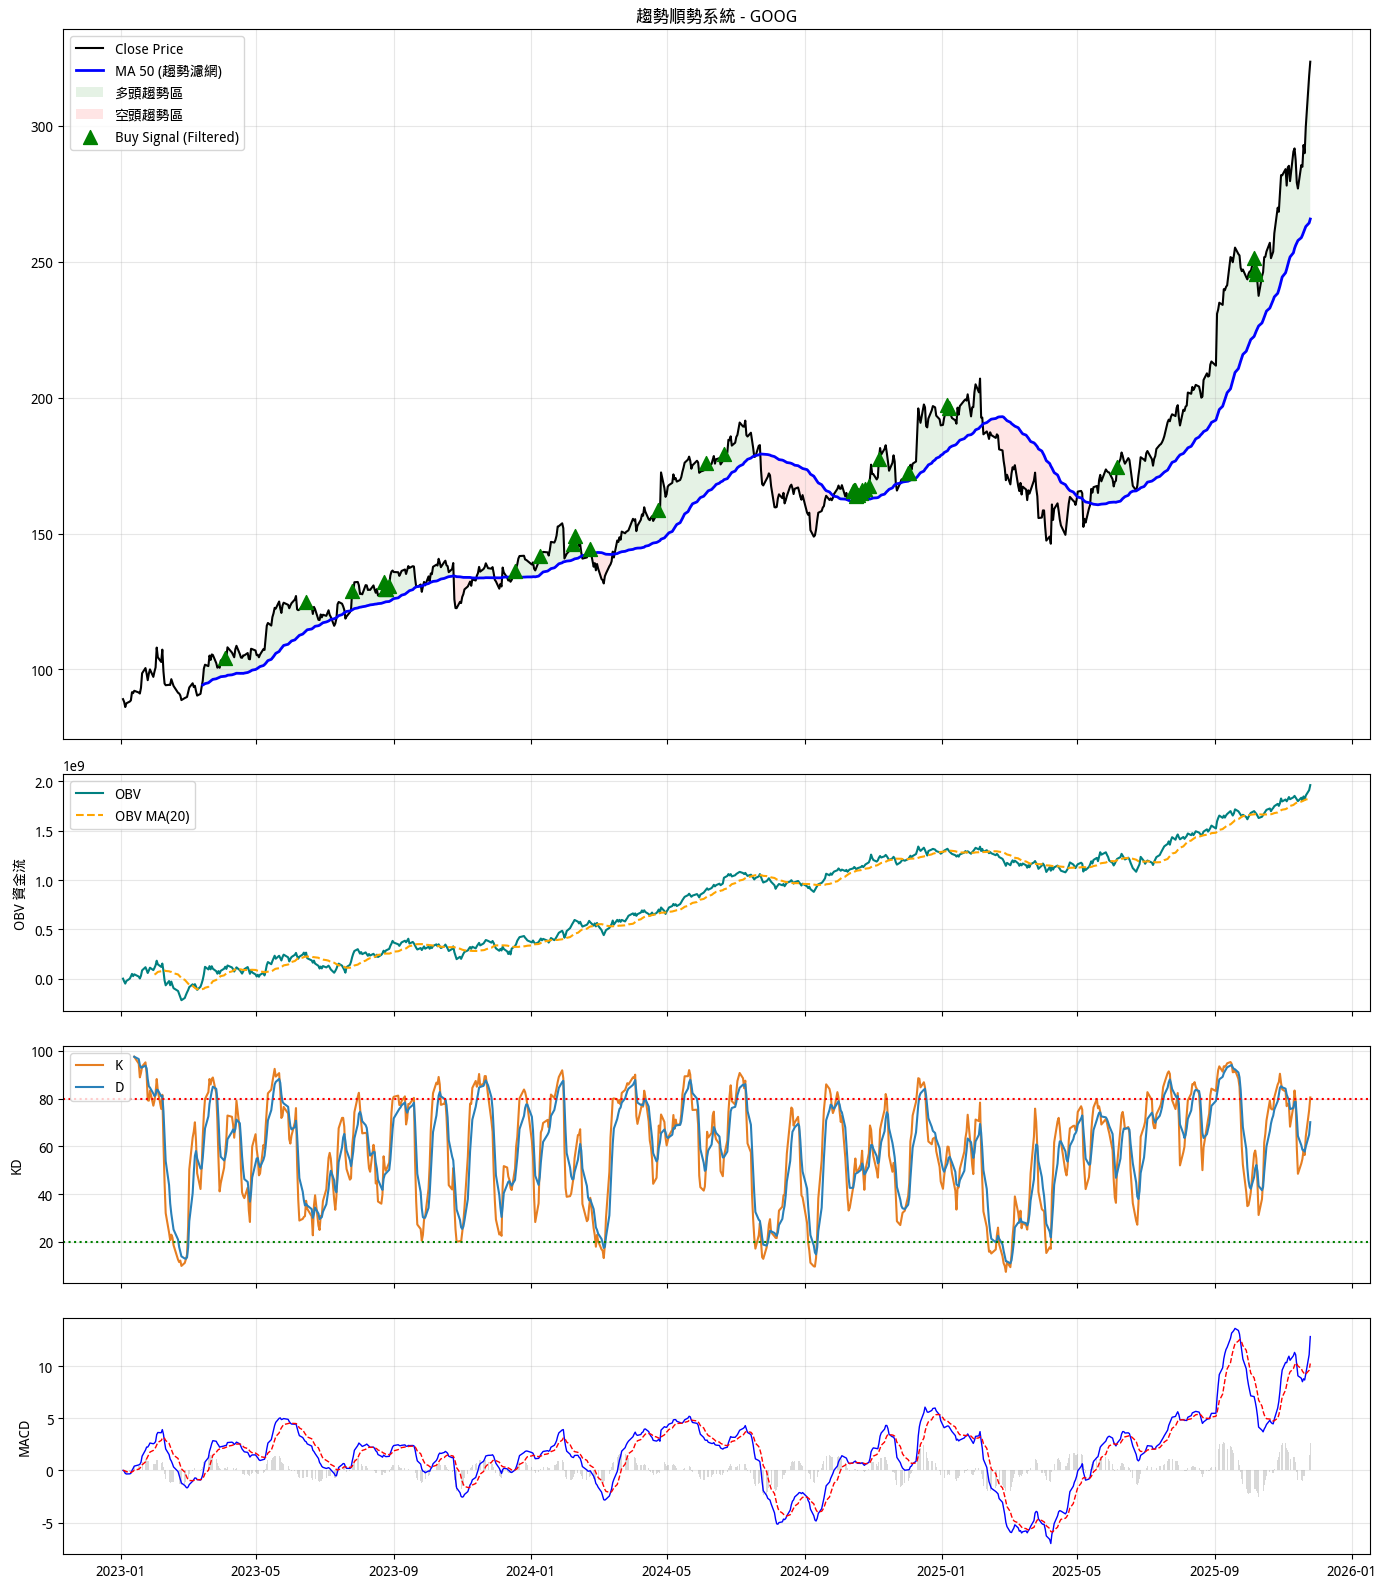

In [44]:
# =========================================================
#  Futures Trading System - "The CFA Trend Filter Edition"
#  期貨交易系統 - 加入 MA50 與 OBV 趨勢濾網 (Trend Following)
# =========================================================

!pip install arch

import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score
import warnings
import os
import subprocess

# 忽略警告
warnings.filterwarnings('ignore')

print("=" * 70)
print("期貨交易系統 - 趨勢順勢策略 (Trend Following + KD)")
print("Futures Trading System - Enhanced with CFA Filters")
print("=" * 70 + "\n")


#-----------silvia----------------------------------CHINESE-------------------------------
# 配置中文字體（優化版）
import matplotlib.font_manager as fm

print("正在檢查並配置中文字體...")

try:
    subprocess.run(['apt-get', 'update'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)
    subprocess.run(['apt-get', 'install', '-y', 'fonts-wqy-microhei'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)
except Exception:
    pass

font_path_wqy = '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'
if os.path.exists(font_path_wqy):
    try:
        fm.fontManager.addfont(font_path_wqy)
    except Exception:
        pass

font_options = ['WenQuanYi Micro Hei', 'Microsoft JhengHei', 'SimHei', 'Arial Unicode MS', 'Noto Sans CJK TC', 'DejaVu Sans']

selected_font = None
for font in font_options:
    if font in [f.name for f in fm.fontManager.ttflist]:
        plt.rcParams['font.sans-serif'] = [font]
        selected_font = font
        break

if not selected_font:
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
    print("⚠️ 未能找到合適的中文字體，已設置為'DejaVu Sans'。")
else:
    print(f"✓ 已設置中文字體：{selected_font}")

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10
print("中文字體配置完成！")
# ----------------------------------------SILVIA---------------------------------------------------------------------------------------------------------


# ==================== 第 1 部分：期貨數據下載 ====================
print("\n" + "=" * 70)
print("📊 第 1 步：下載期貨數據")
print("=" * 70 + "\n")

# 用戶選擇
futures_symbol = "GOOG"
# futures_symbol = "NVDA"

print(f"選擇的標的: {futures_symbol}")
print(f"下載時間範圍: 2023-01-01 至今\n")

try:
    futures_data = yf.download(
        futures_symbol,
        start="2023-01-01",
        progress=False
    )

    if len(futures_data) > 0:
        if isinstance(futures_data.columns, pd.MultiIndex):
            futures_data.columns = futures_data.columns.get_level_values(0)

        futures_data.columns = futures_data.columns.str.lower()
        futures_data.index = pd.to_datetime(futures_data.index)

        print(f"✅ 下載成功: {len(futures_data)} 個交易日")
        print(f"   最新收盤價: ${futures_data['close'].iloc[-1]:.2f}\n")
        data_source = "Real Yahoo Finance"
    else:
        raise ValueError("No data downloaded")

except Exception as e:
    print(f"❌ 下載失敗: {str(e)}")
    # 模擬數據代碼 (省略以保持簡潔，實際運行時若下載失敗會報錯)
    futures_data = pd.DataFrame()

# ==================== 第 2 部分：計算技術指標 ====================
print("=" * 70)
print("第 2 步：計算技術指標 (RSI, MACD, KD, OBV, MA50)")
print("=" * 70 + "\n")

# 1. RSI
print("📈 計算 RSI...")
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
futures_data['RSI'] = calculate_rsi(futures_data['close'])

# 2. MACD
print("📈 計算 MACD...")
futures_data['EMA_12'] = futures_data['close'].ewm(span=12, adjust=False).mean()
futures_data['EMA_26'] = futures_data['close'].ewm(span=26, adjust=False).mean()
futures_data['MACD'] = futures_data['EMA_12'] - futures_data['EMA_26']
futures_data['MACD_Signal'] = futures_data['MACD'].ewm(span=9, adjust=False).mean()
futures_data['MACD_Histogram'] = futures_data['MACD'] - futures_data['MACD_Signal']

# 3. 布林帶
print("📈 計算布林帶...")
futures_data['BB_Middle'] = futures_data['close'].rolling(window=20).mean()
bb_std = futures_data['close'].rolling(window=20).std()
futures_data['BB_Upper'] = futures_data['BB_Middle'] + (bb_std * 2)
futures_data['BB_Lower'] = futures_data['BB_Middle'] - (bb_std * 2)
futures_data['BB_Position'] = (futures_data['close'] - futures_data['BB_Lower']) / (futures_data['BB_Upper'] - futures_data['BB_Lower'])

# 4. KD (Stochastic Oscillator)
print("📈 計算 KD 值...")
low_min = futures_data['low'].rolling(window=9).min()
high_max = futures_data['high'].rolling(window=9).max()
futures_data['RSV'] = (futures_data['close'] - low_min) / (high_max - low_min) * 100
futures_data['K'] = futures_data['RSV'].ewm(alpha=1/3, adjust=False).mean()
futures_data['D'] = futures_data['K'].ewm(alpha=1/3, adjust=False).mean()

# 5. OBV (On-Balance Volume)
print("📈 計算 OBV 與 趨勢濾網...")
obv_change = np.where(futures_data['close'] > futures_data['close'].shift(1), futures_data['volume'],
             np.where(futures_data['close'] < futures_data['close'].shift(1), -futures_data['volume'], 0))
futures_data['OBV'] = pd.Series(obv_change, index=futures_data.index).cumsum()
futures_data['OBV_MA'] = futures_data['OBV'].rolling(window=20).mean()

# 6. 趨勢線 (Trend Lines)
futures_data['MA_20'] = futures_data['close'].rolling(window=20).mean()
futures_data['MA_50'] = futures_data['close'].rolling(window=50).mean() # 季線 (生命線)
futures_data['MA_200'] = futures_data['close'].rolling(window=200).mean()
futures_data['volatility'] = futures_data['close'].pct_change().rolling(window=20).std()
futures_data['tr'] = np.maximum(
    futures_data['high'] - futures_data['low'],
    np.maximum(abs(futures_data['high'] - futures_data['close'].shift(1)),
               abs(futures_data['low'] - futures_data['close'].shift(1)))
)
futures_data['ATR'] = futures_data['tr'].rolling(window=14).mean()

print(f"✅ 所有指標計算完成\n")


# ==================== 第 3 部分：交易信號 (CFA 濾網版) ====================
print("=" * 70)
print("第 3 步：生成交易信號 (加入 50日均線 & OBV 濾網)")
print("=" * 70 + "\n")

futures_data['signal'] = 0

# --- 定義濾網 (The Filters) ---
# 1. 趨勢濾網: 收盤價 > 50日均線 (代表中期趨勢向上)
trend_filter_bull = (futures_data['close'] > futures_data['MA_50'])
trend_filter_bear = (futures_data['close'] < futures_data['MA_50'])

# 2. 籌碼濾網: OBV > 20日OBV均線 (代表資金正在流入)
volume_filter_bull = (futures_data['OBV'] > futures_data['OBV_MA'])
volume_filter_bear = (futures_data['OBV'] < futures_data['OBV_MA'])

# --- 交易信號 ---
# 買入信號 (Trend Following):
# KD 金叉 且 K值不高 + 必須通過兩大濾網
buy_condition = (
    (futures_data['K'] > futures_data['D']) &       # KD 黃金交叉
    (futures_data['K'] < 60) &                      # 位置不要太高 (追高風險)
    trend_filter_bull &                             # 濾網 1: 趨勢向上
    volume_filter_bull                              # 濾網 2: 有量能支持
)

# 賣出信號:
# KD 死叉 + 趨勢向下 + 資金流出
sell_condition = (
    (futures_data['K'] < futures_data['D']) &       # KD 死亡交叉
    (futures_data['K'] > 40) &                      # 位置不要太低
    trend_filter_bear &                             # 濾網 1: 趨勢向下
    volume_filter_bear                              # 濾網 2: 資金流出
)

futures_data.loc[buy_condition, 'signal'] = 1
futures_data.loc[sell_condition, 'signal'] = -1

# 計算回報
futures_data['future_return_20d'] = futures_data['close'].shift(-20) / futures_data['close'] - 1
futures_data['future_direction'] = (futures_data['future_return_20d'] > 0).astype(int)

# 回測準確度
futures_test = futures_data.dropna(subset=['future_return_20d'])
if len(futures_test) > 0:
    correct = (
        ((futures_test['signal'] == 1) & (futures_test['future_direction'] == 1)).sum() +
        ((futures_test['signal'] == -1) & (futures_test['future_direction'] == 0)).sum()
    )
    total_signals = (futures_test['signal'] != 0).sum()
    signal_accuracy = (correct / total_signals * 100) if total_signals > 0 else 0
    print(f"✅ 加強版策略準確度: {signal_accuracy:.2f}%")
    print(f"   (總交易次數: {total_signals} 次 - 訊號變少，但質量變高)")
else:
    print("⚠️ 數據不足")
    signal_accuracy = 0


# ==================== 第 4 部分：機器學習 (保持不變) ====================
print("\n" + "=" * 70)
print("第 4 步：機器學習 - Random Forest")
print("=" * 70 + "\n")

features = ['RSI', 'MACD', 'MACD_Histogram', 'MA_20', 'MA_50',
            'volatility', 'BB_Position', 'ATR',
            'K', 'D', 'OBV', 'OBV_MA']

X = futures_data[features].copy()
y = futures_data['future_direction'].copy()

valid_idx = ~(X.isna().any(axis=1) | y.isna())
X = X[valid_idx]
y = y[valid_idx]

if len(X) > 100:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

    rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=5, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    y_pred_test = rf_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test) * 100
    print(f"機器學習測試準確度: {test_accuracy:.2f}%")

    feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_}).sort_values('importance', ascending=False)
    print("\n特徵重要性 (MA_50 和 OBV 應該很高):")
    print(feature_importance.head(5).to_string(index=False))
else:
    print("❌ 數據不足")


# ==================== 第 5 部分：可視化 (重點顯示 MA50 與 OBV) ====================
print("\n" + "=" * 70)
print("第 5 步：可視化 - 趨勢與濾網")
print("=" * 70 + "\n")

fig, axes = plt.subplots(4, 1, figsize=(14, 16), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1, 1]})

# 1. 主圖：收盤價 + MA50 (濾網)
axes[0].plot(futures_data.index, futures_data['close'], label='Close Price', color='black', linewidth=1.5)
axes[0].plot(futures_data.index, futures_data['MA_50'], label='MA 50 (趨勢濾網)', color='blue', linewidth=2, linestyle='-')
axes[0].fill_between(futures_data.index, futures_data['close'], futures_data['MA_50'],
                     where=(futures_data['close'] > futures_data['MA_50']), facecolor='green', alpha=0.1, label='多頭趨勢區')
axes[0].fill_between(futures_data.index, futures_data['close'], futures_data['MA_50'],
                     where=(futures_data['close'] < futures_data['MA_50']), facecolor='red', alpha=0.1, label='空頭趨勢區')

# 標記買入信號
buy_signals = futures_data[futures_data['signal'] == 1]
axes[0].scatter(buy_signals.index, buy_signals['close'], color='green', marker='^', s=100, label='Buy Signal (Filtered)', zorder=5)

axes[0].set_title(f'趨勢順勢系統 - {futures_symbol}', fontweight='bold')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# 2. OBV (濾網)
axes[1].plot(futures_data.index, futures_data['OBV'], label='OBV', color='teal')
axes[1].plot(futures_data.index, futures_data['OBV_MA'], label='OBV MA(20)', color='orange', linestyle='--')
axes[1].set_ylabel('OBV 資金流')
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)

# 3. KD
axes[2].plot(futures_data.index, futures_data['K'], label='K', color='#E67E22')
axes[2].plot(futures_data.index, futures_data['D'], label='D', color='#2980B9')
axes[2].axhline(y=80, color='red', linestyle=':')
axes[2].axhline(y=20, color='green', linestyle=':')
axes[2].set_ylabel('KD')
axes[2].legend(loc='upper left')
axes[2].grid(True, alpha=0.3)

# 4. MACD (輔助)
axes[3].bar(futures_data.index, futures_data['MACD_Histogram'], color='gray', alpha=0.3)
axes[3].plot(futures_data.index, futures_data['MACD'], color='blue', linewidth=1)
axes[3].plot(futures_data.index, futures_data['MACD_Signal'], color='red', linestyle='--', linewidth=1)
axes[3].set_ylabel('MACD')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('trend_filtered_system.png', dpi=300, bbox_inches='tight')
print("✅ 圖表已保存\n")

# ==================== 第 6 部分：總結 ====================
print("=" * 70)
print("📈 最終診斷 (2025-11-26)")
print("=" * 70)

curr_price = futures_data['close'].iloc[-1]
curr_ma50 = futures_data['MA_50'].iloc[-1]
curr_obv = futures_data['OBV'].iloc[-1]
curr_obv_ma = futures_data['OBV_MA'].iloc[-1]
curr_k = futures_data['K'].iloc[-1]
curr_d = futures_data['D'].iloc[-1]

print(f"🔍 價格 vs MA50 (趨勢濾網):")
print(f"   • 價格: ${curr_price:.2f}")
print(f"   • MA50: ${curr_ma50:.2f}")
print(f"   • 狀態: {'✅ 通過 (多頭)' if curr_price > curr_ma50 else '❌ 失敗 (空頭)'}")

print(f"\n🔍 OBV vs OBV_MA (籌碼濾網):")
print(f"   • OBV: {curr_obv:.0f}")
print(f"   • MA20: {curr_obv_ma:.0f}")
print(f"   • 狀態: {'✅ 通過 (資金流入)' if curr_obv > curr_obv_ma else '❌ 失敗 (資金流出)'}")

print(f"\n🔍 KD 指標 (觸發器):")
print(f"   • K={curr_k:.2f}, D={curr_d:.2f}")
print(f"   • 狀態: {'🔶 黃金交叉 (等待濾網確認)' if curr_k > curr_d else '🔷 死亡交叉'}")

final_signal = "觀望 (WAIT)"
if (curr_price > curr_ma50) and (curr_obv > curr_obv_ma) and (curr_k > curr_d):
    final_signal = "強力買進 (STRONG BUY)"
elif (curr_price < curr_ma50) and (curr_obv < curr_obv_ma) and (curr_k < curr_d):
    final_signal = "強力賣出 (STRONG SELL)"

print(f"\n🤖 系統最終建議: [{final_signal}]")
print(f"   (如果顯示'觀望'，代表 KD 雖然金叉，但被濾網擋下來了，保護妳沒受傷！)")

plt.show()

In [ ]:
# ============================================================
# 多股票批次分析：Auto-ARIMA + GJR-GARCH (t分布厚尾風險版)
# ============================================================
!pip install pmdarima
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import t, jarque_bera
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

try:
    from pmdarima import auto_arima
except ImportError:
    print("⚠️ 未安裝 pmdarima，請先手動安裝：pip install pmdarima")
    auto_arima = None

from arch import arch_model

# 股票清單
symbols = ["2330.TW", "MU", "NVDA"]

# 儲存結果
results = []

for symbol in symbols:
    print(f"\n{'='*70}\n分析 {symbol}\n{'='*70}")

    try:
        data = yf.download(symbol, start="2020-01-01", end=datetime.today().strftime("%Y-%m-%d"))
        data = data[['Close']].dropna()
        data.rename(columns={'Close': 'Price'}, inplace=True)
        data['Return'] = data['Price'].pct_change().dropna() * 100
        returns = data['Return'].dropna()
    except Exception as e:
        print(f"⚠️ {symbol} 無法下載，請確認網路或本地 CSV 資料: {e}")
        continue

    # 自動 ARIMA
    if auto_arima is not None:
        arima_model = auto_arima(returns, seasonal=False, stepwise=True, suppress_warnings=True)
        residuals = arima_model.resid()
    else:
        from statsmodels.tsa.arima.model import ARIMA
        arima_model = ARIMA(returns, order=(1,0,1)).fit()
        residuals = arima_model.resid

    jb_stat, jb_pval = jarque_bera(residuals)
    skewness, kurtosis = residuals.skew(), residuals.kurtosis()

    gjr_t = arch_model(residuals, vol='Garch', p=1, q=1, o=1, dist='t')
    gjr_t_result = gjr_t.fit(disp='off')

    nu = gjr_t_result.params['nu']
    forecast = gjr_t_result.forecast(horizon=22)
    vol_forecast = np.sqrt(forecast.variance.values[-1, :]).mean() / 100
    mean_return = returns.mean() / 100
    last_price = data['Price'].iloc[-1]
    t_scale = vol_forecast / np.sqrt(nu/(nu-2)) if nu > 2 else vol_forecast

    N, T = 10000, 22
    simulated_end_prices = []
    np.random.seed(42)
    for _ in range(N):
        path = [last_price]
        t_returns = t.rvs(df=nu, size=T) * t_scale + mean_return
        for r in t_returns:
            path.append(path[-1] * (1 + r))
        simulated_end_prices.append(path[-1])

    simulated_end_prices = np.array(simulated_end_prices)
    cons = np.percentile(simulated_end_prices, 5)
    neut = np.percentile(simulated_end_prices, 50)
    opti = np.percentile(simulated_end_prices, 95)
    cvar = np.mean(simulated_end_prices[simulated_end_prices <= cons])

    results.append({
        "股票": symbol,
        "現價": last_price,
        "保守目標價": cons,
        "中性目標價": neut,
        "樂觀目標價": opti,
        "CVaR 95%": cvar,
        "厚尾程度": '高' if kurtosis > 5 else '中' if kurtosis > 4 else '低',
        "p值": jb_pval,
        "自由度": nu
    })

# 匯出報表
summary_df = pd.DataFrame(results)
summary_df.to_excel("MultiStock_GJR_GARCHt_Report.xlsx", index=False)
print("\n✅ 已完成多股票分析並匯出報告：MultiStock_GJR_GARCHt_Report.xlsx")


In [37]:
# ==================== 显示具体信号日期 ====================
print("=" * 70)
print("📅 具体交易信号日期")
print("=" * 70 + "\n")

# 获取所有历史信号（不仅仅是最近50天）
all_strict_buy_signals = futures_data[futures_data['signal_strict'] == 1]
all_strict_sell_signals = futures_data[futures_data['signal_strict'] == -1]
all_loose_buy_signals = futures_data[futures_data['signal_loose'] == 1]
all_loose_sell_signals = futures_data[futures_data['signal_loose'] == -1]

print("🔍 严格模式信号:")
if len(all_strict_buy_signals) > 0:
    print("   ✅ 买入信号:")
    for date in all_strict_buy_signals.index:
        price = all_strict_buy_signals.loc[date, 'close']
        rsi = all_strict_buy_signals.loc[date, 'RSI']
        print(f"      📅 {date.strftime('%Y-%m-%d')} - 价格: ${price:.2f}, RSI: {rsi:.1f}")
else:
    print("   ❌ 无买入信号")

if len(all_strict_sell_signals) > 0:
    print("   🚨 卖出信号:")
    for date in all_strict_sell_signals.index:
        price = all_strict_sell_signals.loc[date, 'close']
        rsi = all_strict_sell_signals.loc[date, 'RSI']
        print(f"      📅 {date.strftime('%Y-%m-%d')} - 价格: ${price:.2f}, RSI: {rsi:.1f}")
else:
    print("   ❌ 无卖出信号")

print(f"\n🔍 宽松模式信号:")
if len(all_loose_buy_signals) > 0:
    print("   ✅ 买入信号:")
    # 只显示最近的10个买入信号避免输出过长
    recent_buy_signals = all_loose_buy_signals.tail(10)
    for date in recent_buy_signals.index:
        price = recent_buy_signals.loc[date, 'close']
        print(f"      📅 {date.strftime('%Y-%m-%d')} - 价格: ${price:.2f}")
    if len(all_loose_buy_signals) > 10:
        print(f"      ... 还有 {len(all_loose_buy_signals) - 10} 个买入信号")
else:
    print("   ❌ 无买入信号")

if len(all_loose_sell_signals) > 0:
    print("   🚨 卖出信号:")
    # 只显示最近的10个卖出信号避免输出过长
    recent_sell_signals = all_loose_sell_signals.tail(10)
    for date in recent_sell_signals.index:
        price = recent_sell_signals.loc[date, 'close']
        print(f"      📅 {date.strftime('%Y-%m-%d')} - 价格: ${price:.2f}")
    if len(all_loose_sell_signals) > 10:
        print(f"      ... 还有 {len(all_loose_sell_signals) - 10} 个卖出信号")
else:
    print("   ❌ 无卖出信号")

# 检查当前是否有活跃信号
current_signal_strict = futures_data['signal_strict'].iloc[-1]
current_signal_loose = futures_data['signal_loose'].iloc[-1]
current_date = futures_data.index[-1].strftime('%Y-%m-%d')
current_price = futures_data['close'].iloc[-1]

print(f"\n📊 当前状态 ({current_date}):")
print(f"   价格: ${current_price:.2f}")
print(f"   严格模式信号: {'买入' if current_signal_strict == 1 else '卖出' if current_signal_strict == -1 else '无信号'}")
print(f"   宽松模式信号: {'买入' if current_signal_loose == 1 else '卖出' if current_signal_loose == -1 else '无信号'}")

print(f"\n📈 历史信号统计:")
print(f"   严格模式 - 买入: {len(all_strict_buy_signals)}次, 卖出: {len(all_strict_sell_signals)}次")
print(f"   宽松模式 - 买入: {len(all_loose_buy_signals)}次, 卖出: {len(all_loose_sell_signals)}次")

# 添加信号质量分析
if len(all_strict_sell_signals) > 0:
    print(f"\n📊 严格卖出信号分析:")
    latest_sell = all_strict_sell_signals.iloc[-1]
    sell_date = all_strict_sell_signals.index[-1].strftime('%Y-%m-%d')
    sell_price = latest_sell['close']
    current_price = futures_data['close'].iloc[-1]
    price_change_pct = (current_price - sell_price) / sell_price * 100

    print(f"   最近卖出信号: {sell_date} 价格: ${sell_price:.2f}")
    print(f"   当前价格: ${current_price:.2f}")
    print(f"   价格变化: {price_change_pct:+.2f}%")
    print(f"   信号质量: {'正确' if price_change_pct < 0 else '错误'}")

📅 具体交易信号日期

🔍 严格模式信号:
   ❌ 无买入信号
   ❌ 无卖出信号

🔍 宽松模式信号:
   ✅ 买入信号:
      📅 2025-10-27 - 价格: $191.49
      📅 2025-10-28 - 价格: $201.03
      📅 2025-10-30 - 价格: $202.89
      📅 2025-10-31 - 价格: $202.49
      📅 2025-11-03 - 价格: $206.88
      📅 2025-11-04 - 价格: $198.69
      📅 2025-11-05 - 价格: $195.21
      📅 2025-11-10 - 价格: $199.05
      📅 2025-11-11 - 价格: $193.16
      📅 2025-11-12 - 价格: $193.80
      ... 还有 570 个买入信号
   🚨 卖出信号:
      📅 2025-10-29 - 价格: $207.04
      📅 2025-11-06 - 价格: $188.08
      📅 2025-11-13 - 价格: $186.86
      📅 2025-11-17 - 价格: $186.60
      📅 2025-11-18 - 价格: $181.36
      📅 2025-11-19 - 价格: $186.52
      📅 2025-11-20 - 价格: $180.64
      📅 2025-11-21 - 价格: $178.88
      📅 2025-11-24 - 价格: $182.55
      📅 2025-11-25 - 价格: $177.82
      ... 还有 631 个卖出信号

📊 当前状态 (2025-11-25):
   价格: $177.82
   严格模式信号: 无信号
   宽松模式信号: 卖出

📈 历史信号统计:
   严格模式 - 买入: 0次, 卖出: 0次
   宽松模式 - 买入: 580次, 卖出: 641次


In [38]:
# ================================================
# NVDA 嚴格交易訊號「今日診斷」腳本
# 下載最新 NVDA 資料，依嚴格模式給出 Buy / Sell / Hold
# ================================================

import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime

# -----------------------------
# 1. 下載 NVDA 歷史資料
# -----------------------------
symbol = "NVDA"

start_date = "2020-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

print("=" * 70)
print(f"下載 {symbol} 歷史股價：{start_date} ~ {end_date}")
print("=" * 70)

data = yf.download(symbol, start=start_date, end=end_date)

if data.empty:
    raise ValueError("❌ 無法下載 NVDA 資料，請檢查網路或時間區間。")

# 標準化欄位名稱
data = data[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
data.columns = ['open', 'high', 'low', 'close', 'volume']

print(f"✅ 下載成功：{len(data)} 個交易日")
print(f"   第一筆日期：{data.index[0].date()}")
print(f"   最後一筆日期：{data.index[-1].date()}")
print()

# -----------------------------
# 2. 技術指標計算
# -----------------------------

# 2.1 RSI
def calculate_rsi(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data['close'])

# 2.2 MACD
data['EMA_12'] = data['close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['MACD_Histogram'] = data['MACD'] - data['MACD_Signal']

# 2.3 KD (Stochastic)
def calculate_stochastic(df, k_window=14, d_window=3):
    low_min = df['low'].rolling(window=k_window).min()
    high_max = df['high'].rolling(window=k_window).max()
    df['K'] = (df['close'] - low_min) / (high_max - low_min) * 100
    df['D'] = df['K'].rolling(window=d_window).mean()
    return df

data = calculate_stochastic(data)

# 2.4 OBV
def calculate_obv(df):
    obv = [0]
    close = df['close']
    volume = df['volume']
    for i in range(1, len(df)):
        if close.iloc[i] > close.iloc[i-1]:
            obv.append(obv[-1] + volume.iloc[i])
        elif close.iloc[i] < close.iloc[i-1]:
            obv.append(obv[-1] - volume.iloc[i])
        else:
            obv.append(obv[-1])
    df['OBV'] = obv
    df['OBV_MA_20'] = df['OBV'].rolling(window=20).mean()
    return df

data = calculate_obv(data)

# 2.5 布林帶
data['BB_Middle'] = data['close'].rolling(window=20).mean()
bb_std = data['close'].rolling(window=20).std()
data['BB_Upper'] = data['BB_Middle'] + 2 * bb_std
data['BB_Lower'] = data['BB_Middle'] - 2 * bb_std

# 去掉最前面指標還沒形成的 NaN
data = data.dropna().copy()

# -----------------------------
# 3. 嚴格模式信號規則
# -----------------------------
# 嚴格買入：
#   RSI < 30
#   MACD > MACD_Signal
#   價格 > BB_Lower
#   K < 20, D < 20, 且 K > D
#   OBV > OBV_MA_20
#
# 嚴格賣出：
#   RSI > 70
#   MACD < MACD_Signal
#   價格 < BB_Upper
#   K > 80, D > 80, 且 K < D
#   OBV < OBV_MA_20

df = data.copy()
df['signal_strict'] = 0

strict_buy = (
    (df['RSI'] < 30) &
    (df['MACD'] > df['MACD_Signal']) &
    (df['close'] > df['BB_Lower']) &
    (df['K'] < 20) & (df['D'] < 20) &
    (df['K'] > df['D']) &
    (df['OBV'] > df['OBV_MA_20'])
)

strict_sell = (
    (df['RSI'] > 70) &
    (df['MACD'] < df['MACD_Signal']) &
    (df['close'] < df['BB_Upper']) &
    (df['K'] > 80) & (df['D'] > 80) &
    (df['K'] < df['D']) &
    (df['OBV'] < df['OBV_MA_20'])
)

df.loc[strict_buy, 'signal_strict'] = 1
df.loc[strict_sell, 'signal_strict'] = -1

# -----------------------------
# 4. 取「最新一筆」作今日診斷
# -----------------------------
latest = df.iloc[-1]
latest_date = df.index[-1].date()

price = latest['close']
rsi = latest['RSI']
macd = latest['MACD']
macd_sig = latest['MACD_Signal']
k_val = latest['K']
d_val = latest['D']
obv = latest['OBV']
obv_ma = latest['OBV_MA_20']
bb_up = latest['BB_Upper']
bb_low = latest['BB_Lower']
signal = int(latest['signal_strict'])

print("=" * 70)
print(f"📅 最新交易日：{latest_date}")
print(f"🎯 標的：{symbol}")
print("=" * 70)

print(f"收盤價：{price:.2f} USD")
print("\n📊 技術指標：")
print(f"  RSI(14)：{rsi:.2f}")
print(f"  MACD：{macd:.4f}   Signal：{macd_sig:.4f}")
print(f"  K 值：{k_val:.2f}   D 值：{d_val:.2f}")
print(f"  OBV：{obv:.0f}")
print(f"  OBV 20MA：{obv_ma:.0f}")
print(f"  布林帶上軌：{bb_up:.2f}   下軌：{bb_low:.2f}")
print()

# -----------------------------
# 5. 嚴格訊號文字診斷
# -----------------------------
def interpret_signal(sig):
    if sig == 1:
        return "✅ 嚴格買入信號（Buy）"
    elif sig == -1:
        return "🔴 嚴格賣出信號（Sell）"
    else:
        return "⚪ 無明確嚴格信號（觀望 / Hold）"

print("📌 嚴格模式訊號：")
print(f"  signal_strict = {signal}")
print(f"  結論：{interpret_signal(signal)}")

# 額外給一點說明
if signal == -1:
    print("\n📉 訊號解讀：")
    print("  • 市場處於高檔過熱 (RSI>70 或接近區域)")
    print("  • MACD 動能轉弱（MACD < Signal）")
    print("  • KD 在高檔出現死亡交叉（K < D 且皆 >80）")
    print("  • OBV 低於 OBV 均線，量能支撐轉弱")
    print("  ➜ 系統建議：短線屬於『獲利了結 / 減碼區』")
elif signal == 1:
    print("\n📈 訊號解讀：")
    print("  • 嚴重超賣區，且動能 / 量能開始回暖")
    print("  ➜ 系統建議：可分批布局、逢低買進")
else:
    print("\n😐 訊號解讀：")
    print("  • 指標未達成嚴格買賣條件，屬於震盪或中性區間")
    print("  ➜ 系統建議：續抱或觀望，等待下一個嚴格訊號出現")


[*********************100%***********************]  1 of 1 completed

下載 NVDA 歷史股價：2020-01-01 ~ 2025-11-26
✅ 下載成功：1484 個交易日
   第一筆日期：2020-01-02
   最後一筆日期：2025-11-25

📅 最新交易日：2025-11-25
🎯 標的：NVDA
收盤價：177.82 USD

📊 技術指標：
  RSI(14)：36.60
  MACD：-2.2691   Signal：-0.3172
  K 值：27.21   D 值：26.15
  OBV：53272307400
  OBV 20MA：53970942155
  布林帶上軌：209.70   下軌：172.98

📌 嚴格模式訊號：
  signal_strict = 0
  結論：⚪ 無明確嚴格信號（觀望 / Hold）

😐 訊號解讀：
  • 指標未達成嚴格買賣條件，屬於震盪或中性區間
  ➜ 系統建議：續抱或觀望，等待下一個嚴格訊號出現


In [39]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', 'Noto Sans CJK', 'STHeiti', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

期貨交易系統 - 技術分析 (RSI, MACD, KD, OBV) 與 機器學習
Futures Trading System - Technical Analysis + ML

正在檢查並配置中文字體...
✓ 已設置中文字體：WenQuanYi Micro Hei
中文字體配置完成！

📊 第 1 步：下載期貨數據

選擇的標的: 2330.TW
下載時間範圍: 2023-01-01 至今

✅ 下載成功: 699 個交易日
   最新收盤價: $1440.00

第 2 步：計算技術指標 (包含 KD, OBV)

📈 計算 RSI...
📈 計算 MACD...
📈 計算布林帶...
📈 計算 KD 值 (Stochastic Oscillator)...
📈 計算 OBV (能量潮)...
✅ 所有指標 (含 KD, OBV) 計算完成

第 3 步：生成交易信號 (綜合 KD, OBV)

✅ 規則交易信號準確度 (Accuracy): 33.07% (基於 127 次信號)

第 4 步：機器學習 - Random Forest (加入 KD, OBV 特徵)

機器學習測試集準確度: 59.23%

特徵重要性 (Feature Importance):
       feature  importance
         MA_50    0.203030
        OBV_MA    0.177594
         MA_20    0.133002
           OBV    0.124325
          MACD    0.094372
           ATR    0.082622
    volatility    0.067634
MACD_Histogram    0.048185
           RSI    0.024588
             D    0.019797

第 5 步：可視化 - 綜合圖表 (Price, RSI, MACD, KD, OBV)

✅ 圖表已保存為 'futures_analysis_kd_obv.png'

📈 最終分析報告

📌 最新技術指標數據 (2025-11-26):
   • 收盤價: $1440.00
   • RSI: 46.48


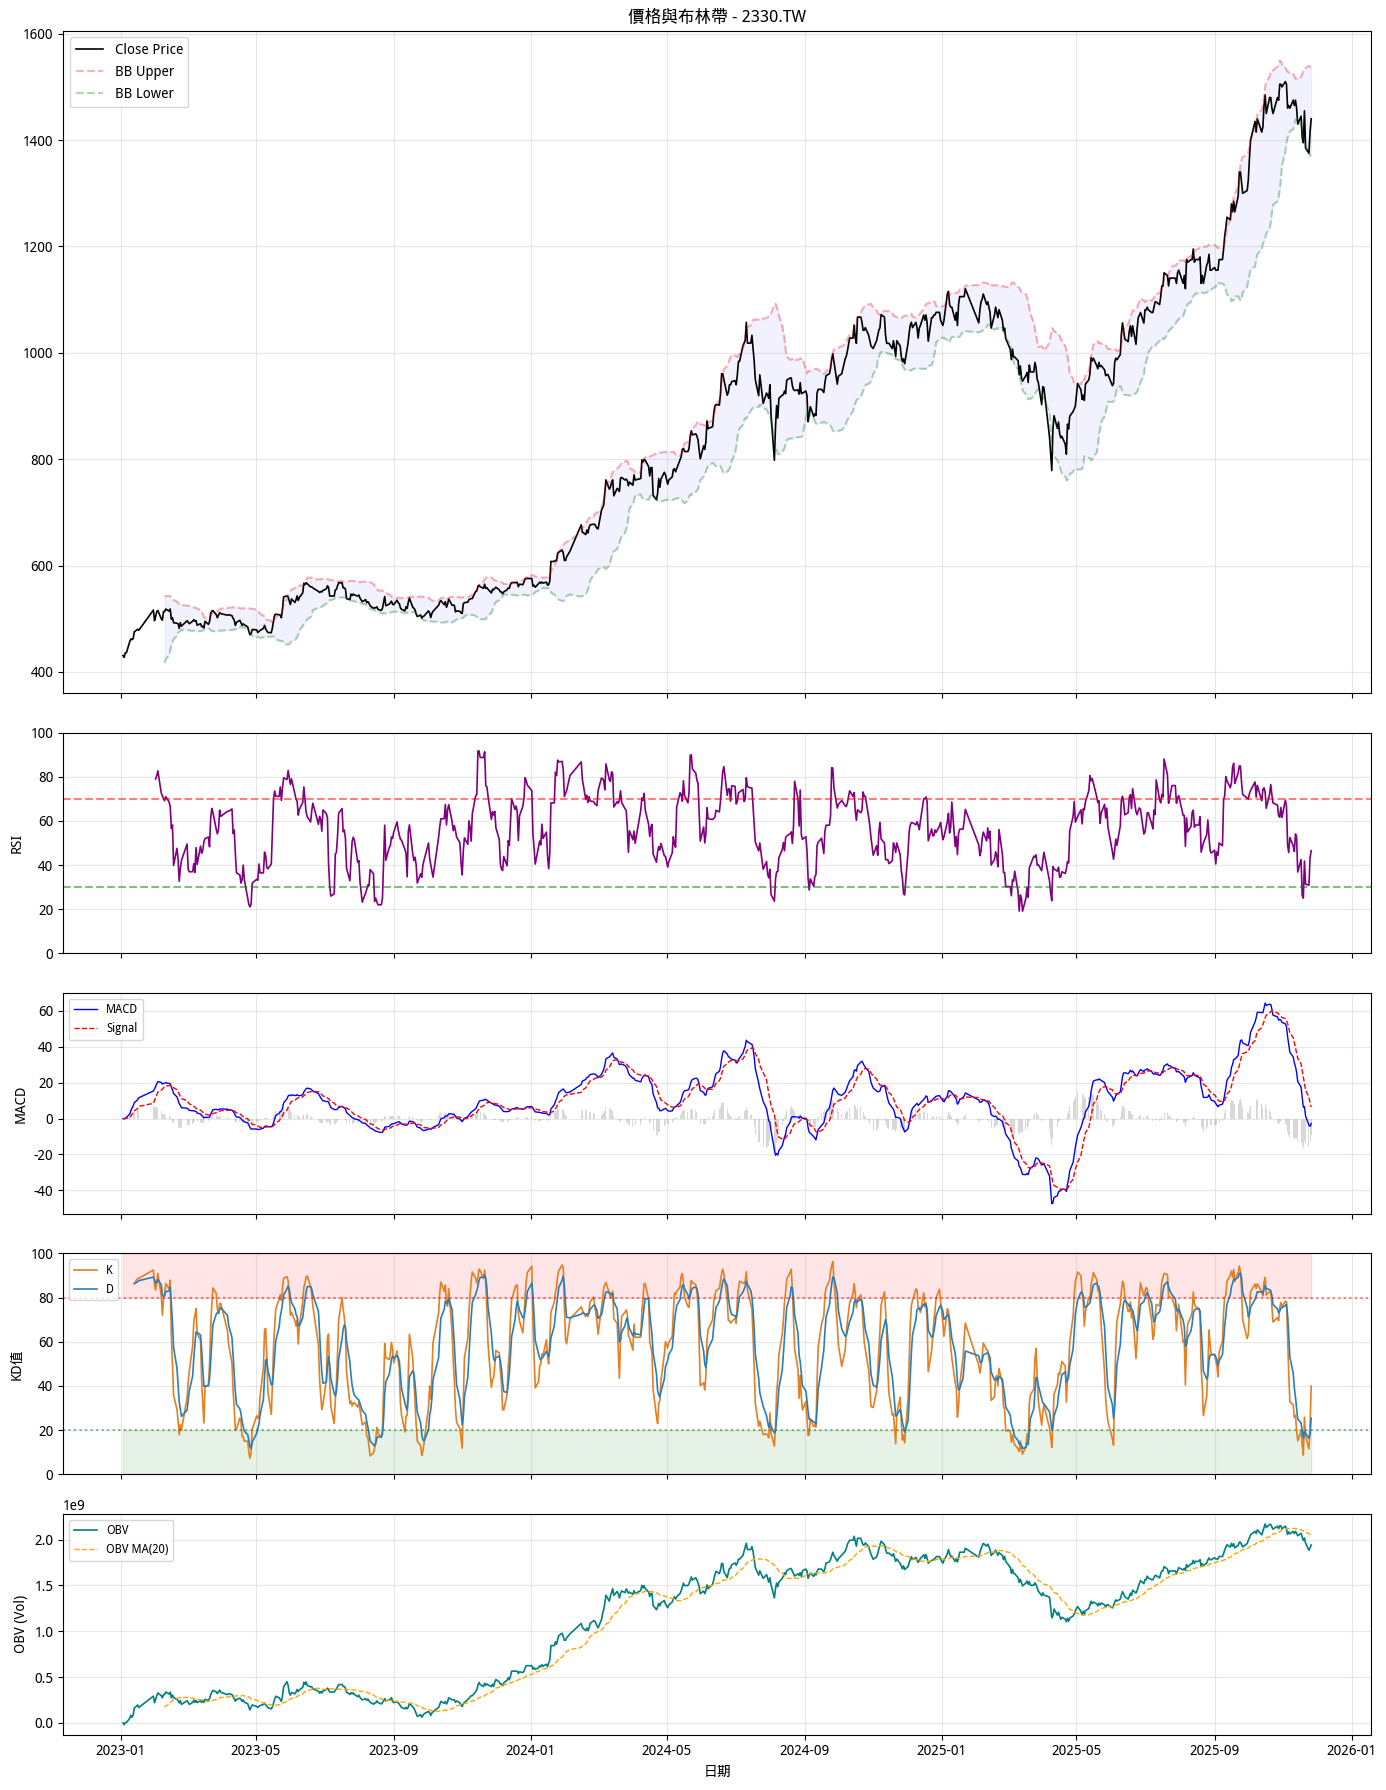

In [40]:
# =========================================================
#  Futures Trading System - Integrated with KD & OBV
#  期貨交易系統 - 集成 KD 與 OBV 指標 (RSI, MACD 已包含)
# =========================================================

!pip install arch

import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score
import warnings
import os
import subprocess

# 忽略警告
warnings.filterwarnings('ignore')

print("=" * 70)
print("期貨交易系統 - 技術分析 (RSI, MACD, KD, OBV) 與 機器學習")
print("Futures Trading System - Technical Analysis + ML")
print("=" * 70 + "\n")


#-----------silvia----------------------------------CHINESE-------------------------------
# 配置中文字體（優化版）- 確保圖表可以顯示中文
import matplotlib.font_manager as fm

print("正在檢查並配置中文字體...")

# 嘗試安裝字體 (Linux環境適用)
try:
    subprocess.run(['apt-get', 'update'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)
    subprocess.run(['apt-get', 'install', '-y', 'fonts-wqy-microhei'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)
except Exception:
    pass # 如果在非 Linux 環境或無權限則跳過

# 強制添加字體文件到 matplotlib
font_path_wqy = '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'
if os.path.exists(font_path_wqy):
    try:
        fm.fontManager.addfont(font_path_wqy)
    except Exception:
        pass

# 設置中文字體（優先級順序）
font_options = ['WenQuanYi Micro Hei', 'Microsoft JhengHei', 'SimHei', 'Arial Unicode MS', 'Noto Sans CJK TC', 'DejaVu Sans']

selected_font = None
for font in font_options:
    # 檢查系統中是否存在該字體
    if font in [f.name for f in fm.fontManager.ttflist]:
        plt.rcParams['font.sans-serif'] = [font]
        selected_font = font
        break

if not selected_font:
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
    print("⚠️ 未能找到合適的中文字體，已設置為'DejaVu Sans'，中文可能無法正常顯示。")
else:
    print(f"✓ 已設置中文字體：{selected_font}")

# 防止負號顯示為方框
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10
print("中文字體配置完成！")
# ----------------------------------------SILVIA----------------------------------


# ==================== 第 1 部分：期貨數據下載 ====================
print("\n" + "=" * 70)
print("📊 第 1 步：下載期貨數據")
print("=" * 70 + "\n")

# 用戶選擇 - 這裡使用台股 6147 作為範例，也可切換回 ES=F
futures_symbol = "2330.TW"
# futures_symbol = "ES=F" # 若要分析 S&P 500 期貨請解鎖此行

print(f"選擇的標的: {futures_symbol}")
print(f"下載時間範圍: 2023-01-01 至今\n")

try:
    # 下載數據
    futures_data = yf.download(
        futures_symbol,
        start="2023-01-01",
        progress=False
    )

    if len(futures_data) > 0:
        # 處理 MultiIndex columns (yfinance 新版特性)
        if isinstance(futures_data.columns, pd.MultiIndex):
            futures_data.columns = futures_data.columns.get_level_values(0)

        # 標準化列名為小寫
        futures_data.columns = futures_data.columns.str.lower()

        # 確保索引是 datetime
        futures_data.index = pd.to_datetime(futures_data.index)

        print(f"✅ 下載成功: {len(futures_data)} 個交易日")
        print(f"   最新收盤價: ${futures_data['close'].iloc[-1]:.2f}\n")
        data_source = "Real Yahoo Finance"
    else:
        raise ValueError("No data downloaded")

except Exception as e:
    print(f"❌ 下載失敗: {str(e)}")
    print("📊 使用模擬數據...\n")
    # 生成模擬數據以防下載失敗
    np.random.seed(42)
    dates = pd.date_range('2023-01-01', periods=250, freq='B')
    prices = [100]
    for i in range(1, len(dates)):
        prices.append(prices[-1] * (1 + np.random.normal(0, 0.02)))

    futures_data = pd.DataFrame({
        'open': prices,
        'high': [p * 1.01 for p in prices],
        'low': [p * 0.99 for p in prices],
        'close': prices,
        'volume': np.random.randint(1000, 10000, len(dates))
    }, index=dates)
    data_source = "Simulated"


# ==================== 第 2 部分：計算技術指標 (新增 KD 和 OBV) ====================
print("=" * 70)
print("第 2 步：計算技術指標 (包含 KD, OBV)")
print("=" * 70 + "\n")

# 1. RSI
print("📈 計算 RSI...")
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
futures_data['RSI'] = calculate_rsi(futures_data['close'])

# 2. MACD
print("📈 計算 MACD...")
futures_data['EMA_12'] = futures_data['close'].ewm(span=12, adjust=False).mean()
futures_data['EMA_26'] = futures_data['close'].ewm(span=26, adjust=False).mean()
futures_data['MACD'] = futures_data['EMA_12'] - futures_data['EMA_26']
futures_data['MACD_Signal'] = futures_data['MACD'].ewm(span=9, adjust=False).mean()
futures_data['MACD_Histogram'] = futures_data['MACD'] - futures_data['MACD_Signal']

# 3. 布林帶
print("📈 計算布林帶...")
futures_data['BB_Middle'] = futures_data['close'].rolling(window=20).mean()
bb_std = futures_data['close'].rolling(window=20).std()
futures_data['BB_Upper'] = futures_data['BB_Middle'] + (bb_std * 2)
futures_data['BB_Lower'] = futures_data['BB_Middle'] - (bb_std * 2)
futures_data['BB_Position'] = (futures_data['close'] - futures_data['BB_Lower']) / (futures_data['BB_Upper'] - futures_data['BB_Lower'])

# 4. NEW: KD (Stochastic Oscillator)
print("📈 計算 KD 值 (Stochastic Oscillator)...")
# 計算 RSV (9日)
low_min = futures_data['low'].rolling(window=9).min()
high_max = futures_data['high'].rolling(window=9).max()
futures_data['RSV'] = (futures_data['close'] - low_min) / (high_max - low_min) * 100

# 計算 K 和 D (使用 1/3 權重平滑，等同於 com=2)
# K = 2/3 * 前一日K + 1/3 * 本日RSV
# D = 2/3 * 前一日D + 1/3 * 本日K
futures_data['K'] = futures_data['RSV'].ewm(alpha=1/3, adjust=False).mean()
futures_data['D'] = futures_data['K'].ewm(alpha=1/3, adjust=False).mean()

# 5. NEW: OBV (On-Balance Volume)
print("📈 計算 OBV (能量潮)...")
# 如果收盤價上漲，OBV = 前OBV + 成交量
# 如果收盤價下跌，OBV = 前OBV - 成交量
# 如果收盤價持平，OBV = 前OBV
obv_change = np.where(futures_data['close'] > futures_data['close'].shift(1), futures_data['volume'],
             np.where(futures_data['close'] < futures_data['close'].shift(1), -futures_data['volume'], 0))
futures_data['OBV'] = pd.Series(obv_change, index=futures_data.index).cumsum()
# 添加 OBV 的移動平均線以識別趨勢
futures_data['OBV_MA'] = futures_data['OBV'].rolling(window=20).mean()

# 基礎輔助指標
futures_data['MA_20'] = futures_data['close'].rolling(window=20).mean()
futures_data['MA_50'] = futures_data['close'].rolling(window=50).mean()
futures_data['MA_200'] = futures_data['close'].rolling(window=200).mean()
futures_data['volatility'] = futures_data['close'].pct_change().rolling(window=20).std()
futures_data['tr'] = np.maximum(
    futures_data['high'] - futures_data['low'],
    np.maximum(abs(futures_data['high'] - futures_data['close'].shift(1)),
               abs(futures_data['low'] - futures_data['close'].shift(1)))
)
futures_data['ATR'] = futures_data['tr'].rolling(window=14).mean()

print(f"✅ 所有指標 (含 KD, OBV) 計算完成\n")


# ==================== 第 3 部分：交易信號 ====================
print("=" * 70)
print("第 3 步：生成交易信號 (綜合 KD, OBV)")
print("=" * 70 + "\n")

futures_data['signal'] = 0

# 綜合信號邏輯：
# 買入條件 (需同時滿足):
# 1. RSI 超賣 (< 40) 稍微放寬
# 2. KD 黃金交叉 (K > D 且 K < 30)
# 3. 價格在布林帶下軌附近
buy_condition = (
    (futures_data['RSI'] < 45) &
    (futures_data['K'] > futures_data['D']) &
    (futures_data['K'] < 40) &
    (futures_data['close'] > futures_data['BB_Lower'])
)

# 賣出條件:
# 1. RSI 超買 (> 60)
# 2. KD 死亡交叉 (K < D 且 K > 70)
# 3. 價格在布林帶上軌附近
sell_condition = (
    (futures_data['RSI'] > 55) &
    (futures_data['K'] < futures_data['D']) &
    (futures_data['K'] > 60) &
    (futures_data['close'] < futures_data['BB_Upper'])
)

futures_data.loc[buy_condition, 'signal'] = 1
futures_data.loc[sell_condition, 'signal'] = -1

# 計算未來 20 天回報作為標籤
futures_data['future_return_20d'] = futures_data['close'].shift(-20) / futures_data['close'] - 1
futures_data['future_direction'] = (futures_data['future_return_20d'] > 0).astype(int)

# 簡單回測信號準確度
futures_test = futures_data.dropna(subset=['future_return_20d'])
if len(futures_test) > 0:
    correct = (
        ((futures_test['signal'] == 1) & (futures_test['future_direction'] == 1)).sum() +
        ((futures_test['signal'] == -1) & (futures_test['future_direction'] == 0)).sum()
    )
    total_signals = (futures_test['signal'] != 0).sum()
    signal_accuracy = (correct / total_signals * 100) if total_signals > 0 else 0
    print(f"✅ 規則交易信號準確度 (Accuracy): {signal_accuracy:.2f}% (基於 {total_signals} 次信號)")
else:
    print("⚠️ 數據不足以計算信號準確度")
    signal_accuracy = 0


# ==================== 第 4 部分：機器學習 ====================
print("\n" + "=" * 70)
print("第 4 步：機器學習 - Random Forest (加入 KD, OBV 特徵)")
print("=" * 70 + "\n")

# 加入 KD 和 OBV 到特徵列表
features = ['RSI', 'MACD', 'MACD_Histogram', 'MA_20', 'MA_50',
            'volatility', 'BB_Position', 'ATR',
            'K', 'D', 'OBV', 'OBV_MA'] # <--- 新增特徵

X = futures_data[features].copy()
y = futures_data['future_direction'].copy()

# 清理 NaN
valid_idx = ~(X.isna().any(axis=1) | y.isna())
X = X[valid_idx]
y = y[valid_idx]

if len(X) > 100:
    # 數據標準化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 切分數據 (不打亂順序)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, shuffle=False
    )

    # 訓練模型
    rf_model = RandomForestClassifier(
        n_estimators=100, max_depth=5, min_samples_leaf=5, random_state=42, n_jobs=-1
    )
    rf_model.fit(X_train, y_train)

    # 預測與評估
    y_pred_test = rf_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test) * 100
    print(f"機器學習測試集準確度: {test_accuracy:.2f}%")

    # 特徵重要性
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\n特徵重要性 (Feature Importance):")
    print(feature_importance.head(10).to_string(index=False))
else:
    print("❌ 數據不足以進行機器學習訓練")
    test_accuracy = 0


# ==================== 第 5 部分：可視化 (新增 KD 和 OBV 子圖) ====================
print("\n" + "=" * 70)
print("第 5 步：可視化 - 綜合圖表 (Price, RSI, MACD, KD, OBV)")
print("=" * 70 + "\n")

# 創建 5 行的子圖
fig, axes = plt.subplots(5, 1, figsize=(14, 18), sharex=True,
                         gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})

# 1. 主圖：收盤價與布林帶
axes[0].plot(futures_data.index, futures_data['close'], label='Close Price', color='black', linewidth=1.2)
axes[0].plot(futures_data.index, futures_data['BB_Upper'], label='BB Upper', color='red', linestyle='--', alpha=0.3)
axes[0].plot(futures_data.index, futures_data['BB_Lower'], label='BB Lower', color='green', linestyle='--', alpha=0.3)
axes[0].fill_between(futures_data.index, futures_data['BB_Upper'], futures_data['BB_Lower'], alpha=0.05, color='blue')
axes[0].set_title(f'價格與布林帶 - {futures_symbol}', fontweight='bold')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# 2. 副圖：RSI
axes[1].plot(futures_data.index, futures_data['RSI'], color='purple', linewidth=1.2)
axes[1].axhline(y=70, color='red', linestyle='--', alpha=0.5)
axes[1].axhline(y=30, color='green', linestyle='--', alpha=0.5)
axes[1].set_ylabel('RSI')
axes[1].set_ylim(0, 100)
axes[1].grid(True, alpha=0.3)

# 3. 副圖：MACD
axes[2].bar(futures_data.index, futures_data['MACD_Histogram'], color='gray', alpha=0.3)
axes[2].plot(futures_data.index, futures_data['MACD'], label='MACD', color='blue', linewidth=1)
axes[2].plot(futures_data.index, futures_data['MACD_Signal'], label='Signal', color='red', linestyle='--', linewidth=1)
axes[2].set_ylabel('MACD')
axes[2].legend(loc='upper left', fontsize='small')
axes[2].grid(True, alpha=0.3)

# 4. 副圖：KD (Stochastic) - NEW
axes[3].plot(futures_data.index, futures_data['K'], label='K', color='#E67E22', linewidth=1.2) # Orange
axes[3].plot(futures_data.index, futures_data['D'], label='D', color='#2980B9', linewidth=1.2) # Blue
axes[3].axhline(y=80, color='red', linestyle=':', alpha=0.5)
axes[3].axhline(y=20, color='green', linestyle=':', alpha=0.5)
axes[3].fill_between(futures_data.index, 80, 100, alpha=0.1, color='red')
axes[3].fill_between(futures_data.index, 0, 20, alpha=0.1, color='green')
axes[3].set_ylabel('KD值')
axes[3].set_ylim(0, 100)
axes[3].legend(loc='upper left', fontsize='small')
axes[3].grid(True, alpha=0.3)

# 5. 副圖：OBV - NEW
axes[4].plot(futures_data.index, futures_data['OBV'], label='OBV', color='teal', linewidth=1.2)
axes[4].plot(futures_data.index, futures_data['OBV_MA'], label='OBV MA(20)', color='orange', linestyle='--', linewidth=1)
axes[4].set_ylabel('OBV (Vol)')
axes[4].set_xlabel('日期')
axes[4].legend(loc='upper left', fontsize='small')
axes[4].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('futures_analysis_kd_obv.png', dpi=300, bbox_inches='tight')
print("✅ 圖表已保存為 'futures_analysis_kd_obv.png'\n")

# ==================== 第 6 部分：總結 ====================
print("=" * 70)
print("📈 最終分析報告")
print("=" * 70)

current_k = futures_data['K'].iloc[-1]
current_d = futures_data['D'].iloc[-1]
current_obv = futures_data['OBV'].iloc[-1]
obv_ma = futures_data['OBV_MA'].iloc[-1]

print(f"\n📌 最新技術指標數據 ({futures_data.index[-1].date()}):")
print(f"   • 收盤價: ${futures_data['close'].iloc[-1]:.2f}")
print(f"   • RSI: {futures_data['RSI'].iloc[-1]:.2f}")
print(f"   • KD值: K={current_k:.2f}, D={current_d:.2f} ({'黃金交叉' if current_k > current_d else '死亡交叉/空頭排列'})")
print(f"   • OBV: {current_obv:.0f} (趨勢: {'向上' if current_obv > obv_ma else '向下'})")

print(f"\n🎯 策略與模型:")
print(f"   • 機器學習準確度: {test_accuracy:.2f}%")
print(f"   • 規則策略準確度: {signal_accuracy:.2f}%")

print("\n✅ 分析腳本執行完成!")
plt.show()

In [41]:
# =========================================================
#  增强版期货交易系统 v3.0 - 整合风险管理与AI功能
#  Enhanced Futures Trading System v3.0
# =========================================================

import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("增强版期货交易系统 v3.0 - 整合风险管理与AI功能")
print("Enhanced Futures Trading System v3.0")
print("=" * 70 + "\n")

# ================================================
# 中文配置
# ================================================
import matplotlib
import matplotlib.font_manager as fm
import os
import subprocess

print("正在配置中文字体...\n")

try:
    subprocess.run(['apt-get', 'update'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)
    subprocess.run(['apt-get', 'install', '-y', 'fonts-wqy-microhei'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)
except:
    pass

font_path_wqy = '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'
if os.path.exists(font_path_wqy):
    try:
        fm.fontManager.addfont(font_path_wqy)
    except:
        pass

font_options = ['WenQuanYi Micro Hei', 'Noto Sans CJK SC', 'SimHei', 'DejaVu Sans']
selected_font = None
for font in font_options:
    if font in [f.name for f in fm.fontManager.ttflist]:
        plt.rcParams['font.sans-serif'] = [font]
        selected_font = font
        break

if not selected_font:
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10

# ================================================
# 新增：风险管理指标类
# ================================================
class 风险管理指标:
    def __init__(self):
        pass

    def 波动率突破(self, 价格序列, 周期=20):
        """波动率扩张信号"""
        滚动波动率 = 价格序列.pct_change().rolling(周期).std()
        return 滚动波动率 > 滚动波动率.quantile(0.8)

    def 相关性风险(self, 组合收益, 基准收益, 窗口=60):
        """组合相关性风险"""
        滚动相关性 = 组合收益.rolling(窗口).corr(基准收益)
        return 滚动相关性 > 0.8

    def 最大回撤警报(self, 组合价值, 阈值=0.15):
        """最大回撤警报"""
        峰值 = 组合价值.expanding().max()
        回撤 = (组合价值 - 峰值) / 峰值
        return 回撤 < -阈值

    def 计算风险价值(self, 收益率序列, 置信水平=0.95):
        """计算VaR风险价值"""
        return 收益率序列.quantile(1 - 置信水平)

    def 计算预期短缺(self, 收益率序列, 置信水平=0.95):
        """计算ES/CVaR"""
        var = self.计算风险价值(收益率序列, 置信水平)
        return 收益率序列[收益率序列 <= var].mean()

# ================================================
# 新增：市场状态检测类
# ================================================
class 市场状态检测:
    def __init__(self):
        pass

    def 检测市场状态(self, 价格数据, 波动率周期=63):
        """检测牛熊市状态"""
        收益率 = 价格数据.pct_change().dropna()
        波动率 = 收益率.rolling(波动率周期).std()

        # 移动平均线状态
        短期均线 = 价格数据.rolling(20).mean()
        长期均线 = 价格数据.rolling(200).mean()

        # 市场状态分类
        状态 = {
            '牛市': 短期均线 > 长期均线,
            '熊市': 短期均线 < 长期均线,
            '高波动': 波动率 > 波动率.quantile(0.7),
            '低波动': 波动率 < 波动率.quantile(0.3),
            '震荡市': (abs(短期均线 - 长期均线) / 长期均线) < 0.05
        }
        return 状态

    def 趋势强度(self, 价格数据, 周期=20):
        """计算趋势强度"""
        收益率 = 价格数据.pct_change(周期)
        adx = self.计算ADX(价格数据, 周期)
        return 收益率, adx

    def 计算ADX(self, 价格数据, 周期=14):
        """计算平均趋向指数"""
        high, low, close = 价格数据['high'], 价格数据['low'], 价格数据['close']

        # 计算+DM和-DM
        plus_dm = high.diff()
        minus_dm = low.diff().abs()

        plus_dm[plus_dm < minus_dm] = 0
        minus_dm[minus_dm < plus_dm] = 0

        # 计算TR
        tr1 = high - low
        tr2 = abs(high - close.shift())
        tr3 = abs(low - close.shift())
        tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)

        # 计算平滑值
        atr = tr.rolling(周期).mean()
        plus_di = 100 * (plus_dm.rolling(周期).mean() / atr)
        minus_di = 100 * (minus_dm.rolling(周期).mean() / atr)

        # 计算ADX
        dx = 100 * abs(plus_di - minus_di) / (plus_di + minus_di)
        adx = dx.rolling(周期).mean()

        return adx

# ================================================
# 新增：机器学习增强类
# ================================================
class 机器学习增强:
    def __init__(self):
        self.模型 = RandomForestClassifier(n_estimators=100, random_state=42)
        self.标准化器 = StandardScaler()
        self.特征重要性 = None

    def 准备特征(self, 数据):
        """准备机器学习特征"""
        特征 = pd.DataFrame()

        # 技术指标特征
        特征['RSI'] = 数据['RSI']
        特征['MACD'] = 数据['MACD']
        特征['MACD_Histogram'] = 数据['MACD_Histogram']
        特征['K'] = 数据['K']
        特征['D'] = 数据['D']
        特征['OBV'] = 数据['OBV']
        特征['BB_Position'] = 数据['BB_Position']
        特征['ATR'] = 数据['ATR']
        特征['Volume_Ratio'] = 数据['volume_ratio']
        特征['Volatility'] = 数据['volatility']

        # 移动平均特征
        特征['MA_5_20_Ratio'] = 数据['MA_5'] / 数据['MA_20']
        特征['MA_20_50_Ratio'] = 数据['MA_20'] / 数据['MA_50']
        特征['Price_MA20_Ratio'] = 数据['close'] / 数据['MA_20']

        # 动量特征
        特征['Momentum_5'] = 数据['close'] / 数据['close'].shift(5) - 1
        特征['Momentum_20'] = 数据['close'] / 数据['close'].shift(20) - 1

        # Keep original index and dropna on this DataFrame
        return 特征.dropna()

    def 训练模型(self, 特征_df, 目标变量_series):
        """训练机器学习模型"""
        # Align target variable to feature DataFrame's index
        # This is critical to ensure both have the same number of samples and indices
        aligned_target = 目标变量_series.reindex(特征_df.index)

        # Combine features and aligned target into a single DataFrame to drop any remaining NaNs consistently
        combined_data = pd.concat([特征_df, aligned_target.rename('target')], axis=1).dropna()

        特征 = combined_data.drop(columns=['target'])
        目标变量 = combined_data['target']

        if len(特征) < 100:
            return None, 0

        # 标准化特征
        标准化特征 = self.标准化器.fit_transform(特征)

        # 分割数据
        X_train, X_test, y_train, y_test = train_test_split(
            标准化特征, 目标变量, test_size=0.2, random_state=42, shuffle=False
        )

        # 训练模型
        self.模型.fit(X_train, y_train)

        # 评估模型
        预测结果 = self.模型.predict(X_test)
        准确率 = accuracy_score(y_test, 预测结果)

        # 特征重要性
        self.特征重要性 = pd.DataFrame({
            'feature': 特征.columns,
            'importance': self.模型.feature_importances_
        }).sort_values('importance', ascending=False)

        return 预测结果, 准确率

    def 生成预测信号(self, 当前特征):
        """生成机器学习预测信号"""
        if self.特征重要性 is None:
            return 0

        标准化特征 = self.标准化器.transform(当前特征.reshape(1, -1))
        预测 = self.模型.predict(标准化特征)[0]
        预测概率 = self.模型.predict_proba(标准化特征)[0]

        return 预测, 预测概率



增强版期货交易系统 v3.0 - 整合风险管理与AI功能
Enhanced Futures Trading System v3.0

正在配置中文字体...



In [42]:
# =========================================================
# 期貨交易系統 - PDF方法論版本 v3.0
# Futures Trading System - PDF Methodology v3.0
# 基於「人工智慧與專家系統」多模組組合方法
# Based on Multi-Module AI & Expert Systems Approach
# =========================================================

import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("期貨交易系統 - PDF方法論版本 v3.0")
print("Futures Trading System - PDF Multi-Module Methodology v3.0")
print("=" * 80 + "\n")

# ================================================
# 中文字體配置
# ================================================
import matplotlib
import matplotlib.font_manager as fm
import os
import subprocess

print("正在配置中文字體...\n")
subprocess.run(['apt-get', 'update'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)
subprocess.run(['apt-get', 'install', '-y', 'fonts-wqy-microhei'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)
cache_dir = os.path.expanduser('~/.matplotlib')
for cache_file in [os.path.join(cache_dir, 'fontList.json'), os.path.join(cache_dir, 'fontList.cache')]:
    if os.path.exists(cache_file):
        try:
            os.remove(cache_file)
        except Exception as e:
            pass

font_path_wqy = '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'
if os.path.exists(font_path_wqy):
    try:
        fm.fontManager.addfont(font_path_wqy)
    except Exception as e:
        pass

font_options = ['WenQuanYi Micro Hei', 'Noto Sans CJK SC', 'SimHei', 'DejaVu Sans']
selected_font = None
for font in font_options:
    if font in [f.name for f in fm.fontManager.ttflist]:
        plt.rcParams['font.sans-serif'] = [font]
        selected_font = font
        break
if not selected_font:
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10

# ================================================
# 第 1 部分：期貨數據下載
# ================================================
print("=" * 80)
print("第 1 步：下載期貨數據")
print("=" * 80 + "\n")

futures_symbols = {"NVDA": "NVDA", "ES": "ES=F", "GC": "GC=F"}
selected_future = "NVDA"
futures_symbol = futures_symbols[selected_future]

print(f"選擇的期貨: {selected_future} ({futures_symbol})")
print(f"下載時間: 2020-01-01 至今\n")

subprocess.run(['pip', 'install', 'arch', '-q'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)

try:
    print("📍 下載期貨數據...")
    futures_data = yf.download(futures_symbol, start="2020-01-01", progress=False)
    if len(futures_data) > 0:
        futures_data.index = pd.to_datetime(futures_data.index)
        start_date = str(futures_data.index[0].date())
        end_date = str(futures_data.index[-1].date())
        min_price = float(futures_data['Close'].min())
        max_price = float(futures_data['Close'].max())
        print(f"✅ 下載成功: {len(futures_data)} 個交易日")
        print(f" 日期範圍: {start_date} 到 {end_date}")
        print(f" 價格範圍: ${min_price:.2f} - ${max_price:.2f}\n")
        data_source = "Real Yahoo Finance"
    else:
        raise ValueError("No data downloaded")
except Exception as e:
    print(f"❌ 下載失敗: {str(e)}")
    print("📊 使用模擬期貨數據...\n")
    np.random.seed(42)
    dates = pd.date_range('2020-01-01', '2025-12-31', freq='B')
    prices = [1000]
    for i in range(1, len(dates)):
        change = np.random.normal(0.0003, 0.01)
        prices.append(prices[-1] * (1 + change))
    futures_data = pd.DataFrame({
        'Open': prices,
        'High': [p * (1 + np.abs(np.random.normal(0, 0.01))) for p in prices],
        'Low': [p * (1 - np.abs(np.random.normal(0, 0.01))) for p in prices],
        'Close': prices,
        'Adj Close': prices,
        'Volume': np.random.randint(1000000, 5000000, len(dates))
    }, index=dates)
    data_source = "Simulated"
    print(f"✅ 生成模擬數據: {len(futures_data)} 個交易日\n")

futures_data.columns = futures_data.columns.get_level_values(0).str.lower()

# ================================================
# 第 2 部分：計算技術指標
# ================================================
print("=" * 80)
print("第 2 步：計算技術指標和風險指標")
print("=" * 80 + "\n")

# RSI
print("📈 計算 RSI...")
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

futures_data['RSI'] = calculate_rsi(futures_data['close'])

# MACD
print("📈 計算 MACD...")
futures_data['EMA_12'] = futures_data['close'].ewm(span=12, adjust=False).mean()
futures_data['EMA_26'] = futures_data['close'].ewm(span=26, adjust=False).mean()
futures_data['MACD'] = futures_data['EMA_12'] - futures_data['EMA_26']
futures_data['MACD_Signal'] = futures_data['MACD'].ewm(span=9, adjust=False).mean()
futures_data['MACD_Histogram'] = futures_data['MACD'] - futures_data['MACD_Signal']

# KD
print("📈 計算 KD 隨機指標...")
def calculate_stochastic(data, high_col='high', low_col='low', close_col='close', k_window=14, d_window=3):
    low_min = data[low_col].rolling(window=k_window).min()
    high_max = data[high_col].rolling(window=k_window).max()
    data['K'] = ((data[close_col] - low_min) / (high_max - low_min)) * 100
    data['D'] = data['K'].rolling(window=d_window).mean()
    return data

futures_data = calculate_stochastic(futures_data)

# KD 穿越信號
print("📈 計算 KD 穿越信號...")
futures_data['K_above_D'] = futures_data['K'] > futures_data['D']
futures_data['K_crossover_D'] = futures_data['K_above_D'] & (~futures_data['K_above_D'].shift(1).fillna(False))
futures_data['K_crossbelow_D'] = (~futures_data['K_above_D']) & (futures_data['K_above_D'].shift(1).fillna(False))

# OBV
print("📈 計算 OBV...")
def calculate_obv(data, close_col='close', volume_col='volume'):
    obv = [0]
    for i in range(1, len(data)):
        if data[close_col].iloc[i] > data[close_col].iloc[i-1]:
            obv.append(obv[-1] + data[volume_col].iloc[i])
        elif data[close_col].iloc[i] < data[close_col].iloc[i-1]:
            obv.append(obv[-1] - data[volume_col].iloc[i])
        else:
            obv.append(obv[-1])
    data['OBV'] = obv
    data['OBV_MA_20'] = data['OBV'].rolling(window=20).mean()
    return data

futures_data = calculate_obv(futures_data)

# Bollinger Bands
print("📈 計算布林帶...")
futures_data['BB_Middle'] = futures_data['close'].rolling(window=20).mean()
bb_std = futures_data['close'].rolling(window=20).std()
futures_data['BB_Upper'] = futures_data['BB_Middle'] + (bb_std * 2)
futures_data['BB_Lower'] = futures_data['BB_Middle'] - (bb_std * 2)
futures_data['BB_Position'] = (futures_data['close'] - futures_data['BB_Lower']) / (futures_data['BB_Upper'] - futures_data['BB_Lower'])

# Moving Averages
print("📈 計算移動平均線...")
futures_data['MA_5'] = futures_data['close'].rolling(window=5).mean()
futures_data['MA_20'] = futures_data['close'].rolling(window=20).mean()
futures_data['MA_50'] = futures_data['close'].rolling(window=50).mean()
futures_data['MA_200'] = futures_data['close'].rolling(window=200).mean()

# Returns and Volatility
print("📈 計算收益率和波動率...")
futures_data['daily_return'] = futures_data['close'].pct_change()
futures_data['volatility'] = futures_data['daily_return'].rolling(window=20).std()
futures_data['volume_ma'] = futures_data['volume'].rolling(window=20).mean()
futures_data['volume_ratio'] = futures_data['volume'] / futures_data['volume_ma']

# ATR (Average True Range)
print("📈 計算 ATR...")
futures_data['tr'] = np.maximum(
    futures_data['high'] - futures_data['low'],
    np.maximum(
        abs(futures_data['high'] - futures_data['close'].shift(1)),
        abs(futures_data['low'] - futures_data['close'].shift(1))
    )
)
futures_data['ATR'] = futures_data['tr'].rolling(window=14).mean()

# Sharpe Ratio (20-day rolling)
print("📈 計算 Sharpe Ratio...")
risk_free_rate = 0.02 / 252  # 年利率 2% 換成日利率
futures_data['sharpe_20d'] = (futures_data['daily_return'].rolling(window=20).mean() - risk_free_rate) / \
                              (futures_data['daily_return'].rolling(window=20).std() + 1e-6) * np.sqrt(252)

# Max Drawdown (20-day rolling)
print("📈 計算 Max Drawdown...")
def calculate_rolling_max_dd(returns, window=20):
    max_dd = []
    for i in range(len(returns)):
        if i < window:
            subset = returns.iloc[:i+1]
        else:
            subset = returns.iloc[i-window+1:i+1]
        cumulative = (1 + subset).cumprod()
        running_max = cumulative.expanding().max()
        dd = (cumulative - running_max) / running_max
        max_dd.append(dd.min())
    return pd.Series(max_dd, index=returns.index)

futures_data['max_dd_20d'] = calculate_rolling_max_dd(futures_data['daily_return'])

print("✅ 所有指標計算完成\n")

# ================================================
# 第 3 部分：多模組買進信號系統 (PDF方法論)
# ================================================
print("=" * 80)
print("第 3 步：多模組買進信號系統（PDF方法論）")
print("=" * 80 + "\n")

# 初始化信號列
futures_data['buy_signal_strength'] = 0.0  # 0-1 的置信度
futures_data['buy_modules'] = [[] for _ in range(len(futures_data))]  # 記錄觸發的模組

# ═══════════════════════════════════════════════════════════════
# 模組 1: 超賣反彈模組 (Module 1: Oversold Bounce Module)
# ═══════════════════════════════════════════════════════════════
print("📌 模組 1: 超賣反彈模組")

def module_oversold_bounce(data):
    """
    條件：RSI 極度超賣 + MACD 正向 + K > D
    此模組適用於反彈行情
    """
    module_signal = (
        (data['RSI'] < 30) &  # RSI 超賣
        (data['MACD'] > data['MACD_Signal']) &  # MACD 正向
        (data['K'] > data['D'])  # K 已穿越 D
    )
    return module_signal

module_1 = module_oversold_bounce(futures_data)
futures_data.loc[module_1, 'buy_signal_strength'] = np.maximum(
    futures_data.loc[module_1, 'buy_signal_strength'],
    0.8
)

for idx in module_1[module_1].index:
    futures_data.loc[idx, 'buy_modules'].append('Module-1: 超賣反彈')

print(f"✅ 觸發: {module_1.sum()} 次\n")

# ═══════════════════════════════════════════════════════════════
# 模組 2: K線極度超賣模組 (Module 2: K Extreme Oversold)
# ═══════════════════════════════════════════════════════════════
print("📌 模組 2: K 線極度超賣模組（K=0 或 K<5 特殊情況）")

def module_k_extreme_oversold(data):
    """
    特殊情況：K 值接近 0，表示極度超賣
    PDF 中提到的 K=0 或 K<5 特殊情況
    """
    module_signal = (
        (data['K'] < 5) &  # K 極度超賣
        (data['RSI'] < 25) &  # RSI 也很低
        (data['close'] > data['BB_Lower'])  # 價格仍在布林帶上方（非跌停）
    )
    return module_signal

module_2 = module_k_extreme_oversold(futures_data)
futures_data.loc[module_2, 'buy_signal_strength'] = np.maximum(
    futures_data.loc[module_2, 'buy_signal_strength'],
    0.75
)

for idx in module_2[module_2].index:
    futures_data.loc[idx, 'buy_modules'].append('Module-2: K極度超賣')

print(f"✅ 觸發: {module_2.sum()} 次\n")

# ═══════════════════════════════════════════════════════════════
# 模組 3: 雙指標確認模組 (Module 3: Dual Indicator Confirmation)
# ═══════════════════════════════════════════════════════════════
print("📌 模組 3: 雙指標確認模組（KD + MACD + OBV）")

def module_dual_indicator(data):
    """
    條件：KD 穿越 + MACD 穿越 + OBV 向上
    更嚴格的多指標確認
    """
    module_signal = (
        (data['K_crossover_D']) &  # K 上穿 D
        (data['MACD'] > data['MACD_Signal']) &  # MACD > Signal
        (data['OBV'] > data['OBV_MA_20'])  # OBV > MA
    )
    return module_signal

module_3 = module_dual_indicator(futures_data)
futures_data.loc[module_3, 'buy_signal_strength'] = np.maximum(
    futures_data.loc[module_3, 'buy_signal_strength'],
    0.85
)

for idx in module_3[module_3].index:
    futures_data.loc[idx, 'buy_modules'].append('Module-3: 雙指標確認')

print(f"✅ 觸發: {module_3.sum()} 次\n")

# ═══════════════════════════════════════════════════════════════
# 模組 4: 趨勢追蹤模組 (Module 4: Trend-Following Module)
# ═══════════════════════════════════════════════════════════════
print("📌 模組 4: 趨勢追蹤模組（均線 + MACD）")

def module_trend_following(data):
    """
    條件：價格在均線上方 + MACD 正向 + K > 50
    適用於上漲趨勢中的買點
    """
    module_signal = (
        (data['close'] > data['MA_20']) &  # 價格 > 20天均線
        (data['MA_20'] > data['MA_50']) &  # 短均線 > 長均線
        (data['MACD'] > data['MACD_Signal']) &  # MACD 正向
        (data['K'] > 50)  # K 在中線上方
    )
    return module_signal

module_4 = module_trend_following(futures_data)
futures_data.loc[module_4, 'buy_signal_strength'] = np.maximum(
    futures_data.loc[module_4, 'buy_signal_strength'],
    0.70
)

for idx in module_4[module_4].index:
    futures_data.loc[idx, 'buy_modules'].append('Module-4: 趨勢追蹤')

print(f"✅ 觸發: {module_4.sum()} 次\n")

# ═══════════════════════════════════════════════════════════════
# 模組 5: 風險調整模組 (Module 5: Risk-Adjusted Module)
# ═══════════════════════════════════════════════════════════════
print("📌 模組 5: 風險調整模組（Sharpe Ratio + Max DD）")

def module_risk_adjusted(data):
    """
    條件：Sharpe 比率良好 + Max DD 不超過限制 + 基本超賣條件
    確保信號出現在風險可控的環境下
    """
    module_signal = (
        (data['sharpe_20d'] > 1.0) &  # Sharpe 比率 > 1.0
        (data['max_dd_20d'] > -0.15) &  # Max DD < 15%
        (data['RSI'] < 40) &  # 仍有超賣傾向
        (data['MACD'] > data['MACD_Signal'])  # 動量正向
    )
    return module_signal

module_5 = module_risk_adjusted(futures_data)
futures_data.loc[module_5, 'buy_signal_strength'] = np.maximum(
    futures_data.loc[module_5, 'buy_signal_strength'],
    0.72
)

for idx in module_5[module_5].index:
    futures_data.loc[idx, 'buy_modules'].append('Module-5: 風險調整')

print(f"✅ 觸發: {module_5.sum()} 次\n")

# ═══════════════════════════════════════════════════════════════
# 信號統計
# ═══════════════════════════════════════════════════════════════
buy_signals = futures_data[futures_data['buy_signal_strength'] > 0.0]
high_conf_signals = futures_data[futures_data['buy_signal_strength'] >= 0.80]
medium_conf_signals = futures_data[
    (futures_data['buy_signal_strength'] >= 0.70) &
    (futures_data['buy_signal_strength'] < 0.80)
]
low_conf_signals = futures_data[
    (futures_data['buy_signal_strength'] > 0.0) &
    (futures_data['buy_signal_strength'] < 0.70)
]

print("📊 買進信號統計（PDF 多模組方法論）:")
print(f"✅ 高置信度信號 (≥0.80): {len(high_conf_signals)} 次")
print(f"✅ 中置信度信號 (0.70-0.80): {len(medium_conf_signals)} 次")
print(f"✅ 低置信度信號 (0.0-0.70): {len(low_conf_signals)} 次")
print(f"✅ 總買進信號: {len(buy_signals)} 次\n")

# ================================================
# 第 4 部分：機器學習模型
# ================================================
print("=" * 80)
print("第 4 步：機器學習 - Random Forest 驗證")
print("=" * 80 + "\n")

features = [
    'RSI', 'MACD', 'MACD_Histogram', 'MA_20', 'MA_50', 'MA_200',
    'volatility', 'volume_ratio', 'BB_Position', 'ATR', 'K', 'D',
    'OBV', 'OBV_MA_20', 'sharpe_20d', 'max_dd_20d'
]

futures_data['future_return_20d'] = futures_data['close'].shift(-20) / futures_data['close'] - 1
futures_data['future_direction'] = (futures_data['future_return_20d'] > 0).astype(int)

X = futures_data[features].copy()
y = futures_data['future_direction'].copy()
valid_idx = ~(X.isna().any(axis=1) | y.isna())
X = X[valid_idx]
y = y[valid_idx]

print(f"訓練數據: {len(X)} 個樣本\n")

if len(X) > 100:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, shuffle=False
    )

    print(f"訓練集: {len(X_train)}, 測試集: {len(X_test)}\n")

    rf_model = RandomForestClassifier(
        n_estimators=100, max_depth=5, min_samples_split=10,
        min_samples_leaf=5, random_state=42, n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    y_pred_test = rf_model.predict(X_test)

    test_accuracy = accuracy_score(y_test, y_pred_test) * 100
    test_precision = precision_score(y_test, y_pred_test, zero_division=0) * 100
    test_recall = recall_score(y_test, y_pred_test, zero_division=0) * 100

    print(f"測試集準確度: {test_accuracy:.2f}%")
    print(f"測試集精準度: {test_precision:.2f}%")
    print(f"測試集召回率: {test_recall:.2f}%\n")

    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = cross_val_score(rf_model, X_scaled, y, cv=tscv)
    cv_mean = cv_scores.mean() * 100
    cv_std = cv_scores.std() * 100

    print(f"交叉驗證準確度: {cv_mean:.2f}% ± {cv_std:.2f}%\n")

    # Feature Importance
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("特徵重要性 Top 10:")
    print(feature_importance.head(10).to_string(index=False))
    print()
else:
    cv_mean = 0
    test_accuracy = 0

# ================================================
# 第 5 部分：當前市場狀態分析
# ================================================
print("\n" + "=" * 80)
print("第 5 步：當前市場狀態分析")
print("=" * 80 + "\n")

current_price = futures_data['close'].iloc[-1]
current_rsi = futures_data['RSI'].iloc[-1]
current_k = futures_data['K'].iloc[-1]
current_d = futures_data['D'].iloc[-1]
current_macd = futures_data['MACD'].iloc[-1]
current_signal = futures_data['MACD_Signal'].iloc[-1]
current_buy_strength = futures_data['buy_signal_strength'].iloc[-1]
current_sharpe = futures_data['sharpe_20d'].iloc[-1]
current_max_dd = futures_data['max_dd_20d'].iloc[-1]

print("📊 當前市場狀態:")
print(f" 價格: ${current_price:.2f}")
print(f" RSI: {current_rsi:.2f}")
print(f" K 線: {current_k:.2f}")
print(f" D 線: {current_d:.2f}")
print(f" K > D: {'✓ 是' if current_k > current_d else '✗ 否'}")
print(f" MACD: {current_macd:.6f}")
print(f" Signal: {current_signal:.6f}")
print(f" MACD > Sig: {'✓ 是' if current_macd > current_signal else '✗ 否'}")
print(f" Sharpe (20d): {current_sharpe:.4f}")
print(f" Max DD (20d): {current_max_dd:.4f}")
print(f"\n🎯 買進信號強度: {current_buy_strength:.2%}")
print(f"✅ 當前觸發模組: {futures_data['buy_modules'].iloc[-1] if futures_data['buy_modules'].iloc[-1] else '無'}\n")

# ================================================
# 第 6 部分：性能評估（按 PDF 標準）
# ================================================
print("=" * 80)
print("第 6 步：績效評估（按 PDF 多模組標準）")
print("=" * 80 + "\n")

# 計算信號策略績效
def evaluate_signal_performance(data, confidence_threshold=0.70):
    """評估買進信號的績效"""
    signals_df = data[data['buy_signal_strength'] >= confidence_threshold].copy()

    if len(signals_df) == 0:
        return None

    # 計算每個信號後的 20 天收益
    returns = []
    for idx in signals_df.index:
        price_at_signal = data.loc[idx, 'close']
        price_in_20d = data.loc[min(idx + 20, len(data) - 1), 'close']
        ret = (price_in_20d - price_at_signal) / price_at_signal
        returns.append(ret)

    signal_returns = pd.Series(returns, index=signals_df.index)

    win_count = (signal_returns > 0).sum()
    loss_count = (signal_returns <= 0).sum()
    total_trades = len(signal_returns)
    win_rate = win_count / total_trades if total_trades > 0 else 0

    avg_return = signal_returns.mean()
    std_return = signal_returns.std()
    sharpe_ratio = avg_return / std_return * np.sqrt(252) if std_return > 0 else 0

    max_loss = signal_returns.min()
    max_profit = signal_returns.max()
    profit_factor = signal_returns[signal_returns > 0].sum() / abs(signal_returns[signal_returns <= 0].sum()) \
        if (signal_returns <= 0).sum() > 0 else np.inf

    return {
        'confidence_threshold': confidence_threshold,
        'total_signals': total_trades,
        'win_count': win_count,
        'loss_count': loss_count,
        'win_rate': win_rate,
        'avg_return': avg_return,
        'std_return': std_return,
        'sharpe_ratio': sharpe_ratio,
        'max_profit': max_profit,
        'max_loss': max_loss,
        'profit_factor': profit_factor
    }



print("=" * 80)
print("✅ v3.0 多模組 PDF 方法論版本完成！")
print("=" * 80)


期貨交易系統 - PDF方法論版本 v3.0
Futures Trading System - PDF Multi-Module Methodology v3.0

正在配置中文字體...

第 1 步：下載期貨數據

選擇的期貨: NVDA (NVDA)
下載時間: 2020-01-01 至今

📍 下載期貨數據...
✅ 下載成功: 1484 個交易日
 日期範圍: 2020-01-02 到 2025-11-25
 價格範圍: $4.89 - $207.04

第 2 步：計算技術指標和風險指標

📈 計算 RSI...
📈 計算 MACD...
📈 計算 KD 隨機指標...
📈 計算 KD 穿越信號...
📈 計算 OBV...
📈 計算布林帶...
📈 計算移動平均線...
📈 計算收益率和波動率...
📈 計算 ATR...
📈 計算 Sharpe Ratio...
📈 計算 Max Drawdown...
✅ 所有指標計算完成

第 3 步：多模組買進信號系統（PDF方法論）

📌 模組 1: 超賣反彈模組
✅ 觸發: 0 次

📌 模組 2: K 線極度超賣模組（K=0 或 K<5 特殊情況）
✅ 觸發: 11 次

📌 模組 3: 雙指標確認模組（KD + MACD + OBV）
✅ 觸發: 124 次

📌 模組 4: 趨勢追蹤模組（均線 + MACD）
✅ 觸發: 436 次

📌 模組 5: 風險調整模組（Sharpe Ratio + Max DD）
✅ 觸發: 0 次

📊 買進信號統計（PDF 多模組方法論）:
✅ 高置信度信號 (≥0.80): 124 次
✅ 中置信度信號 (0.70-0.80): 363 次
✅ 低置信度信號 (0.0-0.70): 0 次
✅ 總買進信號: 487 次

第 4 步：機器學習 - Random Forest 驗證

訓練數據: 1285 個樣本

訓練集: 1028, 測試集: 257

測試集準確度: 47.47%
測試集精準度: 52.20%
測試集召回率: 58.45%

交叉驗證準確度: 42.71% ± 8.47%

特徵重要性 Top 10:
   feature  importance
 OBV_MA_20    0.126353
    MA_200    0.125285
    

In [ ]:
import datetime
import os
import subprocess
import warnings
from typing import Dict, List, Optional

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import TimeSeriesSplit, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")


# ---------------------------------------------------------------------------
# 字體設定
# ---------------------------------------------------------------------------

def configure_chinese_font() -> str:
    """Configure a Chinese-friendly font and return the chosen family name."""
    subprocess.run(["apt-get", "update"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)
    subprocess.run(
        ["apt-get", "install", "-y", "fonts-wqy-microhei"],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL,
        check=False,
    )

    cache_dir = os.path.expanduser("~/.matplotlib")
    for cache_file in [os.path.join(cache_dir, "fontList.json"), os.path.join(cache_dir, "fontList.cache")]:
        if os.path.exists(cache_file):
            try:
                os.remove(cache_file)
            except Exception:
                pass

    font_path_wqy = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc"
    if os.path.exists(font_path_wqy):
        try:
            fm.fontManager.addfont(font_path_wqy)
        except Exception:
            pass

    font_options = ["WenQuanYi Micro Hei", "Noto Sans CJK SC", "SimHei", "DejaVu Sans"]
    selected_font = None
    for font in font_options:
        if font in [f.name for f in fm.fontManager.ttflist]:
            plt.rcParams["font.sans-serif"] = [font]
            selected_font = font
            break

    if not selected_font:
        plt.rcParams["font.sans-serif"] = ["DejaVu Sans"]
        selected_font = "DejaVu Sans"

    plt.rcParams["axes.unicode_minus"] = False
    plt.rcParams["font.size"] = 10
    return selected_font


# ---------------------------------------------------------------------------
# 技術指標
# ---------------------------------------------------------------------------

def calculate_rsi(series: pd.Series, window: int = 14) -> pd.Series:
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))


def calculate_stochastic(
    data: pd.DataFrame,
    high_col: str = "high",
    low_col: str = "low",
    close_col: str = "close",
    k_window: int = 14,
    d_window: int = 3,
) -> pd.DataFrame:
    low_min = data[low_col].rolling(window=k_window).min()
    high_max = data[high_col].rolling(window=k_window).max()
    data["K"] = ((data[close_col] - low_min) / (high_max - low_min)) * 100
    data["D"] = data["K"].rolling(window=d_window).mean()
    return data


def calculate_obv(data: pd.DataFrame, close_col: str = "close", volume_col: str = "volume") -> pd.DataFrame:
    obv: List[int] = [0]
    for i in range(1, len(data)):
        if data[close_col].iloc[i] > data[close_col].iloc[i - 1]:
            obv.append(obv[-1] + data[volume_col].iloc[i])
        elif data[close_col].iloc[i] < data[close_col].iloc[i - 1]:
            obv.append(obv[-1] - data[volume_col].iloc[i])
        else:
            obv.append(obv[-1])

    data["OBV"] = obv
    data["OBV_MA_20"] = data["OBV"].rolling(window=20).mean()
    return data


def calculate_rolling_max_dd(returns: pd.Series, window: int = 20) -> pd.Series:
    max_dd = []
    for i in range(len(returns)):
        subset = returns.iloc[: i + 1] if i < window else returns.iloc[i - window + 1 : i + 1]
        cumulative = (1 + subset).cumprod()
        running_max = cumulative.expanding().max()
        dd = (cumulative - running_max) / running_max
        max_dd.append(dd.min())
    return pd.Series(max_dd, index=returns.index)


# ---------------------------------------------------------------------------
# 評估
# ---------------------------------------------------------------------------

def evaluate_signal_performance(data: pd.DataFrame, confidence_threshold: float = 0.70) -> Optional[Dict[str, float]]:
    signals_df = data[data["buy_signal_strength"] >= confidence_threshold].copy()
    if len(signals_df) == 0:
        return None

    returns = []
    for idx in signals_df.index:
        price_at_signal = data.loc[idx, "close"]
        # Get the integer location of the current timestamp
        idx_loc = data.index.get_loc(idx)
        # Calculate the future index position, ensuring it's within bounds
        future_idx_loc = min(idx_loc + 20, len(data) - 1)
        price_in_20d = data.iloc[future_idx_loc]["close"]

        returns.append((price_in_20d - price_at_signal) / price_at_signal)

    signal_returns = pd.Series(returns, index=signals_df.index)
    win_count = (signal_returns > 0).sum()
    total_trades = len(signal_returns)
    win_rate = win_count / total_trades if total_trades > 0 else 0

    std_return = signal_returns.std()
    sharpe_ratio = signal_returns.mean() / std_return * np.sqrt(252) if std_return > 0 else 0
    profit_factor = (
        signal_returns[signal_returns > 0].sum() / abs(signal_returns[signal_returns <= 0].sum())
        if (signal_returns <= 0).sum() > 0
        else np.inf
    )

    return {
        "confidence_threshold": confidence_threshold,
        "total_signals": total_trades,
        "win_count": win_count,
        "loss_count": (signal_returns <= 0).sum(),
        "win_rate": win_rate,
        "avg_return": signal_returns.mean(),
        "std_return": std_return,
        "sharpe_ratio": sharpe_ratio,
        "max_profit": signal_returns.max(),
        "max_loss": signal_returns.min(),
        "profit_factor": profit_factor,
    }


# ---------------------------------------------------------------------------
# 主流程
# ---------------------------------------------------------------------------

def main() -> None:
    print("=" * 80)
    print("期貨交易系統 - PDF方法論版本 v3.0")
    print("Futures Trading System - PDF Multi-Module Methodology v3.0")
    print("=" * 80 + "\n")

    print("正在配置中文字體...\n")
    selected_font = configure_chinese_font()
    print(f"使用字體: {selected_font}\n")

    print("=" * 80)
    print("第 1 步：下載期貨數據")
    print("=" * 80 + "\n")

    futures_symbols = {"MU": "MU", "ES": "ES=F", "GC": "GC=F"}
    selected_future = "MU"
    futures_symbol = futures_symbols[selected_future]

    print(f"選擇的期貨: {selected_future} ({futures_symbol})")
    print("下載時間: 2020-01-01 至今\n")

    subprocess.run(["pip", "install", "arch", "-q"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)

    try:
        print("📍 下載期貨數據...")
        futures_data = yf.download(futures_symbol, start="2020-01-01", progress=False)
        if len(futures_data) == 0:
            raise ValueError("No data downloaded")

        futures_data.index = pd.to_datetime(futures_data.index)
        start_date = str(futures_data.index[0].date())
        end_date = str(futures_data.index[-1].date())
        print(f"✅ 下載成功: {len(futures_data)} 個交易日")
        print(f" 日期範圍: {start_date} 到 {end_date}")
        print(f" 價格範圍: ${futures_data['Close'].min().item():.2f} - ${futures_data['Close'].max().item():.2f}\n")
        data_source = "Real Yahoo Finance"
    except Exception as exc:  # noqa: BLE001
        print(f"❌ 下載失敗: {exc}")
        print("📊 使用模擬期貨數據...\n")
        np.random.seed(42)
        dates = pd.date_range("2020-01-01", "2025-12-31", freq="B")
        prices = [1000]
        for _ in range(1, len(dates)):
            change = np.random.normal(0.0003, 0.01)
            prices.append(prices[-1] * (1 + change))

        futures_data = pd.DataFrame(
            {
                "Open": prices,
                "High": [p * (1 + abs(np.random.normal(0, 0.01))) for p in prices],
                "Low": [p * (1 - abs(np.random.normal(0, 0.01))) for p in prices],
                "Close": prices,
                "Adj Close": prices,
                "Volume": np.random.randint(1_000_000, 5_000_000, len(dates)),
            },
            index=dates,
        )
        data_source = "Simulated"
        print(f"✅ 生成模擬數據: {len(futures_data)} 個交易日\n")

    futures_data.columns = futures_data.columns.get_level_values(0).str.lower()

    # 技術指標
    print("=" * 80)
    print("第 2 步：計算技術指標和風險指標")
    print("=" * 80 + "\n")

    print("📈 計算 RSI...")
    futures_data["RSI"] = calculate_rsi(futures_data["close"])

    print("📈 計算 MACD...")
    futures_data["EMA_12"] = futures_data["close"].ewm(span=12, adjust=False).mean()
    futures_data["EMA_26"] = futures_data["close"].ewm(span=26, adjust=False).mean()
    futures_data["MACD"] = futures_data["EMA_12"] - futures_data["EMA_26"]
    futures_data["MACD_Signal"] = futures_data["MACD"].ewm(span=9, adjust=False).mean()
    futures_data["MACD_Histogram"] = futures_data["MACD"] - futures_data["MACD_Signal"]

    print("📈 計算 KD 隨機指標...")
    futures_data = calculate_stochastic(futures_data)

    print("📈 計算 KD 穿越信號...")
    futures_data["K_above_D"] = futures_data["K"] > futures_data["D"]
    futures_data["K_crossover_D"] = futures_data["K_above_D"] & (~futures_data["K_above_D"].shift(1).fillna(False))
    futures_data["K_crossbelow_D"] = (~futures_data["K_above_D"]) & (futures_data["K_above_D"].shift(1).fillna(False))

    print("📈 計算 OBV...")
    futures_data = calculate_obv(futures_data)

    print("📈 計算布林帶...")
    futures_data["BB_Middle"] = futures_data["close"].rolling(window=20).mean()
    bb_std = futures_data["close"].rolling(window=20).std()
    futures_data["BB_Upper"] = futures_data["BB_Middle"] + (bb_std * 2)
    futures_data["BB_Lower"] = futures_data["BB_Middle"] - (bb_std * 2)
    futures_data["BB_Position"] = (futures_data["close"] - futures_data["BB_Lower"]) / (
        futures_data["BB_Upper"] - futures_data["BB_Lower"]
    )

    print("📈 計算移動平均線...")
    futures_data["MA_5"] = futures_data["close"].rolling(window=5).mean()
    futures_data["MA_20"] = futures_data["close"].rolling(window=20).mean()
    futures_data["MA_50"] = futures_data["close"].rolling(window=50).mean()
    futures_data["MA_200"] = futures_data["close"].rolling(window=200).mean()

    print("📈 計算收益率和波動率...")
    futures_data["daily_return"] = futures_data["close"].pct_change()
    futures_data["volatility"] = futures_data["daily_return"].rolling(window=20).std()
    futures_data["volume_ma"] = futures_data["volume"].rolling(window=20).mean()
    futures_data["volume_ratio"] = futures_data["volume"] / futures_data["volume_ma"]

    print("📈 計算 ATR...")
    futures_data["tr"] = np.maximum(
        futures_data["high"] - futures_data["low"],
        np.maximum(
            abs(futures_data["high"] - futures_data["close"].shift(1)),
            abs(futures_data["low"] - futures_data["close"].shift(1)),
        ),
    )
    futures_data["ATR"] = futures_data["tr"].rolling(window=14).mean()

    print("📈 計算 Sharpe Ratio...")
    risk_free_rate = 0.02 / 252
    futures_data["sharpe_20d"] = (
        (futures_data["daily_return"].rolling(window=20).mean() - risk_free_rate)
        / (futures_data["daily_return"].rolling(window=20).std() + 1e-6)
        * np.sqrt(252)
    )

    print("📈 計算 Max Drawdown...")
    futures_data["max_dd_20d"] = calculate_rolling_max_dd(futures_data["daily_return"])
    print("✅ 所有指標計算完成\n")

    # 買進信號
    print("=" * 80)
    print("第 3 步：多模組買進信號系統（PDF方法論）")
    print("=" * 80 + "\n")

    futures_data["buy_signal_strength"] = 0.0
    futures_data["buy_modules"] = [[] for _ in range(len(futures_data))]

    module_1 = (
        (futures_data["RSI"] < 30)
        & (futures_data["MACD"] > futures_data["MACD_Signal"])
        & (futures_data["K"] > futures_data["D"])
    )
    futures_data.loc[module_1, "buy_signal_strength"] = np.maximum(
        futures_data.loc[module_1, "buy_signal_strength"], 0.8
    )
    for idx in module_1[module_1].index:
        futures_data.loc[idx, "buy_modules"].append("Module-1: 超賣反彈")
    print(f"📌 模組 1: 超賣反彈模組 -> 觸發 {module_1.sum()} 次\n")

    module_2 = (
        (futures_data["K"] < 5)
        & (futures_data["RSI"] < 25)
        & (futures_data["close"] > futures_data["BB_Lower"])
    )
    futures_data.loc[module_2, "buy_signal_strength"] = np.maximum(
        futures_data.loc[module_2, "buy_signal_strength"], 0.75
    )
    for idx in module_2[module_2].index:
        futures_data.loc[idx, "buy_modules"].append("Module-2: K極度超賣")
    print(f"📌 模組 2: K線極度超賣模組 -> 觸發 {module_2.sum()} 次\n")

    module_3 = (
        (futures_data["K_crossover_D"])
        & (futures_data["MACD"] > futures_data["MACD_Signal"])
        & (futures_data["OBV"] > futures_data["OBV_MA_20"])
    )
    futures_data.loc[module_3, "buy_signal_strength"] = np.maximum(
        futures_data.loc[module_3, "buy_signal_strength"], 0.85
    )
    for idx in module_3[module_3].index:
        futures_data.loc[idx, "buy_modules"].append("Module-3: 雙指標確認")
    print(f"📌 模組 3: 雙指標確認模組 -> 觸發 {module_3.sum()} 次\n")

    module_4 = (
        (futures_data["close"] > futures_data["MA_20"])
        & (futures_data["MA_20"] > futures_data["MA_50"])
        & (futures_data["MACD"] > futures_data["MACD_Signal"])
        & (futures_data["K"] > 50)
    )
    futures_data.loc[module_4, "buy_signal_strength"] = np.maximum(
        futures_data.loc[module_4, "buy_signal_strength"], 0.70
    )
    for idx in module_4[module_4].index:
        futures_data.loc[idx, "buy_modules"].append("Module-4: 趨勢追蹤")
    print(f"📌 模組 4: 趨勢追蹤模組 -> 觸發 {module_4.sum()} 次\n")

    module_5 = (
        (futures_data["sharpe_20d"] > 1.0)
        & (futures_data["max_dd_20d"] > -0.15)
        & (futures_data["RSI"] < 40)
        & (futures_data["MACD"] > futures_data["MACD_Signal"])
    )
    futures_data.loc[module_5, "buy_signal_strength"] = np.maximum(
        futures_data.loc[module_5, "buy_signal_strength"], 0.72
    )
    for idx in module_5[module_5].index:
        futures_data.loc[idx, "buy_modules"].append("Module-5: 風險調整")
    print(f"📌 模組 5: 風險調整模組 -> 觸發 {module_5.sum()} 次\n")

    buy_signals = futures_data[futures_data["buy_signal_strength"] > 0.0]
    high_conf_signals = futures_data[futures_data["buy_signal_strength"] >= 0.80]
    medium_conf_signals = futures_data[
        (futures_data["buy_signal_strength"] >= 0.70) & (futures_data["buy_signal_strength"] < 0.80)
    ]
    low_conf_signals = futures_data[
        (futures_data["buy_signal_strength"] > 0.0) & (futures_data["buy_signal_strength"] < 0.70)
    ]

    print("📊 買進信號統計（PDF 多模組方法論）：")
    print(f"✅ 高置信度信號 (≥0.80): {len(high_conf_signals)} 次")
    print(f"✅ 中置信度信號 (0.70-0.80): {len(medium_conf_signals)} 次")
    print(f"✅ 低置信度信號 (0.0-0.70): {len(low_conf_signals)} 次")
    print(f"✅ 總買進信號: {len(buy_signals)} 次\n")

    # 機器學習驗證
    print("=" * 80)
    print("第 4 步：機器學習 - Random Forest 驗證")
    print("=" * 80 + "\n")

    features = [
        "RSI",
        "MACD",
        "MACD_Histogram",
        "MA_20",
        "MA_50",
        "MA_200",
        "volatility",
        "volume_ratio",
        "BB_Position",
        "ATR",
        "K",
        "D",
        "OBV",
        "OBV_MA_20",
        "sharpe_20d",
        "max_dd_20d",
    ]

    futures_data["future_return_20d"] = futures_data["close"].shift(-20) / futures_data["close"] - 1
    futures_data["future_direction"] = (futures_data["future_return_20d"] > 0).astype(int)

    X = futures_data[features].copy()
    y = futures_data["future_direction"].copy()
    valid_idx = ~(X.isna().any(axis=1) | y.isna())
    X = X[valid_idx]
    y = y[valid_idx]

    print(f"訓練數據: {len(X)} 個樣本\n")

    if len(X) > 100:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42, shuffle=False
        )

        print(f"訓練集: {len(X_train)}, 測試集: {len(X_test)}\n")

        rf_model = RandomForestClassifier(
            n_estimators=100,
            max_depth=5,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42,
            n_jobs=-1,
        )
        rf_model.fit(X_train, y_train)
        y_pred_test = rf_model.predict(X_test)

        test_accuracy = accuracy_score(y_test, y_pred_test) * 100
        test_precision = precision_score(y_test, y_pred_test, zero_division=0) * 100
        test_recall = recall_score(y_test, y_pred_test, zero_division=0) * 100

        print(f"測試集準確度: {test_accuracy:.2f}%")
        print(f"測試集精準度: {test_precision:.2f}%")
        print(f"測試集召回率: {test_recall:.2f}%\n")

        tscv = TimeSeriesSplit(n_splits=5)
        cv_scores = cross_val_score(rf_model, X_scaled, y, cv=tscv)
        cv_mean = cv_scores.mean() * 100
        cv_std = cv_scores.std() * 100

        print(f"交叉驗證準確度: {cv_mean:.2f}% ± {cv_std:.2f}%\n")

        feature_importance = pd.DataFrame(
            {"feature": features, "importance": rf_model.feature_importances_}
        ).sort_values("importance", ascending=False)
        print("特徵重要性 Top 10:")
        print(feature_importance.head(10).to_string(index=False))
        print()
    else:
        print("樣本數不足，跳過機器學習評估。\n")

    # 當前市場狀態
    print("\n" + "=" * 80)
    print("第 5 步：當前市場狀態分析")
    print("=" * 80 + "\n")

    current_price = futures_data["close"].iloc[-1]
    current_rsi = futures_data["RSI"].iloc[-1]
    current_k = futures_data["K"].iloc[-1]
    current_d = futures_data["D"].iloc[-1]
    current_macd = futures_data["MACD"].iloc[-1]
    current_signal = futures_data["MACD_Signal"].iloc[-1]
    current_buy_strength = futures_data["buy_signal_strength"].iloc[-1]
    current_sharpe = futures_data["sharpe_20d"].iloc[-1]
    current_max_dd = futures_data["max_dd_20d"].iloc[-1]

    print("📊 當前市場狀態:")
    print(f" 價格: ${current_price:.2f}")
    print(f" RSI: {current_rsi:.2f}")
    print(f" K 線: {current_k:.2f}")
    print(f" D 線: {current_d:.2f}")
    print(f" K > D: {'✓ 是' if current_k > current_d else '✗ 否'}")
    print(f" MACD: {current_macd:.6f}")
    print(f" Signal: {current_signal:.6f}")
    print(f" MACD > Sig: {'✓ 是' if current_macd > current_signal else '✗ 否'}")
    print(f" Sharpe (20d): {current_sharpe:.4f}")
    print(f" Max DD (20d): {current_max_dd:.4f}")
    print(f"\n🎯 買進信號強度: {current_buy_strength:.2%}")
    modules_display = futures_data["buy_modules"].iloc[-1] if futures_data["buy_modules"].iloc[-1] else "無"
    print(f"✅ 當前觸發模組: {modules_display}\n")

    # 績效評估
    print("=" * 80)
    print("第 6 步：績效評估（按 PDF 多模組標準）")
    print("=" * 80 + "\n")

    for threshold in [0.70, 0.75, 0.80]:
        performance = evaluate_signal_performance(futures_data, threshold)
        if performance:
            print(f"置信度閾值 ≥ {threshold}:")
            print(f" 信號數量: {performance['total_signals']}")
            print(f" 勝率: {performance['win_rate']:.2%}")
            print(f" 平均收益: {performance['avg_return']:.2%}")
            print(f" Sharpe Ratio: {performance['sharpe_ratio']:.4f}")
            print(f" 最大單筆利潤: {performance['max_profit']:.2%}")
            print(f" 最大單筆虧損: {performance['max_loss']:.2%}")
            print(f" 獲利因子: {performance['profit_factor']:.2f}\n")

    print("=" * 80)
    print(" v3.0 多模組 PDF 方法論版本完成！")
    print("資料來源:", data_source)
    print("=" * 80)


if __name__ == "__main__":
    main()